In [2]:
import pandas as pd
import numpy as np
import h5py
# from cmapPy.pandasGEXpress.parse_gctx import parse
import cmapPy.pandasGEXpress.parse as parse
import loompy
import os


/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/loompy/bus_file.py:67: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/loompy/bus_file.py:84: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/loompy/bus_file.py:101: NumbaDepr

# Checking gctx file info

In [58]:
file = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
# ctl_predicted_RNAseq_profiles.gctx

In [59]:
col_metadata_df = parse(file, col_meta_only=True)
num_samples = len(col_metadata_df)


print(f"The dataset has {num_samples} samples (cols). \n")
print(f"Col metadata:")
print(col_metadata_df.columns.tolist())

The dataset has 1805898 samples (cols). 

Col metadata:
['cell', 'dose', 'pertname', 'timepoint']


In [4]:
unique_cells = col_metadata_df['cell'].unique()
unique_pertnames = col_metadata_df['pertname'].unique()
unique_dose = col_metadata_df['dose'].unique()
unique_timepoint = col_metadata_df['timepoint'].unique()


print(f"the number of cell-lines: {len(unique_cells)}")
print(f"the number of pertnames: {len(unique_pertnames)}")
print(f"the number of dose: {len(unique_dose)}")
print(f"the number of timepoint: {len(unique_timepoint)}")


the number of cell-lines: 230
the number of pertnames: 33609
the number of dose: 70
the number of timepoint: 18


In [10]:
# Assuming col_metadata_df is your DataFrame containing the metadata

# Get unique values and NaN counts for 'cell'
unique_cells = col_metadata_df['cell'].unique()
nan_cells = col_metadata_df['cell'].isna().sum()

# Get unique values and NaN counts for 'pertname'
unique_pertnames = col_metadata_df['pertname'].unique()
nan_pertnames = col_metadata_df['pertname'].isna().sum()

# Get unique values and NaN counts for 'dose'
unique_dose = col_metadata_df['dose'].unique()
nan_dose = col_metadata_df['dose'].isna().sum()

# Get unique values and NaN counts for 'timepoint'
unique_timepoint = col_metadata_df['timepoint'].unique()
nan_timepoint = col_metadata_df['timepoint'].isna().sum()

print(f"Number of unique cell-lines: {len(unique_cells)}")
print(f"Number of NaN values in cell-lines: {nan_cells} \n")

print(f"Number of unique pertnames: {len(unique_pertnames)}")
print(f"Number of NaN values in pertnames: {nan_pertnames} \n")

print(f"Number of unique doses: {len(unique_dose)}")
print(unique_dose)
print(f"Number of NaN values in doses: {nan_dose} \n")

print(f"Number of unique timepoints: {len(unique_timepoint)}")
print(unique_timepoint)
print(f"Number of NaN values in timepoints: {nan_timepoint}")


Number of unique cell-lines: 230
Number of NaN values in cell-lines: 0 

Number of unique pertnames: 33609
Number of NaN values in pertnames: 0 

Number of unique doses: 70
['2.5 uM' '10 uM' '0.66 uM' '0.01 uM' '0.04 uM' '0.125 uM' '1.11 uM'
 '0.37 uM' '3.33 uM' '0.5 uM' '4 uM' '12.5 uM' '1.67 uM' '2.22 uM'
 '0.08 uM' '0.12 uM' '1.25 uM' '20 uM' '0.05 uM' '6.66 uM' '0.74 uM'
 '12 uM' '15 uM' '25 uM' '30 uM' '40 uM' '1250 uM' '0.3 uM' '250 uM'
 '5000 uM' '100 uM' '625 uM' '320 uM' '150 uM' '60 uM' '2500 uM' '50 uM'
 '125 uM' '75 uM' '8 uM' '10000 uM' '80 uM' '200 uM' '90 uM' '70 uM'
 '0.25 uM' '0.003 uM' '0.0005 uM' '0.0001 uM' '0.001 uM' '0.006 uM'
 '0.025 uM' '0.002 uM' '0.06 uM' '0.22 uM' '0.03 uM' '0.2 uM' '0.02 uM'
 'nan' '0.004 uM' '1000 uM' '10 %' '0.07 uM' '3200 uM' '32000 uM'
 '320000 uM' '100000 uM' '100 ug/ml' '3700 uM' '200000 uM']
Number of NaN values in doses: 0 

Number of unique timepoints: 18
['3 h' '24 h' '4 h' '6 h' '48 h' '2 h' '1 h' '12 h' '120 h' '96 h' '72 h'
 '24

In [5]:
row_metadata_df = parse(file, row_meta_only=True)
num_genes = len(row_metadata_df)

print(f"The number of genes (rows) in the matrix is: {num_genes}")

The number of genes (rows) in the matrix is: 23614


In [16]:
num_samples_cell = (col_metadata_df['cell'] == 'A204').sum()

# Print the result
print(f"The number of samples under A204: {num_samples_cell}" + "\n")
print(col_metadata_df)

The number of samples under A204: 2097

chd                          cell     dose      pertname timepoint
cid                                                               
ABY001_A375_XH_X1_B15:M04    A375   2.5 uM    vorinostat       3 h
ABY001_A375_XH_X1_B15:D18    A375    10 uM       HMN-214      24 h
ABY001_A375_XH_X1_B15:B15    A375   2.5 uM     neratinib      24 h
ABY001_A375_XH_X1_B15:J11    A375   2.5 uM     neratinib       3 h
ABY001_A375_XH_X1_B15:P09    A375    10 uM  tanespimycin       3 h
...                           ...      ...           ...       ...
TSAI002_NPC-8_XH_X1_B18:H10   NPC    10 uM           943       nan
TSAI002_NPC-8_XH_X1_B18:I08   NPC     4 uM         DAC-3       nan
TSAI002_NPC-8_XH_X1_B18:J10   NPC    10 uM           943       nan
TSAI002_NPC-8_XH_X1_B18:J14   NPC     4 uM      SRT-3657       nan
TSAI002_NPC-8_XH_X1_B18:J16   NPC  2.22 uM         compe       nan

[1805898 rows x 4 columns]


In [63]:
num_samples_cell = (col_metadata_df['cell'] == 'BJAB').sum()

# Print the result
print(f"The number of samples under HUVEC: {num_samples_cell}")

The number of samples under HUVEC: 5170


# Cell lines in the sig_info metadata file (txt)

In [15]:
cell_line_names = []

# Open the text file and read line by line
with open('GSE70138_Broad_LINCS_sig_info_2017-03-06.txt', 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        columns = line.strip().split('\t')  # Split by tab
        if columns:  # Check if the line is not empty
            sig_id = columns[0]  # The first column is sig_id
            parts = sig_id.split('_')  # Split sig_id by underscore
            if len(parts) > 1:
                cell_line = parts[1]  # The second element after splitting
                cell_line_names.append(cell_line)

# Remove duplicates by converting to a set and back to a list
unique_cell_line_names = list(set(cell_line_names))

# Print the list of cell line names
print(f"Number of cell lines in the sig_info file = {len(unique_cell_line_names)}")
print(unique_cell_line_names)


Number of cell lines in the sig_info file = 41
['ASC.C', 'JURKAT', 'NPC', 'HCC515', 'MCF7', 'PC3', 'HS578T', 'SKBR3', 'SKL', 'HELA.311', 'A375.311', 'HA1E.101', 'MDAMB231', 'HUVEC', 'HA1E', 'BT20', 'NEU', 'HELA', 'MCF7.101', 'MNEU.E', 'PC3.101', 'PC3.311', 'SKL.C', 'HEPG2', 'A375', 'LNCAP', 'A549.311', 'NPC.TAK', 'MCF10A', 'CD34', 'ASC', 'HME1', 'YAPC.311', 'YAPC', 'HT29.311', 'MCF7.311', 'NPC.CAS9', 'HT29', 'HA1E.311', 'HUES3', 'A549']


In [17]:
num_samples_cell = (col_metadata_df['cell'] == 'MCF7').sum()
print(num_samples_cell)

188121


In [18]:
num_samples_cell = (col_metadata_df['cell'] == 'MCF7.101').sum()
print(num_samples_cell)

0


In [25]:
num_samples_cell = (col_metadata_df['cell'] == 'HUES3').sum()
print(num_samples_cell)

977


# List of cell-lines sorted by number of samples they contain

In [38]:
import h5py
from collections import Counter

def gctx_to_attribute(file, attribute_name):
    with h5py.File(file, "r") as gfile:
        attribute_data = list(gfile[f"0/META/COL/{attribute_name}"])
        attribute_values = [x.decode('utf-8') for x in attribute_data]
    return attribute_values

def count_cell_lines(file_path):
    # Load 'cell' attribute
    cells = gctx_to_attribute(file_path, "cell")

    # Count the occurrence of each cell line
    cell_line_counts = Counter(cells)

    # Sort the cell lines by the number of samples in descending order
    sorted_cell_line_counts = {k: v for k, v in sorted(cell_line_counts.items(), key=lambda item: item[1], reverse=True)}

    return sorted_cell_line_counts

# Example usage
file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
sorted_cell_lines = count_cell_lines(file_path)

# Print the sorted dictionary
for cell_line, count in sorted_cell_lines.items():
    print(f"{cell_line}: {count}")


MCF7: 188121
PC3: 167366
A549: 139711
A375: 124780
VCAP: 120430
HT29: 118158
HA1E: 101244
U2OS: 70731
HELA: 63161
MCF10A: 62324
HEPG2: 50256
HCC515: 46970
YAPC: 46626
MDAMB231: 39834
NPC: 32815
HEK293: 32213
THP1: 31887
JURKAT: 26930
XC.L10: 17283
HUVEC: 14399
ASC: 13717
NEU: 10875
XC.R10: 9985
SKBR3: 8730
PHH: 7680
SKB: 7648
HS578T: 6866
BT20: 6559
HME1: 6444
TMD8: 6391
HAP1: 6272
SKL: 5176
BJAB: 5170
HBL1: 4461
K562: 4451
OCILY3: 4430
OCILY19: 4266
MINO: 4072
HCT116: 4016
CD34: 3913
HUH7: 3502
NKDBA: 3452
SHSY5Y: 3143
HL60: 3089
HEC108: 2850
NALM6: 2673
SKMEL5: 2672
KMS34: 2417
XC.L100: 2347
OCILY10: 2339
22RV1: 2267
HEK293T: 2260
LNCAP: 2223
HEC1A: 2165
NCIH1573: 2164
SNU407: 2161
OVTOKO: 2157
HEC251: 2156
JHH5: 2152
IGR37: 2151
HCC95: 2132
T47D: 2121
SH4: 2120
GI1: 2117
CJM: 2115
MDAMB468: 2115
HEC265: 2110
SKES1: 2104
A204: 2097
MELHO: 2090
CAL29: 2079
BEN: 2068
U266B1: 2041
NCIH2110: 1992
NCIH838: 1978
HPTEC: 1973
BC3C: 1936
NOMO1: 1680
P1A82: 1541
U937: 1455
HMELZ: 1272
XC.P935:

In [65]:
print(sorted_cell_lines)


{'MCF7': 188121, 'PC3': 167366, 'A549': 139711, 'A375': 124780, 'VCAP': 120430, 'HT29': 118158, 'HA1E': 101244, 'U2OS': 70731, 'HELA': 63161, 'MCF10A': 62324, 'HEPG2': 50256, 'HCC515': 46970, 'YAPC': 46626, 'MDAMB231': 39834, 'NPC': 32815, 'HEK293': 32213, 'THP1': 31887, 'JURKAT': 26930, 'XC.L10': 17283, 'HUVEC': 14399, 'ASC': 13717, 'NEU': 10875, 'XC.R10': 9985, 'SKBR3': 8730, 'PHH': 7680, 'SKB': 7648, 'HS578T': 6866, 'BT20': 6559, 'HME1': 6444, 'TMD8': 6391, 'HAP1': 6272, 'SKL': 5176, 'BJAB': 5170, 'HBL1': 4461, 'K562': 4451, 'OCILY3': 4430, 'OCILY19': 4266, 'MINO': 4072, 'HCT116': 4016, 'CD34': 3913, 'HUH7': 3502, 'NKDBA': 3452, 'SHSY5Y': 3143, 'HL60': 3089, 'HEC108': 2850, 'NALM6': 2673, 'SKMEL5': 2672, 'KMS34': 2417, 'XC.L100': 2347, 'OCILY10': 2339, '22RV1': 2267, 'HEK293T': 2260, 'LNCAP': 2223, 'HEC1A': 2165, 'NCIH1573': 2164, 'SNU407': 2161, 'OVTOKO': 2157, 'HEC251': 2156, 'JHH5': 2152, 'IGR37': 2151, 'HCC95': 2132, 'T47D': 2121, 'SH4': 2120, 'GI1': 2117, 'CJM': 2115, 'MDAMB468

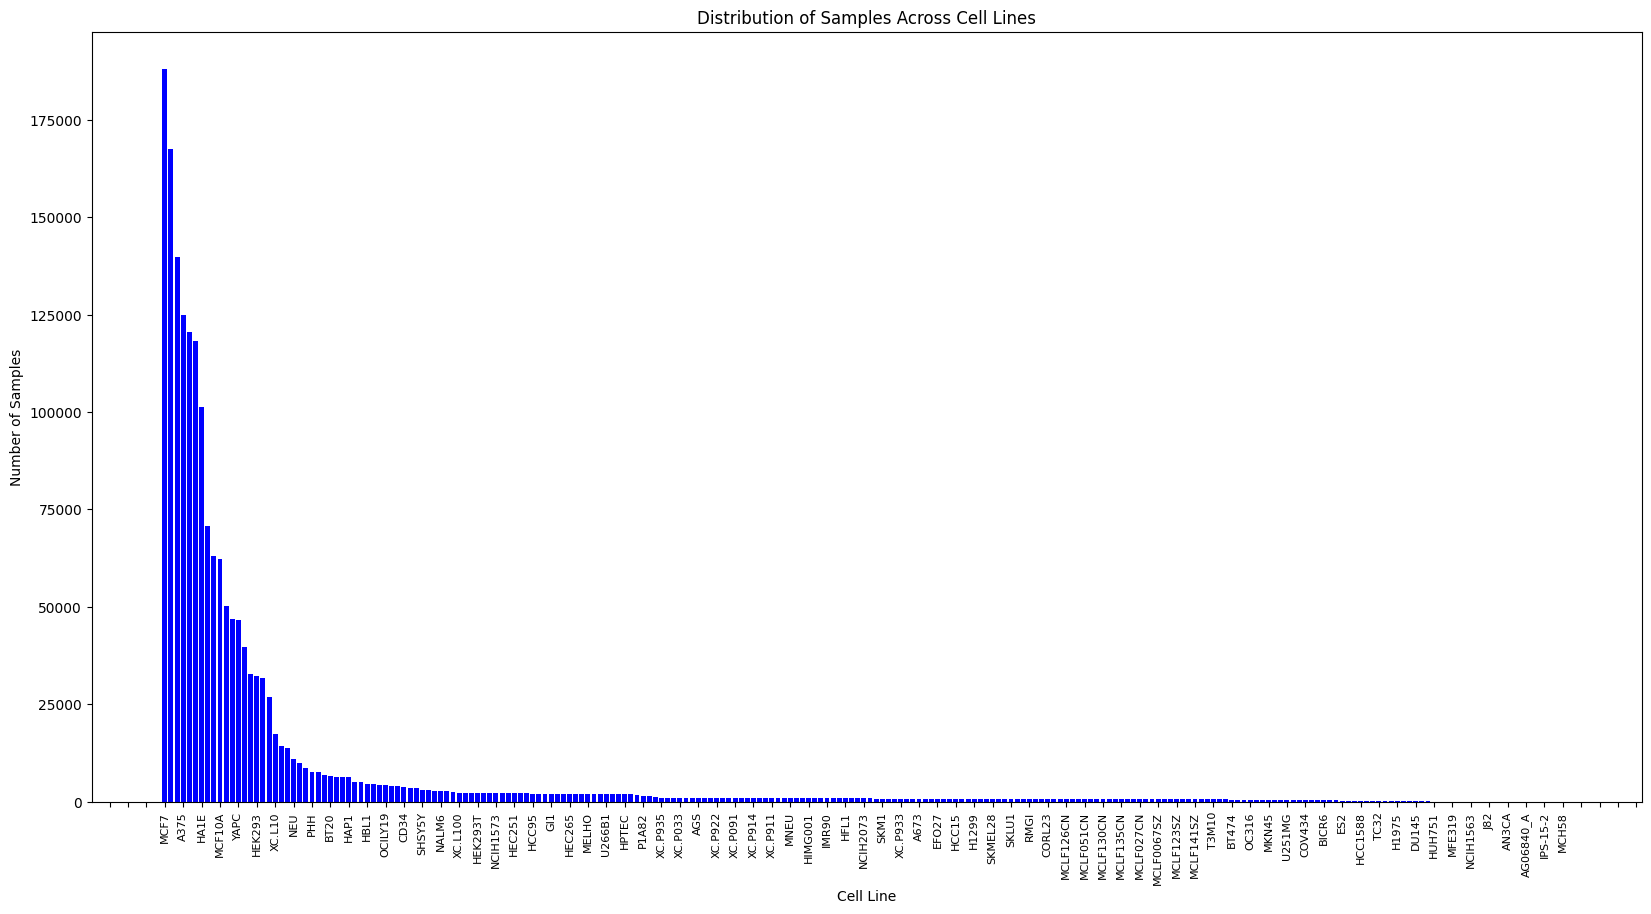

In [77]:
import matplotlib.pyplot as plt

# Assuming 'sorted_cell_lines' is your existing dictionary
# Create lists for cell lines and their counts
cell_lines = list(sorted_cell_lines.keys())
counts = list(sorted_cell_lines.values())

# Create a bar chart
plt.figure(figsize=(20, 10))  # Adjust the size for better readability
plt.bar(cell_lines, counts, color='blue')
plt.xlabel('Cell Line')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples Across Cell Lines')
plt.xticks(rotation=90, fontsize=8)  # Rotate and adjust font size for cell line names

# Optionally, you can also limit the number of x-axis labels to avoid clutter
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(90))  # Display only 50 labels

# Show the plot
plt.show()


# Printing data of a cell-line from GCTx file

In [11]:
import h5py
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse

def gctx_to_attribute(file, attribute_name):
    with h5py.File(file, "r") as gfile:
        attribute_data = list(gfile[f"0/META/COL/{attribute_name}"])
        attribute_values = [x.decode('utf-8') for x in attribute_data]
    return attribute_values


def filter_indices(file_path, cell_line_name):
    # Load 'cell' attribute
    cells = gctx_to_attribute(file_path, "cell")

    # Convert to pandas DataFrame
    df = pd.DataFrame({'cell': cells})

    # Apply filtering condition
    cell_line_indices = df['cell'] == cell_line_name

    # Get the final indices that meet the condition
    final_indices = df[cell_line_indices].index

    return final_indices


# Example usage
file_path = "/home/vmottaqi/sigcom-lincs-L1000toRNAseq/Level3_prepred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
cell_line_name = "HMELZ"
filtered_indices = filter_indices(file_path, cell_line_name)

# Parse the GCTX file using filtered indices
gfile_cell_line = parse(file_path, cidx=filtered_indices)
gfile_cell_line_df = gfile_cell_line.data_df.T

# Print the gene expression data of the cell line
print(f"Gene expression data for {cell_line_name} cell line:\n{gfile_cell_line_df.head()}")

# Export the DataFrame
# output_path = f'/home/vmottaqi/cp_extraction/{cell_line_name}_sigcom_data.pkl'
# gfile_cell_line_df.to_pickle(output_path)
# print(f"DataFrame exported to {output_path}")


Gene expression data for HMELZ cell line:
rid                                             A1BG      A1CF       A2M  \
cid                                                                        
CRCGN004_HMELZ_24H_X1_F1B7_DUO52HI53LO:B14  3.239338  0.489282  2.069436   
CRCGN004_HMELZ_24H_X2_F1B7_DUO52HI53LO:G14  2.940611  0.000000  0.000000   
CRCGN004_HMELZ_24H_X1_F1B7_DUO52HI53LO:N14  2.492883  0.000000  0.000000   
CRCGN004_HMELZ_24H_X1_F1B7_DUO52HI53LO:I04  2.953565  0.000000  0.000000   
CRCGN004_HMELZ_24H_X2_F1B7_DUO52HI53LO:H17  2.806413  0.000000  0.000000   

rid                                            A2ML1     A2MP1    A4GALT  \
cid                                                                        
CRCGN004_HMELZ_24H_X1_F1B7_DUO52HI53LO:B14  2.968368  0.544266  2.455775   
CRCGN004_HMELZ_24H_X2_F1B7_DUO52HI53LO:G14  3.946044  0.416650  3.761390   
CRCGN004_HMELZ_24H_X1_F1B7_DUO52HI53LO:N14  3.731578  0.411682  3.400794   
CRCGN004_HMELZ_24H_X1_F1B7_DUO52HI53LO:I04  3

In [1]:
# Shorter version (for large cell lines)

import h5py
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse

def gctx_to_attribute(file, attribute_name):
    with h5py.File(file, "r") as gfile:
        attribute_data = list(gfile[f"0/META/COL/{attribute_name}"])
        attribute_values = [x.decode('utf-8') for x in attribute_data]
    return attribute_values

def filter_indices(file_path, cell_line_name):
    cells = gctx_to_attribute(file_path, "cell")
    df = pd.DataFrame({'cell': cells})
    cell_line_indices = df['cell'] == cell_line_name
    return df[cell_line_indices].index

# Example usage
file_path = "/home/vmottaqi/sigcom-lincs-L1000toRNAseq/Level3_prepred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
cell_line_name = "YAPC"
filtered_indices = filter_indices(file_path, cell_line_name)

# Specify the gene rids you're interested in
gene_rids = ["A1BG", "A1CF", "A2M", "ZZEF1", "ZZZ3"]  # Replace with your actual gene rids

# Parse the GCTX file using filtered indices and specified gene rids
gfile_cell_line = parse(file_path, cidx=filtered_indices, rid=gene_rids)
gfile_cell_line_df = gfile_cell_line.data_df.T

# Print the gene expression data of the cell line for specified genes
print(f"Gene expression data for {cell_line_name} cell line:\n{gfile_cell_line_df.head()}")



Gene expression data for YAPC cell line:
rid                                A1BG      A1CF       A2M     ZZEF1  \
cid                                                                     
ASG002_YAPC_24H_X1.A2_B35:D08  1.425537  0.708808  1.551878  4.501099   
ASG002_YAPC_24H_X1.A2_B35:F20  1.817224  0.474918  2.295315  4.912624   
ASG002_YAPC_24H_X1.A2_B35:K19  2.561451  1.033789  0.506064  6.349763   
ASG002_YAPC_24H_X1.A2_B35:B16  1.652097  0.332918  1.923303  4.563107   
ASG002_YAPC_24H_X1.A2_B35:M05  1.686828  0.344379  1.708158  4.569423   

rid                                ZZZ3  
cid                                      
ASG002_YAPC_24H_X1.A2_B35:D08  6.554503  
ASG002_YAPC_24H_X1.A2_B35:F20  7.041903  
ASG002_YAPC_24H_X1.A2_B35:K19  6.621591  
ASG002_YAPC_24H_X1.A2_B35:B16  6.720528  
ASG002_YAPC_24H_X1.A2_B35:M05  6.841110  


In [2]:
gfile_cell_line_df

rid                                A1BG      A1CF       A2M     ZZEF1  \
cid                                                                     
ASG002_YAPC_24H_X1.A2_B35:D08  1.425537  0.708808  1.551878  4.501099   
ASG002_YAPC_24H_X1.A2_B35:F20  1.817224  0.474918  2.295315  4.912624   
ASG002_YAPC_24H_X1.A2_B35:K19  2.561451  1.033789  0.506064  6.349763   
ASG002_YAPC_24H_X1.A2_B35:B16  1.652097  0.332918  1.923303  4.563107   
ASG002_YAPC_24H_X1.A2_B35:M05  1.686828  0.344379  1.708158  4.569423   
...                                 ...       ...       ...       ...   
REP.B028_YAPC_24H_X1_B23:H10   1.311563  0.816920  1.967717  4.505686   
REP.B028_YAPC_24H_X1_B23:H17   1.182275  0.307708  1.884712  4.745076   
REP.B028_YAPC_24H_X1_B23:H01   3.295239  0.517549  4.857004  9.299384   
REP.B028_YAPC_24H_X1_B23:I13   0.996252  0.237070  2.180591  4.628360   
REP.B028_YAPC_24H_X2_B23:P20   1.245932  0.688901  2.795014  4.879391   

rid                                 ZZZ3  
cid                                       
ASG002_YAPC_24H_X1.A2_B35:D08   6.554503  
ASG002_YAPC_24H_X1.A2_B35:F20   7.041903  
ASG002_YAPC_24H_X1.A2_B35:K19   6.621591  
ASG002_YAPC_24H_X1.A2_B35:B16   6.720528  
ASG002_YAPC_24H_X1.A2_B35:M05   6.841110  
...                                  ...  
REP.B028_YAPC_24H_X1_B23:H10    6.291194  
REP.B028_YAPC_24H_X1_B23:H17    6.435575  
REP.B028_YAPC_24H_X1_B23:H01   13.213510  
REP.B028_YAPC_24H_X1_B23:I13    6.347832  
REP.B028_YAPC_24H_X2_B23:P20    6.398010  

[46626 rows x 5 columns]

In [8]:
import pandas as pd

file_path = '/home/vmottaqi/cp_extraction/test_mercury/YAPC.csv'  # Replace with your file path
chunksize = 20  # Number of rows to include in the chunk

# Read the first chunk of the CSV file
for chunk in pd.read_csv(file_path, chunksize=chunksize):
    # Display the first 10 columns of the first 10 rows
    print(chunk.iloc[:, :17])
    break  # Only read the first chunk


                           sig_id  cell         pertname timepoint     dose  \
0   ASG002_YAPC_24H_X1.A2_B35:D08  YAPC     gatifloxacin      24 h  1.11 uM   
1   ASG002_YAPC_24H_X1.A2_B35:F20  YAPC        alectinib      24 h  1.11 uM   
2   ASG002_YAPC_24H_X1.A2_B35:K19  YAPC        anguidine      24 h    10 uM   
3   ASG002_YAPC_24H_X1.A2_B35:B16  YAPC        indinavir      24 h    10 uM   
4   ASG002_YAPC_24H_X1.A2_B35:M05  YAPC     atorvastatin      24 h  1.11 uM   
5   ASG002_YAPC_24H_X1.A2_B35:F11  YAPC      floxuridine      24 h  1.11 uM   
6   ASG002_YAPC_24H_X1.A2_B35:E06  YAPC         zolpidem      24 h  0.12 uM   
7   ASG002_YAPC_24H_X1.A2_B35:N15  YAPC      JNJ-7706621      24 h  0.12 uM   
8   ASG002_YAPC_24H_X1.A2_B35:H24  YAPC           YM-155      24 h  0.12 uM   
9   ASG002_YAPC_24H_X1.A2_B35:H07  YAPC     camptothecin      24 h    10 uM   
10  ASG002_YAPC_24H_X1.A2_B35:H15  YAPC     fostamatinib      24 h  0.12 uM   
11  ASG002_YAPC_24H_X1.A2_B35:L10  YAPC  barasertib-

In [5]:
df = pd.read_csv("/home/vmottaqi/cp_extraction/csv1/AG06263-2.csv")
#df1 = pd.read_pickle("/home/vmottaqi/cp_extraction/HUVEC_sigcom_data.pkl")

In [6]:
df

Empty DataFrame
Columns: [sig_id, cell, pertname, timepoint, dose, replicate_group, pert_id, target, moa, canonical_smiles, inchi_key, compound_aliases, pertname_sig_count, A1BG, A1CF, A2M, A2ML1, A2MP1, A4GALT, A4GNT, AAAS, AACS, AACSP1, AADAC, AADACL2, AADACL3, AADACP1, AADAT, AAED1, AAGAB, AAK1, AAMDC, AAMP, AANAT, AAR2, AARD, AARS, AARS2, AARSD1, AASDH, AASDHPPT, AASS, AATF, AATK, AATK-AS1, AB019441.29, ABAT, ABC13-47488600E17.1, ABC13-47656900H15.1, ABC13-48559800H2.1, ABC14-864958H18.2, ABC7-42404400C24.1, ABC7-42418200C9.1, ABC7-481722F1.1, ABCA1, ABCA10, ABCA11P, ABCA12, ABCA13, ABCA17P, ABCA2, ABCA3, ABCA4, ABCA5, ABCA6, ABCA7, ABCA8, ABCA9, ABCB1, ABCB10, ABCB10P4, ABCB11, ABCB4, ABCB5, ABCB6, ABCB7, ABCB8, ABCB9, ABCC1, ABCC10, ABCC11, ABCC12, ABCC13, ABCC2, ABCC3, ABCC4, ABCC5, ABCC6, ABCC6P1, ABCC6P2, ABCC8, ABCC9, ABCD1, ABCD2, ABCD3, ABCD4, ABCE1, ABCF1, ABCF2, ABCF3, ...]
Index: []

[0 rows x 23627 columns]

In [5]:
df1 = pd.read_csv("/home/vmottaqi/cp_extraction/mercury_test/JURKAT_sigcom_data_part_4.csv")

In [6]:
df1

sig_id    cell       pertname timepoint  \
0     REP.B018_JURKAT_24H_X2_B29:D08  JURKAT   guanethidine      24 h   
1     REP.B018_JURKAT_24H_X2_B29:O15  JURKAT  BRD-K67174965      24 h   
2     REP.B018_JURKAT_24H_X2_B29:M16  JURKAT     amuvatinib      24 h   
3     REP.B018_JURKAT_24H_X2_B29:C07  JURKAT        RG-7388      24 h   
4     REP.B018_JURKAT_24H_X1_B27:E12  JURKAT    telotristat      24 h   
...                              ...     ...            ...       ...   
5246  REP.B028_JURKAT_24H_X2_B32:N03  JURKAT    relcovaptan      24 h   
5247  REP.B028_JURKAT_24H_X2_B32:M07  JURKAT       itopride      24 h   
5248  REP.B028_JURKAT_24H_X2_B32:B22  JURKAT     safinamide      24 h   
5249  REP.B028_JURKAT_24H_X2_B32:N14  JURKAT     bretazenil      24 h   
5250  REP.B028_JURKAT_24H_X2_B32:M06  JURKAT         PA-824      24 h   

         dose  replicate_group      A1BG      A1CF       A2M     A2ML1  ...  \
0     0.74 uM             7449  3.238596  0.469993  1.893384  0.542983  ...   
1     0.25 uM              962  3.610053  0.655401  1.390521  0.758746  ...   
2     0.08 uM             3984  3.316213  0.690731  0.558366  0.536586  ...   
3     2.22 uM             2842  3.431935  0.562350  2.420960  0.704711  ...   
4     0.01 uM            11952  3.808202  0.754999  0.771580  0.696489  ...   
...       ...              ...       ...       ...       ...       ...  ...   
5246  0.25 uM            10842  3.804486  0.593839  0.000000  0.781601  ...   
5247  2.22 uM             7939  3.560303  0.494862  0.042066  0.612094  ...   
5248  0.08 uM            11252  3.680043  0.520250  0.000000  0.653912  ...   
5249  0.74 uM             4677  2.663583  0.710389  1.502000  0.891990  ...   
5250  0.01 uM             2507  3.727325  0.535313  0.021588  0.744120  ...   

        ZWILCH     ZWINT      ZXDA      ZXDB      ZXDC    ZYG11A    ZYG11B  \
0     5.856015  6.601166  2.615495  4.204865  4.930476  1.103256  4.918407   
1     5.889399  7.231365  2.573923  3.981270  5.178252  0.613819  4.491898   
2     6.043255  7.181214  2.302612  3.942352  4.964826  0.951835  4.411108   
3     5.804645  6.962303  2.494623  4.280429  5.057711  1.005191  4.724174   
4     5.196199  7.425367  2.234718  3.819482  5.265615  0.708418  3.747060   
...        ...       ...       ...       ...       ...       ...       ...   
5246  5.873838  7.699118  2.317086  4.221635  4.818735  0.685388  3.998570   
5247  6.048811  7.814628  2.422693  4.153806  4.880725  0.636538  4.075420   
5248  5.982026  7.803742  2.265185  3.991251  4.792769  0.757240  4.025484   
5249  5.457496  7.899393  1.877488  2.420555  5.086128  2.431903  3.802958   
5250  5.919251  7.803255  2.165311  4.068143  4.985219  0.712922  3.992968   

           ZYX     ZZEF1      ZZZ3  
0     4.764067  5.665755  6.337844  
1     3.730136  5.551878  6.047728  
2     4.240667  5.706302  5.942265  
3     4.740404  5.380753  5.993048  
4     4.577825  6.047256  5.375942  
...        ...       ...       ...  
5246  4.922546  5.305760  5.644123  
5247  4.763069  5.388782  5.806413  
5248  4.624534  5.339930  5.629344  
5249  2.578140  4.837453  5.644481  
5250  4.704086  5.415168  5.624440  

[5251 rows x 23620 columns]

In [4]:
df.columns

Index(['sig_id', 'cell', 'pertname', 'timepoint', 'dose', 'replicate_group',
       'A1BG', 'A1CF', 'A2M', 'A2ML1',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=23620)

# Extracting a cell line

## Phase I

In [2]:
# Start with the smallest restricted file:
rf = '/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx'

In [2]:
import h5py

def list_column_attributes(file_path):
    with h5py.File(file_path, 'r') as gfile:
        # Assuming the standard gctx structure, the column metadata is in "0/META/COL"
        col_meta_group = gfile["0/META/COL"]
        
        # List all datasets (attributes) in the column metadata group
        col_attributes = list(col_meta_group.keys())

    return col_attributes

# Example usage
file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
col_attributes = list_column_attributes(file_path)
print(col_attributes)


['cell', 'dose', 'id', 'pertname', 'timepoint']


# New open ai code (Three phases)

## Phase I (pkl file generation) (A coherent code at the end)

### Functions

In [3]:
# NOT neccessary

def gctx_to_sigs(file):
    gfile = h5py.File(file, "r")

    # Get the row and column labels
    #column_labels = [x.decode('utf-8') for x in list(gfile["0/META/ROW/id"])]
    row_labels = [x.decode('utf-8') for x in list(gfile["0/META/COL/id"])]
    gfile.close()
    return row_labels


def gctx_to_timepoint(file):
    gfile = h5py.File(file, "r")

    # Get the row and column labels
    row_labels = [x.decode('utf-8') for x in list(gfile["0/META/COL/timepoint"])]
    gfile.close()
    return row_labels


def gctx_to_dose(file):
    gfile = h5py.File(file, "r")

    # Get the row and column labels
    row_labels = [x.decode('utf-8') for x in list(gfile["0/META/COL/dose"])]
    gfile.close()

In [ ]:
# Too big:
#159gb '/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx'
#40gb '/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/shRNA_predicted_RNAseq_profiles.gctx'
#36.5gb '/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/xpr_predicted_RNAseq_profiles.gctx'

In [5]:
def gctx_to_attribute(file, attribute_name):
    with h5py.File(file, "r") as gfile:
        # Accessing specific attribute
        # attribute_data = gfile[f"0/META/COL/{attribute_name}"][:]
        attribute_data = list(gfile[f"0/META/COL/{attribute_name}"])
        
        row_labels = [x.decode('utf-8') for x in attribute_data]
        gfile.close()

    return row_labels

In [6]:
# just for checking validity

curr_sigs = pd.DataFrame(gctx_to_attribute(rf, "id"))
curr_sigs= curr_sigs.rename(columns={0:'sig_id'})
print(rf,'shape:',curr_sigs.shape)

/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx shape: (1805898, 1)


In [8]:
import h5py
import pandas as pd
import numpy as np

def filter_indices(file_path, cell_line_name):
    # Load sig_id, timepoint, and dose attributes
    sig_ids = gctx_to_attribute(file_path, "id")
    timepoints = gctx_to_attribute(file_path, "timepoint")
    doses = gctx_to_attribute(file_path, "dose")

    # Convert to pandas DataFrame
    df = pd.DataFrame({
        'sig_id': sig_ids,
        'timepoint': timepoints,
        'dose': doses
    })

    # Apply filtering conditions
    cell_line_indices = df['sig_id'].str.contains(cell_line_name)
    valid_timepoint_indices = df['timepoint'] != 'nan'
    valid_dose_indices = ~df['dose'].str.contains('ug/ml|%')

    # Combine conditions using logical AND
    combined_indices = cell_line_indices & valid_timepoint_indices & valid_dose_indices

    # Get the final indices that meet all conditions
    final_indices = df[combined_indices].index

    return final_indices

# Example usage
file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
final_indices = filter_indices(file_path, "BJAB")
print(f"Filtered indices for BJAB cell line: {final_indices}")



Filtered indices for BJAB cell line: Index([  2049,   2050,   2051,   2052,   2053,   2054,   2055,   2056,   2057,
         2058,
       ...
       697750, 697751, 697752, 697753, 697754, 697755, 697756, 697757, 697758,
       697759],
      dtype='int64', length=5170)


In [43]:
gfile_BJAB = parse.parse(file_path, cidx=final_indices)

In [44]:
print(gfile_BJAB)

1.0
src: /home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx
data_df: [23614 rows x 5170 columns]
row_metadata_df: [23614 rows x 0 columns]
col_metadata_df: [5170 rows x 4 columns]


In [45]:
gfile_BJAB_df = gfile_BJAB.data_df.T

In [46]:
gfile_BJAB_df

rid                               A1BG      A1CF       A2M     A2ML1  \
cid                                                                    
AICHI001_BJAB_24H_X1_B32:E12  3.084787  0.587828  1.110226  0.851731   
AICHI001_BJAB_24H_X1_B32:C18  2.823481  0.546315  1.479809  0.898922   
AICHI001_BJAB_24H_X1_B32:D21  3.136967  0.568528  1.528048  1.005712   
AICHI001_BJAB_24H_X1_B32:B23  3.187353  0.669209  1.582151  1.053108   
AICHI001_BJAB_24H_X1_B32:N01  3.320837  0.698113  0.657475  1.070334   
...                                ...       ...       ...       ...   
EMU001_BJAB_6H_X3_B39:C07     2.196036  0.624663  1.234346  1.045426   
EMU001_BJAB_6H_X1_B39:P24     2.490793  0.324327  0.917192  0.878839   
EMU001_BJAB_6H_X2_B39:H03     2.293057  0.657515  0.784504  1.144696   
EMU001_BJAB_6H_X2_B39:C18     2.378338  0.719450  0.833667  1.178423   
EMU001_BJAB_6H_X1_B39:E20     2.348129  0.465349  1.079982  0.953082   

rid                              A2MP1    A4GALT  A4GNT      AAAS      AACS  \
cid                                                                           
AICHI001_BJAB_24H_X1_B32:E12  0.682790  1.210630    0.0  5.928788  5.240382   
AICHI001_BJAB_24H_X1_B32:C18  0.733427  1.350609    0.0  5.854067  5.283857   
AICHI001_BJAB_24H_X1_B32:D21  0.846967  1.500022    0.0  5.749506  5.171463   
AICHI001_BJAB_24H_X1_B32:B23  0.770128  1.221308    0.0  5.962254  5.451327   
AICHI001_BJAB_24H_X1_B32:N01  0.000000  0.608410    0.0  5.209744  4.877771   
...                                ...       ...    ...       ...       ...   
EMU001_BJAB_6H_X3_B39:C07     0.532698  1.261880    0.0  5.246109  4.829506   
EMU001_BJAB_6H_X1_B39:P24     0.489332  1.077915    0.0  5.230499  4.746169   
EMU001_BJAB_6H_X2_B39:H03     0.578408  0.778887    0.0  5.109025  4.952571   
EMU001_BJAB_6H_X2_B39:C18     0.527245  0.510132    0.0  4.926157  4.841687   
EMU001_BJAB_6H_X1_B39:E20     0.505903  1.132407    0.0  5.464799  5.142947   

rid                             AACSP1  ...    ZWILCH     ZWINT      ZXDA  \
cid                                     ...                                 
AICHI001_BJAB_24H_X1_B32:E12  0.898881  ...  6.452617  7.675434  2.020695   
AICHI001_BJAB_24H_X1_B32:C18  0.817707  ...  6.406063  7.441195  2.056817   
AICHI001_BJAB_24H_X1_B32:D21  0.750606  ...  5.993834  7.140278  2.183375   
AICHI001_BJAB_24H_X1_B32:B23  0.913548  ...  6.301784  7.483757  1.977310   
AICHI001_BJAB_24H_X1_B32:N01  1.334954  ...  6.361683  7.366600  1.932251   
...                                ...  ...       ...       ...       ...   
EMU001_BJAB_6H_X3_B39:C07     1.191693  ...  7.652233  7.703122  2.160814   
EMU001_BJAB_6H_X1_B39:P24     0.793117  ...  7.403486  7.810926  2.347665   
EMU001_BJAB_6H_X2_B39:H03     1.178410  ...  7.574344  7.756101  2.329856   
EMU001_BJAB_6H_X2_B39:C18     1.210619  ...  7.635909  7.807456  2.371852   
EMU001_BJAB_6H_X1_B39:E20     0.885972  ...  7.417225  7.999710  2.595888   

rid                               ZXDB      ZXDC    ZYG11A    ZYG11B  \
cid                                                                    
AICHI001_BJAB_24H_X1_B32:E12  3.629625  4.188329  2.209307  4.539731   
AICHI001_BJAB_24H_X1_B32:C18  3.821064  4.249820  2.201808  4.650104   
AICHI001_BJAB_24H_X1_B32:D21  3.705109  4.150624  2.033607  4.457126   
AICHI001_BJAB_24H_X1_B32:B23  3.743411  4.341480  2.158120  4.811120   
AICHI001_BJAB_24H_X1_B32:N01  4.299858  4.874280  2.546207  5.271853   
...                                ...       ...       ...       ...   
EMU001_BJAB_6H_X3_B39:C07     4.075597  4.419756  2.885644  6.113463   
EMU001_BJAB_6H_X1_B39:P24     4.209225  4.213072  2.154799  5.785095   
EMU001_BJAB_6H_X2_B39:H03     4.108283  4.475330  3.011754  6.044625   
EMU001_BJAB_6H_X2_B39:C18     4.153925  4.354070  3.199735  6.091753   
EMU001_BJAB_6H_X1_B39:E20     4.392797  4.519372  2.435449  5.950956   

rid                                ZYX     ZZEF1      ZZZ3  
cid                                

In [28]:
gfile_BJAB_df.to_pickle('/home/vmottaqi/cp_extraction/BJAB_sigcom_data.pkl')

## A coherent code for phase I

In [2]:
import h5py
import pandas as pd
import numpy as np
from cmapPy.pandasGEXpress.parse import parse

def gctx_to_attribute(file, attribute_name):
    with h5py.File(file, "r") as gfile:
        attribute_data = list(gfile[f"0/META/COL/{attribute_name}"])
        row_labels = [x.decode('utf-8') for x in attribute_data]
    return row_labels

def filter_indices(file_path, cell_line_name):
    # Load sig_id, timepoint, and dose attributes
    sig_ids = gctx_to_attribute(file_path, "id")
    cells = gctx_to_attribute(file_path, "cell")
    timepoints = gctx_to_attribute(file_path, "timepoint")
    doses = gctx_to_attribute(file_path, "dose")
    pertnames = gctx_to_attribute(file_path, "pertname")

    # Convert to pandas DataFrame
    df = pd.DataFrame({'sig_id': sig_ids, 'cell' : cells, 'pertname': pertnames, 'timepoint': timepoints, 'dose': doses})

    # Apply filtering conditions
    cell_line_indices = df['sig_id'].str.contains(cell_line_name)
    valid_timepoint_indices = df['timepoint'] != 'nan'
    valid_dose_indices = ~df['dose'].str.contains('ug/ml|%')

    # Combine conditions using logical AND
    combined_indices = cell_line_indices & valid_timepoint_indices & valid_dose_indices
    filtered_df = df[combined_indices]

    print(f"Filtered DataFrame:\n{filtered_df.head()}")
    return filtered_df

# Example usage
file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
cell_line_name = "BJAB"
filtered_df = filter_indices(file_path, cell_line_name)

# Parse the GCTX file using filtered indices
gfile_BJAB = parse(file_path, cidx=filtered_df.index)
gfile_BJAB_df = gfile_BJAB.data_df.T

# Concatenate column attributes with the main matrix
final_df = pd.concat([filtered_df.reset_index(drop=True), gfile_BJAB_df.reset_index(drop=True)], axis=1)
print(f"Concatenated DataFrame head:\n{final_df.head()}")

# Export the DataFrame
output_path = '/home/vmottaqi/cp_extraction/BJAB_sigcom_data.pkl'
final_df.to_pickle(output_path)
print(f"DataFrame exported to {output_path}")


Filtered DataFrame:
                            sig_id  cell       pertname timepoint     dose
2049  AICHI001_BJAB_24H_X1_B32:E12  BJAB  BRD-K08565465      24 h  0.01 uM
2050  AICHI001_BJAB_24H_X1_B32:C18  BJAB  BRD-A04845303      24 h  0.01 uM
2051  AICHI001_BJAB_24H_X1_B32:D21  BJAB   sotrastaurin      24 h  0.66 uM
2052  AICHI001_BJAB_24H_X1_B32:B23  BJAB     trametinib      24 h  0.04 uM
2053  AICHI001_BJAB_24H_X1_B32:N01  BJAB    cobimetinib      24 h    10 uM
Concatenated DataFrame head:
                         sig_id  cell       pertname timepoint     dose  \
0  AICHI001_BJAB_24H_X1_B32:E12  BJAB  BRD-K08565465      24 h  0.01 uM   
1  AICHI001_BJAB_24H_X1_B32:C18  BJAB  BRD-A04845303      24 h  0.01 uM   
2  AICHI001_BJAB_24H_X1_B32:D21  BJAB   sotrastaurin      24 h  0.66 uM   
3  AICHI001_BJAB_24H_X1_B32:B23  BJAB     trametinib      24 h  0.04 uM   
4  AICHI001_BJAB_24H_X1_B32:N01  BJAB    cobimetinib      24 h    10 uM   

       A1BG      A1CF       A2M     A2ML1     A2MP

In [15]:
df = pd.read_pickle("/home/vmottaqi/cp_extraction/BJAB_sigcom_data.pkl")
df.head

<bound method NDFrame.head of                             sig_id  cell          pertname timepoint     dose  \
0     AICHI001_BJAB_24H_X1_B32:E12  BJAB     BRD-K08565465      24 h  0.01 uM   
1     AICHI001_BJAB_24H_X1_B32:C18  BJAB     BRD-A04845303      24 h  0.01 uM   
2     AICHI001_BJAB_24H_X1_B32:D21  BJAB      sotrastaurin      24 h  0.66 uM   
3     AICHI001_BJAB_24H_X1_B32:B23  BJAB        trametinib      24 h  0.04 uM   
4     AICHI001_BJAB_24H_X1_B32:N01  BJAB       cobimetinib      24 h    10 uM   
...                            ...   ...               ...       ...      ...   
5165     EMU001_BJAB_6H_X3_B39:C07  BJAB        idelalisib       6 h    10 uM   
5166     EMU001_BJAB_6H_X1_B39:P24  BJAB            E-7438       6 h  0.01 uM   
5167     EMU001_BJAB_6H_X2_B39:H03  BJAB            RN-486       6 h  0.66 uM   
5168     EMU001_BJAB_6H_X2_B39:C18  BJAB         erlotinib       6 h  0.01 uM   
5169     EMU001_BJAB_6H_X1_B39:E20  BJAB  cyclophosphamide       6 h   2.5 uM  

### Coherent & Modified -- Exclude the unknown_pertname indices (present in gctx, not in metadata)

In [18]:
# Path to your text file
file_path = '/home/vmottaqi/cp_extraction/exclude_indices_pertnames_in_gctx.txt'

# Read the text file
with open(file_path, 'r') as file:
    # Read the first line (assuming the numbers are in a single line)
    line = file.readline()
    # Split the string into a list based on comma and space
    # Then convert each element into an integer
    exclude_indices = [int(num) for num in line.split(', ')]

print(exclude_indices)
print(len(exclude_indices))


[126327, 126522, 126839, 127421, 127773, 127927, 128240, 128378, 128417, 129311, 130015, 130069, 131327, 131341, 131462, 131890, 131978, 132760, 132793, 133476, 133492, 133583, 134197, 134216, 134759, 135244, 135710, 136068, 136195, 136387, 136420, 136448, 136522, 136534, 136641, 136920, 136968, 136972, 136989, 137012, 137038, 137042, 137177, 137354, 137404, 137427, 137539, 137563, 137626, 137670, 137708, 137709, 137755, 137798, 137858, 138045, 138158, 138252, 138293, 138320, 138352, 138380, 138438, 138465, 138574, 138586, 138596, 138606, 138711, 138739, 138792, 138811, 138921, 138997, 139228, 139362, 139491, 139593, 139624, 139633, 139720, 139804, 139805, 139856, 139901, 140002, 140006, 140018, 140056, 140117, 140147, 140258, 140288, 140375, 140434, 140464, 140639, 140946, 141025, 141026, 141037, 141071, 141160, 141208, 141225, 141232, 141245, 141272, 141281, 141371, 141377, 141439, 141443, 141479, 141530, 141542, 141611, 141614, 141829, 141887, 141898, 141948, 142005, 142116, 142139,

In [78]:
print(exclude_indices)

[126327, 126522, 126839, 127421, 127773, 127927, 128240, 128378, 128417, 129311, 130015, 130069, 131327, 131341, 131462, 131890, 131978, 132760, 132793, 133476, 133492, 133583, 134197, 134216, 134759, 135244, 135710, 136068, 136195, 136387, 136420, 136448, 136522, 136534, 136641, 136920, 136968, 136972, 136989, 137012, 137038, 137042, 137177, 137354, 137404, 137427, 137539, 137563, 137626, 137670, 137708, 137709, 137755, 137798, 137858, 138045, 138158, 138252, 138293, 138320, 138352, 138380, 138438, 138465, 138574, 138586, 138596, 138606, 138711, 138739, 138792, 138811, 138921, 138997, 139228, 139362, 139491, 139593, 139624, 139633, 139720, 139804, 139805, 139856, 139901, 140002, 140006, 140018, 140056, 140117, 140147, 140258, 140288, 140375, 140434, 140464, 140639, 140946, 141025, 141026, 141037, 141071, 141160, 141208, 141225, 141232, 141245, 141272, 141281, 141371, 141377, 141439, 141443, 141479, 141530, 141542, 141611, 141614, 141829, 141887, 141898, 141948, 142005, 142116, 142139,

In [79]:
import h5py
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse

def gctx_to_attribute(file, attribute_name):
    with h5py.File(file, "r") as gfile:
        attribute_data = list(gfile[f"0/META/COL/{attribute_name}"])
        row_labels = [x.decode('utf-8') for x in attribute_data]
    return row_labels

def filter_indices(file_path, cell_line_name, exclude_indices):
    # Load sig_id, timepoint, and dose attributes
    sig_ids = gctx_to_attribute(file_path, "id")
    cells = gctx_to_attribute(file_path, "cell")
    timepoints = gctx_to_attribute(file_path, "timepoint")
    doses = gctx_to_attribute(file_path, "dose")
    pertnames = gctx_to_attribute(file_path, "pertname")

    # Convert to pandas DataFrame
    df = pd.DataFrame({'sig_id': sig_ids, 'cell': cells, 'pertname': pertnames, 'timepoint': timepoints, 'dose': doses})

    # Apply filtering conditions
    cell_line_indices = df['sig_id'].str.contains(cell_line_name)
    valid_timepoint_indices = df['timepoint'] != 'nan'
    valid_dose_indices = ~df['dose'].str.contains('ug/ml|%')

    # Combine conditions using logical AND
    combined_indices = cell_line_indices & valid_timepoint_indices & valid_dose_indices

    # Exclude specified indices
    exclude_filter = ~df.index.isin(exclude_indices)
    
    # Apply all filters
    filtered_df = df[combined_indices & exclude_filter]

    print(f"Filtered DataFrame:\n{filtered_df.head()}")
    return filtered_df

# Example usage
file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
cell_line_name = "HUVEC"
filtered_df = filter_indices(file_path, cell_line_name, exclude_indices)

# Parse the GCTX file using filtered indices
gfile_BJAB = parse(file_path, cidx=filtered_df.index)
gfile_BJAB_df = gfile_BJAB.data_df.T

# Concatenate column attributes with the main matrix
final_df = pd.concat([filtered_df.reset_index(drop=True), gfile_BJAB_df.reset_index(drop=True)], axis=1)
print(f"Concatenated DataFrame head:\n{final_df.head()}")

# Export the DataFrame
output_path = '/home/vmottaqi/cp_extraction/HUVEC_sigcom_data1.pkl'
final_df.to_pickle(output_path)
print(f"DataFrame exported to {output_path}")


Filtered DataFrame:
                                sig_id   cell    pertname timepoint     dose
869933     LJP007_HUVEC_24H_X1_B21:P11  HUVEC     AT-7867      24 h  0.12 uM
869934  LJP007_HUVEC_24H_X3.A2_B20:G04  HUVEC     KW-2449      24 h  0.37 uM
869935  LJP007_HUVEC_24H_X3.A2_B20:H20  HUVEC  KIN001-266      24 h  3.33 uM
869936     LJP007_HUVEC_24H_X2_B21:A11  HUVEC     XMD-885      24 h  0.12 uM
869937  LJP007_HUVEC_24H_X3.A2_B20:C10  HUVEC   SB-216763      24 h  0.37 uM
Concatenated DataFrame head:
                           sig_id   cell    pertname timepoint     dose  \
0     LJP007_HUVEC_24H_X1_B21:P11  HUVEC     AT-7867      24 h  0.12 uM   
1  LJP007_HUVEC_24H_X3.A2_B20:G04  HUVEC     KW-2449      24 h  0.37 uM   
2  LJP007_HUVEC_24H_X3.A2_B20:H20  HUVEC  KIN001-266      24 h  3.33 uM   
3     LJP007_HUVEC_24H_X2_B21:A11  HUVEC     XMD-885      24 h  0.12 uM   
4  LJP007_HUVEC_24H_X3.A2_B20:C10  HUVEC   SB-216763      24 h  0.37 uM   

       A1BG      A1CF       A2M     A2

In [80]:
df1 = pd.read_pickle("/home/vmottaqi/cp_extraction/HUVEC_sigcom_data1.pkl")
print(df1)

                                sig_id   cell              pertname timepoint  \
0          LJP007_HUVEC_24H_X1_B21:P11  HUVEC               AT-7867      24 h   
1       LJP007_HUVEC_24H_X3.A2_B20:G04  HUVEC               KW-2449      24 h   
2       LJP007_HUVEC_24H_X3.A2_B20:H20  HUVEC            KIN001-266      24 h   
3          LJP007_HUVEC_24H_X2_B21:A11  HUVEC               XMD-885      24 h   
4       LJP007_HUVEC_24H_X3.A2_B20:C10  HUVEC             SB-216763      24 h   
...                                ...    ...                   ...       ...   
14394  REP.B024_HUVEC.A_24H_X2_B25:A14  HUVEC              tagatose      24 h   
14395  REP.B024_HUVEC.A_24H_X2_B25:M08  HUVEC  olmesartan-medoxomil      24 h   
14396  REP.B024_HUVEC.A_24H_X2_B25:G08  HUVEC                  mCPP      24 h   
14397  REP.B024_HUVEC.A_24H_X2_B25:E23  HUVEC        hydrocortisone      24 h   
14398  REP.B024_HUVEC.A_24H_X2_B25:E16  HUVEC             carbachol      24 h   

          dose      A1BG   

## Phase II (concat!)

### Get a list of all the ifles we want to combine and load them in

In [10]:
total_pt = []
data_dir = '/home/vmottaqi/cp_extraction/'
file_names_with_paths = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, file)) and 'BJAB' in file]

In [11]:
print(file_names_with_paths)
BJAB_files = file_names_with_paths

['/home/vmottaqi/cp_extraction/BJAB_sigcom_data1.pkl']


In [12]:
total_dfs = []
for file in BJAB_files:
    print(file)
    if file.endswith('csv'):
        curr_df = pd.read_csv(file, index_col=0)
    elif file.endswith('pkl'):
        curr_df = pd.read_pickle(file)
        
    print(curr_df.shape)
    total_dfs.append(curr_df)
    
print(total_dfs)

/home/vmottaqi/cp_extraction/BJAB_sigcom_data1.pkl
(5170, 23619)
[                            sig_id  cell          pertname timepoint     dose  \
0     AICHI001_BJAB_24H_X1_B32:E12  BJAB     BRD-K08565465      24 h  0.01 uM   
1     AICHI001_BJAB_24H_X1_B32:C18  BJAB     BRD-A04845303      24 h  0.01 uM   
2     AICHI001_BJAB_24H_X1_B32:D21  BJAB      sotrastaurin      24 h  0.66 uM   
3     AICHI001_BJAB_24H_X1_B32:B23  BJAB        trametinib      24 h  0.04 uM   
4     AICHI001_BJAB_24H_X1_B32:N01  BJAB       cobimetinib      24 h    10 uM   
...                            ...   ...               ...       ...      ...   
5165     EMU001_BJAB_6H_X3_B39:C07  BJAB        idelalisib       6 h    10 uM   
5166     EMU001_BJAB_6H_X1_B39:P24  BJAB            E-7438       6 h  0.01 uM   
5167     EMU001_BJAB_6H_X2_B39:H03  BJAB            RN-486       6 h  0.66 uM   
5168     EMU001_BJAB_6H_X2_B39:C18  BJAB         erlotinib       6 h  0.01 uM   
5169     EMU001_BJAB_6H_X1_B39:E20  BJAB  c

In [ ]:
# NOT neccessary

BJAB_td = pd.concat(total_dfs)
# has a problem??

## Phase III (Metadata adding)

In [8]:
# input CSV file
BJAB = pd.read_csv("/home/vmottaqi/cp_extraction/csv2/XC.500_sigcom_data.csv")

In [9]:
BJAB

sig_id    cell      pertname timepoint     dose  \
0    ASG003_XC.500_24H_X4_B41:A12  XC.500      zolpidem      24 h  0.12 uM   
1    ASG003_XC.500_24H_X4_B41:E05  XC.500   selumetinib      24 h  1.11 uM   
2    ASG003_XC.500_24H_X4_B41:E03  XC.500  moxifloxacin      24 h  0.12 uM   
3    ASG003_XC.500_24H_X4_B41:F17  XC.500    idarubicin      24 h  1.11 uM   
4    ASG003_XC.500_24H_X4_B41:A06  XC.500     LY-294002      24 h  0.12 uM   
..                            ...     ...           ...       ...      ...   
361  ASG003_XC.500_24H_X4_B41:H22  XC.500         PJ-34      24 h    10 uM   
362  ASG003_XC.500_24H_X4_B41:E08  XC.500     lopinavir      24 h  1.11 uM   
363  ASG003_XC.500_24H_X4_B41:P23  XC.500     masitinib      24 h  1.11 uM   
364  ASG003_XC.500_24H_X4_B41:G11  XC.500      AZD-5363      24 h  1.11 uM   
365  ASG003_XC.500_24H_X4_B41:G05  XC.500    amlodipine      24 h  1.11 uM   

     replicate_group      A1BG      A1CF       A2M     A2ML1  ...    ZWILCH  \
0                354  0.698280  1.094204  1.813209  0.330960  ...  7.015300   
1                310  0.694598  0.876425  2.341570  0.548692  ...  6.936540   
2                255  0.936171  1.173185  2.375701  0.613144  ...  7.040309   
3                217  0.653838  0.644434  2.337842  0.397412  ...  6.579050   
4                 70  0.940068  1.003592  1.918000  0.508053  ...  7.045454   
..               ...       ...       ...       ...       ...  ...       ...   
361               91  0.903999  1.017825  2.189819  0.567898  ...  6.792769   
362              238  0.815183  0.999679  2.347133  0.439946  ...  6.921822   
363              247  0.750396  1.217352  2.286301  0.499003  ...  7.141409   
364               23  0.777373  1.192350  1.975452  0.393876  ...  7.157385   
365              117  0.690505  1.072441  1.860690  0.489046  ...  7.134524   

        ZWINT      ZXDA      ZXDB      ZXDC    ZYG11A    ZYG11B       ZYX  \
0    7.737683  2.990569  4.860747  4.619763  4.166724  5.539227  3.098358   
1    7.691956  3.063325  4.849176  4.600225  4.224628  5.727432  3.580167   
2    7.703669  2.775071  4.955258  4.765847  3.899520  5.749487  3.513555   
3    7.382138  2.948176  5.055598  5.103477  3.983904  4.765904  4.470631   
4    7.797969  2.942606  4.858826  4.714443  4.099725  5.641633  3.207715   
..        ...       ...       ...       ...       ...       ...       ...   
361  7.531945  2.799516  4.568920  4.680163  4.072650  5.626570  3.422810   
362  7.559054  2.896832  4.740618  4.793313  4.013485  5.758097  3.299112   
363  7.717156  3.022228  4.739639  4.455268  4.091904  5.723187  3.099915   
364  7.598965  3.001348  5.211311  4.777738  4.221263  5.645626  2.926400   
365  7.527809  3.113534  5.064188  4.688747  4.383353  5.467908  3.043480   

        ZZEF1      ZZZ3  
0    5.217512  6.472341  
1    5.217240  6.552488  
2    5.358895  6.539481  
3    5.854107  6.223273  
4    5.253571  6.569804  
..        ...       ...  
361  5.455784  6.462338  
362  5.338370  6.619835  
363  5.265935  6.648505  
364  5.374015  6.627876  
365  5.218945  6.656669  

[366 rows x 23620 columns]

In [10]:
print(BJAB.columns[:7])

Index(['sig_id', 'cell', 'pertname', 'timepoint', 'dose', 'replicate_group',
       'A1BG'],
      dtype='object')


In [8]:
duplicate_rows = BJAB.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


In [11]:
SMILES = pd.read_csv('/home/vmottaqi/cp_extraction/LINCS_small_molecules_7.tsv', sep='\t')

In [13]:
# SMILES = pd.read_csv('/home/vmottaqi/cp_extraction/LINCS_small_molecules_6.tsv', sep='\t', index_col=0)

In [12]:
SMILES

pert_id                pertname  \
0      BRD-K70586315                  1-EBIO   
1      BRD-K62620932  1-HYDROXYANTHRAQUINONE   
2      BRD-K72839221      1-NITRONAPHTHALENE   
3      BRD-K75231166        1-NITROSOAZOCANE   
4      BRD-K32795028       1-benzylimidazole   
...              ...                     ...   
31706  BRD-K44876623                zolpidem   
31707  BRD-K48300629              zonisamide   
31708  BRD-A34309505               zopiclone   
31709  BRD-K70557564              zosuquidar   
31710  BRD-K66353228            zoxazolamine   

                                                  target  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
31706                             GABRA3, GABRA2, GABRA1   
31707  SCN5A, SCN11A, CA1, SCN3A, SCN4A, CA12, SCN2A,...   
31708                                             GABRA1   
31709                                              ABCB1   
31710                                                NaN   

                                                     moa  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
31706                    Benzodiazepine receptor agonist   
31707  Sodium channel blocker, T-type calcium channel...   
31708                              GABA receptor agonist   
31709                           P-glycoprotein inhibitor   
31710                                                NaN   

                                        canonical_smiles  \
0                                 CCn1c(=O)[nH]c2ccccc21   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                     c1ccc(Cn2ccnc2)cc1   
...                                                  ...   
31706            Cc1ccc(-c2nc3ccc(C)cn3c2CC(=O)N(C)C)cc1   
31707                           NS(=O)(=O)Cc1noc2ccccc12   
31708     CN1CCN(C(=O)OC2c3nccnc3C(=O)N2c2ccc(Cl)cn2)CC1   
31709  O[C@@H](COc1cccc2ncccc12)CN1CCN([C@@H]2c3ccccc...   
31710                                 Nc1nc2cc(Cl)ccc2o1   

                                               inchi_key   compound_aliases  \
0                            CXUCKELNYMZTRT-UHFFFAOYSA-N                NaN   
1                                                    NaN                NaN   
2                                                    NaN                NaN   
3                                                    NaN                NaN   
4                            KKKDZZRICRFGSD-UHFFFAOYSA-N  1-BENZYLIMIDAZOLE   
...                                                  ...                ...   
31706                        ZAFYATHCZYHLPB-UHFFFAOYSA-N                NaN   
31707  ['UBQNRHZMVUUOMG-UHFFFAOYSA-N', 'KZFDKINRISJFC...                NaN   
31708                        GBBSUAFBMRNDJC-UHFFFAOYSA-N                NaN   
31709                        IHOVFYSQUDPMCN-DBEBIPAYSA-N                NaN   
31710                        YGCODSQDUUUKIV-UHFFFAOYSA-N                NaN   

       pertname_sig_count  
0                       2  
1                       2  
2                      18  
3                       4  
4                      22  
...                   ...  
31706                 344  
31707                 220  
31708                  49  
31709                 164  
31710           

In [15]:
# Convert index to a regular column and set its name
# SMILES = SMILES.reset_index().rename(columns={'index': 'pert_id'})

In [48]:
print(SMILES.columns)

Index(['pert_id', 'pertname', 'target', 'moa', 'canonical_smiles', 'inchi_key',
       'compound_aliases', 'pertname_sig_count'],
      dtype='object')


In [13]:
# use the next code

# Split BJAB DataFrame into two parts: up to and after the 5th column
BJAB_first_part = BJAB.iloc[:, :6]  # Columns up to the 5th
BJAB_second_part = BJAB.iloc[:, 6:]  # Columns after the 5th

# Merge the first part of BJAB with SMILES on 'pertname'
merged_first_part = pd.merge(BJAB_first_part, SMILES, on='pertname', how='left')

# Concatenate merged_first_part with BJAB_second_part
# axis=1 for column-wise concatenation
merged_df = pd.concat([merged_first_part, BJAB_second_part], axis=1)

In [51]:
# A more memory-efficient code

import pandas as pd

# Assuming BJAB and SMILES are your DataFrames
# Perform a left merge of BJAB and SMILES on 'pertname'
merged_df = pd.merge(BJAB, SMILES, on='pertname', how='left')

# To insert the merged columns from SMILES after the 5th column of BJAB:
insert_position = 6  # Position after the 5th column (0-indexed)
# List of SMILES columns, excluding 'pertname'
smiles_columns = [col for col in SMILES.columns if col != 'pertname']
# Rearrange columns
final_columns = (BJAB.columns[:insert_position].tolist() + smiles_columns + 
                 BJAB.columns[insert_position:].tolist())
merged_df = merged_df[final_columns]



In [14]:
merged_df

sig_id    cell      pertname timepoint     dose  \
0    ASG003_XC.500_24H_X4_B41:A12  XC.500      zolpidem      24 h  0.12 uM   
1    ASG003_XC.500_24H_X4_B41:E05  XC.500   selumetinib      24 h  1.11 uM   
2    ASG003_XC.500_24H_X4_B41:E03  XC.500  moxifloxacin      24 h  0.12 uM   
3    ASG003_XC.500_24H_X4_B41:F17  XC.500    idarubicin      24 h  1.11 uM   
4    ASG003_XC.500_24H_X4_B41:A06  XC.500     LY-294002      24 h  0.12 uM   
..                            ...     ...           ...       ...      ...   
361  ASG003_XC.500_24H_X4_B41:H22  XC.500         PJ-34      24 h    10 uM   
362  ASG003_XC.500_24H_X4_B41:E08  XC.500     lopinavir      24 h  1.11 uM   
363  ASG003_XC.500_24H_X4_B41:P23  XC.500     masitinib      24 h  1.11 uM   
364  ASG003_XC.500_24H_X4_B41:G11  XC.500      AZD-5363      24 h  1.11 uM   
365  ASG003_XC.500_24H_X4_B41:G05  XC.500    amlodipine      24 h  1.11 uM   

     replicate_group        pert_id  \
0                354  BRD-K44876623   
1                310  BRD-K57080016   
2                255  BRD-K66615216   
3                217  BRD-A71390734   
4                 70  BRD-K27305650   
..               ...            ...   
361               91  BRD-K11853856   
362              238  BRD-K99451608   
363              247  BRD-K71035033   
364               23  BRD-K99023089   
365              117  BRD-A22032524   

                                                target  \
0                               GABRA3, GABRA2, GABRA1   
1                                               MAP2K1   
2                                                  NaN   
3                                                TOP2A   
4    PIK3CD, PIK3CA, PIK3CG, PRKDC, MTOR, PIK3CB, PLK1   
..                                                 ...   
361                                                NaN   
362                                                NaN   
363                    FGFR3, PDGFRB, PDGFRA, LYN, KIT   
364                                                NaN   
365                CACNA1S, CACNA1D, CACNA1C, CACNA2D1   

                                                   moa  \
0                      Benzodiazepine receptor agonist   
1                                        MEK inhibitor   
2                                                  NaN   
3                              Topoisomerase inhibitor   
4    Phosphodiesterase inhibitor, DNA dependent pro...   
..                                                 ...   
361                                                NaN   
362                                                NaN   
363      PDGFR inhibitor, KIT inhibitor, Src inhibitor   
364                                                NaN   
365                            Calcium channel blocker   

                                      canonical_smiles  ...    ZWILCH  \
0              Cc1ccc(-c2nc3ccc(C)cn3c2CC(=O)N(C)C)cc1  ...  7.015300   
1       Cn1cnc2c(F)c(Nc3ccc(Br)cc3Cl)c(C(=O)NOCCO)cc21  ...  6.936540   
2    COc1c(N2C[C@@H]3CCCN[C@@H]3C2)c(F)cc2c(=O)c(C(...  ...  7.040309   
3    CC(=O)[C@]1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=...  ...  6.579050   
4                O=c1cc(N2CCOCC2)oc2c(-c3ccccc3)cccc12  ...  7.045454   
..                                                 ...  ...       ...   
361            CN(C)CC(=O)Nc1ccc2[nH]c(=O)c3ccccc3c2c1  ...  6.792769   
362  Cc1cccc(C)c1OCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)...  ...  6.921822   
363  Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nc(-...  ...  7.141409   
364  NC1(C(=O)N[C@@H](CCO)c2ccc(Cl)cc2)CCN(c2ncnc3[...  ...  7.157385   
365    CCOC(=O)C1=C(COCCN)N=C(C)C(C(=O)OC)C1c1ccccc1Cl  ...  7.134524   

        ZWINT      ZXDA      ZXDB      ZXDC    ZYG11A    ZYG11B       ZYX  \
0    7.737683  2.990569  4.860747  4.619763  4.166724  5.539227  3.098358   
1    7.691956  3.063325  4.849176  4.600225  4.224628  5.727432  3.580167   
2    7.703669  2.775071  4.955258  4.765847  3.899520  5.749487  3.513555   
3    7.382138  2.948176  5.055598  5.10347

In [53]:
print(merged_df.columns[:14])

Index(['sig_id', 'cell', 'pertname', 'timepoint', 'dose', 'replicate_group',
       'pert_id', 'target', 'moa', 'canonical_smiles', 'inchi_key',
       'compound_aliases', 'pertname_sig_count', 'A1BG'],
      dtype='object')


In [16]:
subset_df = merged_df.iloc[:50, :50]  # Select first 50 rows and 50 columns

# Now, save this subset to a CSV file
subset_df.to_csv('subset_HPTEC_L1000toRNAseq.csv', index=False)

In [54]:
merged_df.to_csv('/home/vmottaqi/cp_extraction/test_test.csv', index=False)

In [55]:
df = pd.read_csv("/home/vmottaqi/cp_extraction/test_test.csv", low_memory=False)

/tmp/ipykernel_4247/2018406057.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/vmottaqi/cp_extraction/test_test.csv")


In [17]:
df[:-2]

Unnamed: 0                           sig_id   cell  \
0               0      LJP007_HUVEC_24H_X1_B21:P11  HUVEC   
1               1   LJP007_HUVEC_24H_X3.A2_B20:G04  HUVEC   
2               2   LJP007_HUVEC_24H_X3.A2_B20:H20  HUVEC   
3               3      LJP007_HUVEC_24H_X2_B21:A11  HUVEC   
4               4   LJP007_HUVEC_24H_X3.A2_B20:C10  HUVEC   
...           ...                              ...    ...   
14392       14392  REP.B024_HUVEC.A_24H_X2_B25:G11  HUVEC   
14393       14393  REP.B024_HUVEC.A_24H_X2_B25:P05  HUVEC   
14394       14394  REP.B024_HUVEC.A_24H_X2_B25:A14  HUVEC   
14395       14395  REP.B024_HUVEC.A_24H_X2_B25:M08  HUVEC   
14396       14396  REP.B024_HUVEC.A_24H_X2_B25:G08  HUVEC   

                   pertname timepoint     dose  replicate_group  \
0                   AT-7867      24 h  0.12 uM              146   
1                   KW-2449      24 h  0.37 uM             1161   
2                KIN001-266      24 h  3.33 uM             1134   
3                   XMD-885      24 h  0.12 uM             1962   
4                 SB-216763      24 h  0.37 uM             1650   
...                     ...       ...      ...              ...   
14392                  mCPP      24 h  0.03 uM             4448   
14393           enzastaurin      24 h  0.03 uM             3524   
14394              tagatose      24 h  0.74 uM             5926   
14395  olmesartan-medoxomil      24 h  0.74 uM             5006   
14396                  mCPP      24 h  0.74 uM             4451   

             pert_id                      target  \
0      BRD-K12040459                         NaN   
1      BRD-K21718444    ABL1, AURKA, FGFR1, FLT3   
2      BRD-K49468759                         NaN   
3      BRD-K64857848                MAPK7, LRRK2   
4      BRD-K59184148                       GSK3B   
...              ...                         ...   
14392  BRD-K75844781  HTR1D, HTR2B, HTR2A, HTR2C   
14393  BRD-K79404599                       PRKCB   
14394  BRD-A73556557                        PYGL   
14395  BRD-K78485176                       AGTR1   
14396  BRD-K75844781  HTR1D, HTR2B, HTR2A, HTR2C   

                                                     moa  ...    ZWILCH  \
0                                                    NaN  ...  5.486863   
1      Aurora kinase inhibitor, FLT3 inhibitor, Abl k...  ...  5.690996   
2                                                    NaN  ...  5.416112   
3      Leucine rich repeat kinase inhibitor, MAP kina...  ...  5.493176   
4                                        GSK-3 inhibitor  ...  5.258256   
...                                                  ...  ...       ...   
14392                         Serotonin receptor agonist  ...  5.004417   
14393                                      PKC inhibitor  ...  4.632205   
14394                            Phosphorylase inhibitor  ...  5.377121   
14395                    Angiotensin receptor antagonist  ...  4.665586   
14396                         Serotonin receptor agonist  ...  4.968456   

          ZWINT      ZXDA      ZXDB      ZXDC    ZYG11A    ZYG11B       ZYX  \
0      5.309552  2.320833  3.915468  4.376023  1.800222  5.168953  6.244321   
1      5.127562  2.364881  3.868667  4.184271  2.028715  5.441154  6.046291   
2      5.235948  2.741685  4.259191  4.711304  2.235444  5.804054  6.283863   
3      5.008914  2.673160  4.180340  4.062153  1.725473  5.261064  6.884841   
4      4.788189  2.594190  3.870796  4.413299  1.742650  5.366115  6.524073   
...         ...       ...       ...       ...       ...       ...       ...   
14392  4.307436  2.360812  3.678537  3.645160  1.808816  5.040956  5.982154   
14393  5.638973  1.488441  3.181719  4.807251  2.002261  4.703175  8.079825   
14394  5.328542  2.325714  3.557021  4.135784  1.822063  5.012789  7.256425   
14395  4.443354  1.886248  3.695154  4.060368  1.946092  5.231739  7.487881   
14396  4.983486  1.817432  3.451523  4.136911  1.844788  5.157803  7.34654

### A coherent code

In [5]:
import pandas as pd

# Read the input CSV and TSV files
BJAB = pd.read_csv("/home/vmottaqi/cp_extraction/csv2/XC.500_sigcom_data.csv")
SMILES = pd.read_csv('/home/vmottaqi/cp_extraction/LINCS_small_molecules_7.tsv', sep='\t')

# Perform a left merge of BJAB and SMILES on 'pertname'
merged_df = pd.merge(BJAB, SMILES, on='pertname', how='left')

# Determine the position to insert the merged columns from SMILES
insert_position = 6  # Position after the 5th column (0-indexed)

# Create a list of SMILES columns, excluding 'pertname'
smiles_columns = [col for col in SMILES.columns if col != 'pertname']

# Rearrange columns to insert SMILES columns after the 5th column of BJAB
final_columns = (BJAB.columns[:insert_position].tolist() + smiles_columns + 
                 BJAB.columns[insert_position:].tolist())
merged_df = merged_df[final_columns]

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('/home/vmottaqi/cp_extraction/test_test.csv', index=False)


### Difference between pertnames

In [ ]:
# Convert the 'pertname' column to sets of unique values for each DataFrame
pertnames_in_SMILES = set(SMILES['pertname'].unique())
pertnames_in_BJAB = set(BJAB['pertname'].unique())

# Find names in SMILES not in BJAB
additional_in_SMILES = pertnames_in_SMILES - pertnames_in_BJAB

# Find names in BJAB not in SMILES
additional_in_BJAB = pertnames_in_BJAB - pertnames_in_SMILES

print("Additional pertnames in SMILES:", additional_in_SMILES)
print("Additional pertnames in BJAB:", additional_in_BJAB)


In [17]:
import h5py
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse

def extract_column_attribute(file_path, attribute_name):
    with h5py.File(file_path, "r") as gfile:
        attribute_data = gfile[f"0/META/COL/{attribute_name}"]
        attribute_values = [x.decode('utf-8') for x in attribute_data]
    return attribute_values

# Path to GCTX file
gctx_file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"

# Extract 'pertname' values from GCTX file
gctx_pertnames = extract_column_attribute(gctx_file_path, "pertname")

# Convert to set for easy comparison
gctx_pertnames_set = set(gctx_pertnames)

# Assuming SMILES is a DataFrame with a 'pertname' column
smiles_pertnames_set = set(SMILES['pertname'])

# Find pertnames in SMILES not in GCTX
additional_in_smiles = smiles_pertnames_set - gctx_pertnames_set
print("Pertnames in SMILES not in GCTX:", additional_in_smiles)

# Find pertnames in GCTX not in SMILES
additional_in_gctx = gctx_pertnames_set - smiles_pertnames_set
print("Pertnames in GCTX not in SMILES:", additional_in_gctx)
print(len(additional_in_gctx))


Pertnames in SMILES not in GCTX: set()
Pertnames in GCTX not in SMILES: {'SA-1922796', 'SA-1459481', 'BRD-K20578716', 'BRD-K02170312', 'STOCK1S-03920', 'BRD-K76355933', 'BRD-K25899698', 'BRD-K28814368', 'BRD-A10934835', 'BRD-K09964242', 'BRD-K17645417', 'BRD-K11403764', 'BRD-K70804088', 'BRD-K02269790', 'BRD-K75329208', 'orthothymotinic-acid', 'BRD-K37618507', 'BRD-K91813753', 'BRD-K37340241', 'BRD-K92912836', 'BRD-K24014699', 'BRD-K93181983', 'BRD-K40935524', 'BRD-K57490099', 'BRD-K79534915', 'BRD-K35638681', 'BRD-K22642889', 'GW-2580', 'BRD-K99638197', 'ADL-5859', '2-METHYLANILINE', 'BRD-K74227932', 'BRD-K40161407', 'BRD-K07329815', 'BRD-M72045552', 'prunetin', 'chlordane', 'BRD-K45842176', 'BRD-K75708657', 'BRD-K65290386', 'BRD-K30509186', 'BRD-K93296644', 'BRD-A13020530', 'BRD-A94381689', 'BRD-A36884011', 'BRD-K76411754', 'DAC-009', 'BRD-K64398524', 'BRD-K58611676', 'BRD-K69501658', 'BRD-K29834132', 'HA-14-1', 'BRD-K06800040', 'BRD-K63628486', 'BRD-K83441480', 'BRD-K13226037', 'BRD

# Indices of the ignored pertnames (in GCTx but not in LINCS)

In [8]:
pertnames_of_interest = ['SA-1922796', 'SA-1459481', 'BRD-K20578716', 'BRD-K02170312', 'STOCK1S-03920', 'BRD-K76355933', 'BRD-K25899698', 'BRD-K28814368', 'BRD-A10934835', 'BRD-K09964242', 'BRD-K17645417', 'BRD-K11403764', 'BRD-K70804088', 'BRD-K02269790', 'BRD-K75329208', 'orthothymotinic-acid', 'BRD-K37618507', 'BRD-K91813753', 'BRD-K37340241', 'BRD-K92912836', 'BRD-K24014699', 'BRD-K93181983', 'BRD-K40935524', 'BRD-K57490099', 'BRD-K79534915', 'BRD-K35638681', 'BRD-K22642889', 'GW-2580', 'BRD-K99638197', 'ADL-5859', '2-METHYLANILINE', 'BRD-K74227932', 'BRD-K40161407', 'BRD-K07329815', 'BRD-M72045552', 'prunetin', 'chlordane', 'BRD-K45842176', 'BRD-K75708657', 'BRD-K65290386', 'BRD-K30509186', 'BRD-K93296644', 'BRD-A13020530', 'BRD-A94381689', 'BRD-A36884011', 'BRD-K76411754', 'DAC-009', 'BRD-K64398524', 'BRD-K58611676', 'BRD-K69501658', 'BRD-K29834132', 'HA-14-1', 'BRD-K06800040', 'BRD-K63628486', 'BRD-K83441480', 'BRD-K13226037', 'BRD-K88556033', 'BRD-K90934902', 'BRD-K89558221', 'BRD-K13468108', 'BRD-K15559773', 'BRD-K27477764', 'BRD-K59488055', 'BRD-K70170026', 'BRD-K31851742', 'BRD-K93800099', 'BRD-K01751906', 'BRD-K32628102', 'BRD-A32213225', 'BRD-K19838409', 'BRD-K75969390', 'BRD-K56367200', 'BRD-K74489738', 'BRD-K75036062', 'BRD-K29311288', 'BRD-K98891210', 'BRD-A55639867', 'BRD-K49861754', 'BRD-K02311826', 'BRD-A41997916', 'BRD-K73601942', 'valspodar', 'BRD-K79001525', 'BRD-K34811324', 'silydianin', 'BRD-K96113587', 'propyleneimine', 'NVP-BSK805', 'BRD-K29003210', 'BRD-K29503610', 'BRD-K53728687', 'BRD-K73005792', 'BRD-K10484463', 'BRD-K90135241', 'BRD-K88964386', 'BRD-K83007718', 'BRD-K70369221', 'BRD-K06459664', 'BRD-K97824883', 'BRD-K34836852', 'BRD-K65081680', 'BRD-K65750468', 'BRD-K95976153', 'BRD-K07378204', 'BRD-K86606617', 'BRD-K21662756', 'BRD-K73788182', 'SNS-314', 'BRD-K16383683', 'BRD-K83834119', 'BRD-K36062164', 'BRD-K89156937', 'BRD-K31062320', 'BRD-M81170892', 'BRD-K41595302', 'KM-01366', 'BRD-K43966520', 'BRD-K85339825', 'BRD-A13367427', 'BRD-K92489476', 'SA-1939915', 'WT-171', 'BRD-K41641213', 'BRD-K86002795', 'BRD-K51644197', 'BRD-K06902141', 'BRD-K45156967', 'dibromomannitol', 'BRD-K82837433', 'haematoxylin-pentaacetate', 'BRD-K04476933', 'BRD-K03464662', 'BRD-K52208857', 'BRD-K74185228', 'BRD-K65633533', 'BRD-K38509760', 'RGFP-966', 'ST-023431', 'methylnorlichexanthone', 'BRD-K85887470', 'BRD-K27459043', 'BRD-K06518099', 'BRD-K86947329', 'BRD-K27630390', 'ST-001903', 'alpha-tocopherol', 'matrine', 'BRD-K10702894', 'BRD-K62153980', 'BRD-K06311439', 'BRD-K97348029', 'BRD-K28578807', 'BRD-K48433912', 'BRD-K55896799', 'BRD-K52391588', 'BRD-K40804250', 'N-benzylnaltrindole', 'BRD-K43624963', 'BRD-K40838215', 'BRD-K32485462', 'BRD-K31562577', 'BRD-K66426634', 'BRD-K20745677', 'BRD-K88307115', 'epz011989', 'BRD-K36091499', 'BRD-K48548528', 'BRD-K03272554', 'BRD-K86591768', 'BI-9564', 'BRD-K94253269', 'BRD-K80738071', 'BRD-K28013436', 'BAS-02859604', 'BRD-K10554164', 'BRD-K87794979', 'BRD-K32896438', 'BRD-K53816294', 'BRD-K65809558', 'BRD-K48116811', 'BRD-K46416377', 'pyocyanin', 'uracil-mustard', 'BRD-K15708264', 'BRD-K19308316', 'BRD-K39569857', 'BRD-K07531476', 'BRD-K64985742', 'BRD-K72451865', 'BRD-K73096789', 'catechol', 'BRD-K78013650', 'BRD-K86901264', 'E-7449', 'BRD-K79619196', 'BRD-K44802959', 'BRD-K93157782', 'BRD-K99578584', 'MI-1', 'BRD-K62771975', 'BRD-K80346834', 'BRD-M67215567', 'BRD-K53092731', 'BRD-K69510809', 'BRD-K48332509', 'BRD-K63220166', 'BRD-K31931684', 'VLX-600', 'BRD-K76351896', 'BRD-K92659561', 'BRD-K47906330', 'BRD-A30455275', 'BRD-K47703442', 'BRD-K79684588', 'BRD-K62291994', 'BRD-K27170250', 'BRD-K65139432', 'BRD-K53740124', 'GSK-2801', 'BRD-K71672626', 'BRD-K03756038', 'BRD-K03026470', 'ST-059620', 'BRD-K36381762', 'BRD-K32367664', 'BRD-K74495399', 'ML-89-9', 'BRD-K31387465', 'BRD-K15419902', 'BRD-K34117117', 'BRD-K07642375', 'BRD-K56664261', 'BRD-K83316435', 'delapril', 'BRD-K11172604', 'BRD-K02025760', 'BRD-K62970326', 'cebranopadol', 'I-212148', 'BRD-K27481961', 'BRD-K58869442', 'BRD-K41651095', 'BRD-K35468072', 'BRD-K13044705', 'BRD-K51791390', 'SGC-707', 'AZ-960', 'BRD-K94572506', 'BRD-K27293696', 'BRD-K53867114', 'BRD-K90697691', 'BRD-K37336973', 'BRD-K41931739', 'BRD-K45532244', 'BRD-K96403486', 'BRD-K64273758', 'BRD-K13960193', 'EPZ-015666', 'BRD-K80110842', 'BRD-K44562105', 'BRD-K76758536', 'BRD-K30548766', 'BRD-K38385119', 'BRD-K32761691', 'gedunin', 'BRD-K96535153', 'avicin-g', 'BRD-K31455027', 'BRD-K50368246', 'BRD-K15466057', 'BRD-K61691971', 'BRD-K43337737', 'BRD-K33676730', 'SA-1459430', 'BRD-K15284276', 'BRD-K36961456', 'BRD-K37991590', 'BRD-A36165599', 'BRD-K54577741', 'BRD-K38373714', 'BRD-K83845832', 'BRD-K10279202', 'BRD-K11883928', 'DS-437', 'BRD-K71479066', 'l-bso', 'BRD-K40724613', 'BRD-K43533284', 'BRD-K07278815', 'BRD-K29543879', 'nitromethane', 'BRD-K52914903', 'SA-1937536', 'K784-3391', 'BRD-K97863769', 'BRD-K74445272', 'BRD-K93578426', 'BRD-K37290968', 'BRD-K31558029', 'BRD-K70052069', 'BRD-K34351329', 'BRD-K55340188', 'BRD-A10330754', 'BRD-K42605282', 'BRD-K62288678', 'MD-II-008-P', 'BRD-K36787562', 'BRD-K70595525', 'BRD-K01614657', 'BRD-U02532950', 'SCH-202676', 'BRD-K18197334', 'BRD-K30973842', 'BRD-K81813927', '2-AMINOANTHRACENE', 'BRD-K97508452', 'BRD-K43256821', 'tapentadol', 'BRD-K18447917', 'BRD-K53592093', 'BRD-K31029552', 'BRD-K89814851', 'DAC-003', 'SA-1920080', 'BRD-K02258558', 'BRD-K73439593', 'BRD-K23609283', 'BRD-K98196975', 'BRD-K86217343', 'SA-1459256', 'BRD-K62271959', 'BRD-A77704559', 'BRD-K84114569', 'BRD-K75117691', 'BRD-K87988402', 'BRD-K81313552', 'BRD-K30748066', 'BRD-K70947604', 'BRD-K96704748', 'BRD-K10013730', 'nikkomycin', 'BRD-K54168930', 'BRD-K96752129', 'NK42-I-109-1', 'BRD-K72490684', 'AZ-6102', 'STK-674938', 'BRD-K42776812', 'okadaic-acid', 'BRD-K64984926', 'BRD-A08789708', 'BRD-K45956042', 'KPT-185', 'BRD-K98161915', 'BMS-906024', 'BRD-K78957374', 'BRD-K47709646', 'BRD-K49467822', 'BRD-A15113563', 'BRD-K04534322', 'bromoethane', 'BRD-K85132040', 'BRD-K85649685', 'BRD-K20766305', 'BRD-K30171122', 'MW-STK33-3A', 'BRD-K46171503', 'BRD-K38803221', 'BRD-K83431831', 'BRD-K62748479', 'nitisinone', 'BRD-K86430746', 'BRD-K51323894', 'BRD-K40116023', 'BRD-K97701319', 'BRD-M62752003', 'SM-406', 'BRD-K88710727', 'BRD-K37932103', 'BRD-K25731886', 'BRD-K84521734', 'BRD-K67099101', 'SMER-3', 'ST-4028268', 'BRD-K19875720', 'BRD-K51674646', 'BRD-K58350294', '1-NITROPYRENE', 'BRD-K95080859', 'BRD-K64402699', 'BRD-K37727696', 'BRD-K92439079', 'BRD-K18163752', 'BRD-K67575276', 'BRD-K09325707', 'BRD-K55693448', 'BRD-A07614565', 'BRD-K41993678', 'BRD-K61359235', 'BRD-K47037681', 'BRD-K78944321', 'SA-1921614', 'BRD-K30993697', 'BRD-K88542532', 'BRD-K12961950', 'BRD-K08658757', 'BRD-K28698886', 'BRD-K05814022', 'BRD-K72429558', 'BRD-K78757578', 'BRD-K54945117', 'BRD-A73847809', 'BRD-K41924482', 'BRD-K37277634', '1-HYDROXYPHENAZINE', 'BRD-A95944315', 'BRD-K85694079', 'CPI-360', 'BRD-K92800455', 'BRD-K33597548', 'BRD-K57822472', 'BRD-K35210537', 'BRD-K67902591', '1-NAPHTHYLAMINE', 'BRD-K13218245', 'methylene-chloride', 'BRD-K72118340', 'BRD-K95607309', 'BRD-K93899689', 'BRD-K89338967', 'BRD-K98168260', 'SR-1664', 'BRD-K24306712', 'BRD-K49736551', 'heraclenol', 'SB-505124', 'BRD-K59980915', 'BRD-K52689785', 'BRD-K71188711', 'BRD-K51475868', 'BRD-K72114074', 'BRD-K70960308', 'BRD-K14704318', 'BRD-K96609736', 'morin', 'MW-STK33-2C', 'BRD-K86110682', 'TL-AA09', 'BRD-K24169646', 'BRD-K01763173', 'BRD-K85118298', 'CFI-400945', 'BRD-K68208040', 'BRD-K81941590', 'BRD-K70153099', 'BRD-K35646839', 'BRD-K52160314', 'BRD-K61529775', 'BRD-K74931283', 'sulfallate', 'DMSO', 'BRD-K94352392', 'BRD-K64665684', 'BRD-K35613686', 'CAY-10415', 'BRD-K86182839', 'SA-1455822', 'BRD-K65494396', 'TC-H-106', 'WP-1130', 'BRD-K14631382', 'BRD-K65343560', 'BRD-K51954117', 'BRD-K21001652', 'BRD-K97224540', 'IND-125', 'BRD-K09997269', 'BRD-K09149805', 'BRD-K43170571', 'BRD-K88376874', 'BRD-K67087659', 'BRD-K11841836', 'BRD-K55308802', 'BRD-K30252238', 'URB-597', 'BRD-K58844095', 'BRD-K23021002', 'CP-91149', 'BRD-K36080978', 'BRD-K52189832', 'marinopyrrole-a', 'BRD-K20902354', 'BRD-K86571219', 'BRD-K56046253', 'BRD-K03736784', 'gossypin', 'BRD-K15882173', 'hydroxyl', 'BRD-K05832178', 'BRD-K24536757', 'BRD-K75155876', 'BRD-K92434623', 'BRD-K58898119', 'SA-1458902', 'HU-211', 'SA-424233', 'BRD-K57691575', 'BRD-K11181277', 'BRD-K04289865', 'SA-1456227', 'BRD-K84559549', 'BRD-K89784888', 'BRD-K95838867', 'BRD-K76052538', 'BRD-K65050353', 'BRD-K14790374', 'CW-051', 'BRD-A46802340', 'BRD-K19875179', 'BRD-K43952716', 'NSC-697923', 'BRD-K87080934', 'BRD-K91617567', 'BRD-K72663966', 'BRD-K65243627', 'BRD-K34231896', 'BRD-K84677391', 'P-5091', 'BRD-K91237281', 'BRD-K78777980', 'BRD-K28623804', 'BRD-K52831896', 'BRD-K12729417', 'BRD-K38205437', 'BRD-K36855468', 'BRD-K97864534', 'BRD-K76882924', 'BRD-K44494044', 'BRD-K69241192', 'BRD-K95090559', 'STAT-5-INHIBITOR', 'COL-3', 'BRD-K47924474', 'BRD-K51047687', 'BRD-K50068201', 'BRD-K53103368', 'BRD-K37013795', 'BRD-A41316391', 'BRD-K16925374', 'BRD-K96167523', 'BRD-K12515921', 'BRD-K65000194', 'BRD-K05562558', 'BRD-K99369826', 'BRD-K86112430', 'BRD-K43025837', 'BRD-K44244207', 'BRD-K75418381', 'BRD-K01575212', 'BRD-K05222558', 'BRD-K56196992', 'PF-5274857', 'BRD-A65730376', 'RN-1734', 'BRD-K00859168', 'FQI-1', 'BRD-K54302962', 'BRD-K37029603', 'BRD-A73594579', 'BRD-A44244100', 'BRD-K85916563', 'BRD-A72575012', 'BRD-K83183132', 'BRD-K78559095', 'BRD-K67763841', 'BRD-K05001416', 'BRD-K09661167', 'BRD-K54370483', 'BRD-K35939150', 'UGISS-451', 'BRD-K03406275', 'BRD-K52542879', 'BRD-K29143341', 'BRD-K47724214', 'BRD-K54784065', 'AS-1949490', 'AT1-SHH-29', 'BRD-K50600207', 'BRD-K28184645', 'BRD-K01093405', 'UNC-0642', 'BRD-K58952483', 'BRD-K53214709', 'BRD-K93215584', 'BRD-K64640769', 'BRD-K68718973', 'hydroxyprogesterone-caproate', 'tigecycline', 'BRD-K61181530', 'ST-003833', 'galangin', 'BRD-K25380050', 'BRD-K45907733', 'BRD-K86992593', 'BRD-K28190569', 'BRD-K03848296', 'vinylidene-chloride', 'BRD-K21635943', 'BRD-K52099002', 'BRD-K19624190', 'BRD-K26968982', 'BRD-K90090262', 'BRD-K63954456', 'BRD-K51050139', 'IND-24', 'BRD-K67454499', 'BRD-K08468228', '4-NITROPYRENE', 'BRD-K12641176', 'BRD-K64525051', 'BRD-K23578923', 'BRD-K47505626', 'BRD-K42573370', 'BRD-K88224221', 'BRD-K26694002', 'BRD-K25807578', 'BRD-K38921908', 'BRD-K37399041', 'BRD-K00248354', 'BRD-K41303952', 'BRD-K61776140', 'BRD-K68866125', 'DFCI-LW11', 'BRD-K02964016', 'BRD-K46544760', 'BRD-K85667327', 'BRD-K61615367', 'BRD-K51335814', 'BRD-K12484748', 'BRD-K80877725', 'BRD-A41114263', 'BRD-K55853030', 'BRD-K92904177', 'BRD-K68055156', 'adaprev', 'BRD-K61175124', 'STF-31', 'BRD-K47727686', 'BRD-K73423421', 'BRD-K57019930', 'BRD-K46961308', 'BRD-K48016779', 'BRD-K55715339', 'LM-1685', 'BRD-K42731451', 'BRD-K19870323', 'BRD-K76779710', 'BRD-K48018815', 'ST-4029487', 'BRD-K66177994', 'BRD-K91053205', 'BRD-A45524355', 'BRD-K22321414', 'BRD-K50659736', 'CMAP-AZD-1152HQPA', 'BRD-K93062774', 'BRD-K91987625', 'BRD-K08959882', 'BRD-K45955794', 'BRD-K54179521', 'methylhydrazine-sulfate', 'BRD-K82276852', 'BRD-K27881911', 'BRD-A09984573', 'BRD-K92863101', 'hypoestoxide', 'BRD-K29094514', 'BRD-K82971429', 'BRD-A62200266', 'BRD-K85769686', 'BRD-K19166598', 'SZ-4TA2', 'BRD-K21751020', 'BRD-K07023879', 'BRD-K29622226', 'BRD-K61635139', 'BRD-K55702567', 'BRD-K19147748', 'BRD-K87341885', 'BRD-K29345712', 'BRD-K71006572', 'BRD-K41200778', 'BRD-K45966720', '8-bromo-cGMP', 'GANT-61', 'BRD-K48918097', 'dalargin', 'BRD-K14246967', 'SA-1920942', 'BRD-U51318738', 'BRD-K06623064', 'BRD-A06909528', 'BRD-K36938987', 'DAC-012', 'BRD-K38400632', 'BRD-K60685007', 'ST-024029', 'BRD-K01576758', 'BRD-K89966732', 'BRD-K60828476', 'BRD-K38914331', 'MW-STK33-4A', 'BRD-K41757249', 'CS-917', 'BRD-K16552772', 'BRD-K52183630', 'BRD-K39144410', 'BRD-K29892351', 'BRD-K16057611', 'BRD-A25416824', 'BRD-K29396015', 'P-22077', 'BRD-K54822214', 'SRPIN-340', 'BRD-K10006632', 'BRD-K80104673', 'BRD-K58279162', 'BRD-K50474387', 'BRD-K16251850', 'salidroside', 'BRD-K34580085', 'BRD-K36943170', 'BRD-K39222404', 'BRD-K39979888', 'BRD-K20462402', 'BRD-K60558601', 'BRD-K95895342', 'BRD-K74998149', 'BRD-K53373965', 'BRD-K81441552', 'BRD-K03902789', 'BRD-K38687824', 'SA-1921902', 'ST-4029655', 'BRD-K61050052', 'BRD-K46643133', 'BRD-K73451477', 'BRD-K11981252', 'BRD-K16172814', 'BRD-K42470309', 'BRD-K84129690', 'CMAP-PRISM-1B-NR', 'BRD-K41429297', 'BRD-K35193330', 'BRD-K68937023', 'BRD-K98192020', 'BRD-K01528688', 'BRD-K86848211', 'BRD-K28623651', 'BRD-K58869323', 'BRD-K83601549', 'BRD-K52640952', 'ST-4029573', 'BRD-K69888333', 'JG-98', 'LG-100268', 'BRD-K43581698', 'doxercalciferol', 'BRD-K08656311', 'BRD-K28282859', 'BRD-K68119260', 'BRD-K22587354', 'BRD-K44218307', 'BROAD-000068-004', 'BRD-K89205986', 'BRD-K63624341', 'BRD-K95074209', 'BRD-K30715463', 'BRD-K33606495', 'levallorphan', 'BRD-K97787842', 'DAC-013', 'BRD-K62726279', 'SCH-772984', 'sapropterin', 'AC-264613', 'BRD-K07576726', 'BRD-K30795336', 'BRD-K67653084', 'BRD-K71714567', 'BRD-K07196884', 'BRD-K76786157', 'BRD-K82911380', 'BRD-K21539100', 'BRD-K88099061', 'BRD-K73664775', 'BRD-A98888159', 'BRD-K24632043', 'OVE-208', 'BRD-K37527826', 'BRD-K29965657', '4-AMINOSTILBENE', 'BRD-K39900129', 'BRD-K72381041', 'BMS-833923', 'BRD-K64106162', 'BRD-K74623475', 'BRD-K90446118', 'BRD-K20075074', 'BRD-A12643502', 'CAY-10470', 'BRD-K54711075', 'BRD-K74790646', 'BRD-K74868206', 'BRD-K16290432', 'propylpyrazole', 'BRD-K24779182', 'ginkgetin', 'BRD-K00816165', 'CEP-33779', 'BRD-K31754360', 'BRD-K93340102', 'BRD-K17122788', 'arbidol', 'BRD-K56243496', 'BRD-K78574388', 'BRD-K05225561', 'BRD-K76236182', 'BRD-K25042903', 'BRD-K94991378', 'BRD-K77984885', 'BRD-A50388635', 'BRD-K40230514', 'CMAP-PRISM-1B-PARENT', 'BRD-A88029023', 'BRD-K32162676', 'BRD-K94592222', 'chrysene', 'SA-1456102', 'BRD-K16026651', 'BRD-K91034707', 'BRD-K06170455', 'carbetocin', 'BRD-K99644502', 'BRD-K44564943', 'BRD-K70643771', 'OM-137', 'BRD-K85799948', 'BRD-K19696793', 'BRD-K74634175', 'BRD-K95716640', 'SA-1463838', 'GSK-343', 'BRD-K71448503', 'prometon', 'BRD-K73543260', 'SA-441487', 'GSK-126', 'BRD-K96326565', 'BRD-K15107389', 'BRD-K71935468', 'BRD-K75243062', 'BRD-K09324015', 'BRD-K75458636', 'BRD-K32605311', 'BRD-K14395638', 'BRD-K38596918', 'BRD-K95361366', 'BRD-K27493325', 'BRD-K16195716', 'BRD-K02575886', 'BRD-K58217579', 'BRD-K18074178', 'BRD-K68588778', 'BRD-K51418105', 'BRD-K25295874', 'BRD-K70489510', 'BRD-A68274214', 'BRD-K71670746', 'BRD-K66783461', 'BRD-K54408195', 'BRD-K11742792', 'BRD-K46562045', 'leucomalachite-green', 'BRD-K96834740', 'BRD-A45134043', 'BRD-K46592487', 'BRD-A01960364', 'BRD-K43336921', 'BRD-K06833365', 'BRD-K91633589', 'BRD-K72505034', 'BRD-K66333474', 'BRD-K45845536', 'BRD-K15594502', 'BRD-K68191033', 'BRD-K06992369', 'BRD-K88817140', 'BRD-A94523291', 'BRD-K95349679', 'SA-1919248', 'BRD-K21699764', 'BRD-K13299646', 'BRD-K59085546', 'BRD-K39211770', 'BRD-A43087975', 'BRD-K26766324', 'BRD-K82685933', 'CAY-10578', 'BRD-K84389640', 'BRD-K66359319', 'BRD-K97631938', 'BRD-A06131576', 'MD-040', 'BRD-K97599743', 'BRD-K52678950', 'BRD-K97798118', 'BRD-K33932270', 'BRD-K48835133', 'BRD-K60167861', 'BRD-K01497006', 'BRD-K44401329', 'BRD-K48950795', 'BRD-K42205652', 'CMAP-PRISM-TP7', 'BRD-K81019664', 'DFCI-LW9', 'BRD-K74667984', 'BRD-M43082489', 'BRD-K98675009', 'SKF-91488', 'BRD-K47419679', 'BRD-K37251488', 'KM-00799', 'BRD-K04288183', 'BRD-K69936404', 'BRD-K57346283', 'BRD-A70591769', 'BRD-K75688794', 'BRD-K43484052', 'BRD-K37866276', 'FK-33-824', 'BRD-K13943990', 'BRD-K08725721', 'BRD-K58051960', 'BRD-K42644990', 'BRD-K89401337', 'BRD-K64902833', 'AX-15836', 'BRD-K60774644', 'BRD-K34231294', 'BRD-K15099225', 'DAC-004', 'BRD-A55521341', 'BRD-K24502602', 'BRD-K40697889', 'BRD-K78297750', 'BRD-A41649729', '4-ACETYLAMINOBIPHENYL', 'BRD-A68258842', 'BRD-K82710617', 'BRD-A09164687', 'BRD-K03262163', 'BRD-A14014306', 'BRD-K95683812', 'BRD-K20382089', 'BRD-K78826848', 'BRD-K90849765', 'BRD-K79527000', 'BRD-K83998179', 'BRD-K22599598', 'BRD-K11264391', 'BRD-K80204885', 'SA-1919918', 'ST-057710', 'VU-0238429', 'BRD-K64704925', 'BRD-K25079130', 'BRD-K36446940', 'BRD-K85211514', 'BRD-K66947316', 'BRD-K46014233', 'BRD-K73602693', 'BRD-K69510309', 'filanesib', 'BRD-K50324045', 'BRD-K59397033', 'BRD-A94546435', 'BRD-K56842656', 'BRD-K24217168', 'BRD-K30910503', 'BRD-K69291665', 'BRD-K39151995', 'BRD-K09703570', 'methyl-angolensate', 'droxidopa', 'BRD-K42126874', 'BRD-A88504692', 'BRD-K51696048', 'BRD-K91735860', 'BRD-K17489199', 'BRD-K75034919', 'G-5555', 'ethylbenzene', 'FQI-2', 'BRD-K28004127', 'SU-16f', 'BRD-K05157842', '4-AMINODIPHENYL', 'BRD-K69613314', 'BRD-K29946363', 'BRD-K06614049', 'BAY-598', 'BRD-K94818765', 'BRD-U34737730', 'BRD-K22322324', 'BRD-M57185017', 'JIB04', 'BRD-K15525241', 'benzene', 'nalmefene', 'BRD-K74200139', 'BRD-K69306987', 'BRD-K95270854', 'EPZ-005687', 'BRD-K96335988', 'BRD-K48199580', 'BRD-K38690464', 'BRD-K63947990', 'GSK-4112', 'BRD-K85158176', 'BRD-K14169964', 'BRD-K93538891', 'DY-44', 'BRD-K04021425', 'BRD-K81079621', 'BRD-K89097220', 'ST-019366', 'BRD-A36411721', 'BRD-K34844610', 'tofisopam', 'BRD-K44812652', 'BRD-K69694842', 'BRD-K11612251', 'BRD-K95409124', 'SA-243423', 'BRD-K27181648', 'ON-01910', 'BRD-K97350634', 'BRD-K35900085', 'BRD-K22828860', 'BRD-K20857608', 'ST-4039884', 'norethynodrel', 'BRD-K37562700', 'BRD-K62122103', 'BRD-K13794505', 'BRD-A08659458', 'BRD-K51849151', 'BRD-K27686329', '5-METHYLCHRYSENE', 'silychristin', 'BRD-K48105325', 'BRD-K26069906', 'LG-100754', 'BRD-K28395853', 'ETP-46464', 'BRD-K23853216', 'BRD-K69496360', 'BRD-K27296582', 'BRD-K42785890', 'BRD-K17449871', 'BRD-K11242872', 'BRD-K00486725', 'BRD-K42624823', 'BRD-K52685199', 'BRD-K85950149', 'BRD-K00209945', 'BRD-A32214171', 'BRD-K28995283', 'BRD-K43703882', 'BRD-K49330073', 'BRD-K14781269', 'beta-funaltrexamine', 'SA-102042', 'BRD-K92302554', 'BRD-K38842489', 'BRD-A40802033', 'BRD-K58744164', 'BRD-K61494613', 'BRD-K31765411', 'SD-208', 'BRD-K90734182', 'BRD-K12302379', 'BRD-K40461288', 'STK-721917', 'BRD-K03373364', 'BRD-K22905567', 'BRD-K69003436', 'BRD-K34310783', 'BRD-K52908798', 'BRD-K37762845', 'BRD-A69563582', 'BRD-K81812196', 'BRD-K35004659', 'BRD-K20616644', 'BRD-K75000753', 'BRD-K66896657', 'BRD-K40324831', 'BRD-K38176517', 'IU1', 'BRD-K68831362', 'BRD-K20520611', 'BRD-K66761585', 'BRD-K32100931', 'BRD-K78727929', 'BRD-K47271260', 'BRD-K73919378', 'BRD-K08852751', 'repsox', 'BRD-A59728941', 'BRD-K00954209', 'BRD-K19919069', 'WP-1066', 'DFCI-LW12', 'BRD-K73418978', 'BRD-A01434304', 'silybin-b', 'BRD-K25822929', 'BRD-K73397518', 'BRD-K56014252', 'BRD-K30149952', 'MIM-1', 'BRD-K17230475', 'BRD-K38725747', 'CCT-251545', 'BRD-A18705706', 'BRD-K24383920', 'BRD-M07851152', 'BRD-K77760488', 'BRD-K63245238', 'cisplatin', 'carbendazim', 'BRD-K20732958', 'BRD-K63587749', 'BRD-K47543154', 'BRD-K55004655', 'BRD-A76732176', 'BRD-K18170480', 'BRD-K48823327', 'BRD-K52252091', 'BRD-A52518985', 'BRD-K90004840', 'MD-049', 'BRD-K05246899', 'BRD-K91504630', 'BRD-K15160749', 'rathyronine', 'BRD-K80230516', 'SA-1456625', 'EI1', 'n-nitrososarcosine', 'BRD-K97973721', 'BRD-K14383710', 'BRD-K26381032', 'BRD-K69803214', 'BRD-K98822179', 'BRD-K33226370', 'BRD-K05520923', 'BRD-K14780713', 'acedapsone', 'BRD-A43155244', 'BRD-K67889001', 'BRD-K55606442', 'BRD-K73365449', 'BG-FA-0953', 'BMS-270394', 'avicin-d', '2-AMINOFLUORENE', 'BRD-K58972465', 'BRD-K18381522', 'BRD-K87317732', 'BRD-K54159704', '2-NAPHTHYLAMINE', 'BRD-K37478894', 'BRD-K41172353', 'BRD-K84959002', 'PF-3644022', 'BRD-K48441067', 'beta-testosterone', 'BRD-K67601479', 'BRD-K17530818', 'BRD-K32407455', 'BRD-A82628254', 'BRD-K50950731', 'BRD-K30507268', 'BRD-K32593492', 'BRD-K30715099', 'SA-84905', 'SA-1921816', 'BRD-K06303559', 'BRD-K99006945', 'BRD-K83785854', 'BRD-K45383235', 'BRD-K57938735', 'BRD-K30958640', 'BRD-K39911750', 'isosilybin-b', 'BRD-K35095050', 'BRD-K18407079', 'S-26948', 'quinoline', 'DFCI-LW10', 'BRD-K49687815', 'BRD-K56505861', 'o-anisidine.hcl', 'BRD-K03559171', 'BRD-K71574320', 'BRD-A39121618', 'BRD-K87801302', 'BRD-K32297746', 'BRD-K10593696', 'BRD-K63587518', 'ST-4075437', 'VE-822', 'BRD-K54288605', 'BRD-K23786503', 'moxaverine', 'BRD-K18876264', 'BRD-K43765653', 'TC-S-7006', 'BRD-K47731572', 'BRD-K89584002', 'BRD-K81609421', 'SA-1939945', 'BRD-A09391610', 'BRD-K93410934', 'BRD-K14211116', 'BRD-K06163572', 'BRD-M07419510', 'BRD-K38841486', 'BRD-K18390187', 'BRD-K84178323', 'BRD-K61022988', 'BRD-K46239287', 'BRD-K14316227', 'BRD-K07850148', 'BRD-K23784811', 'BRD-K25556383', 'scandenin', 'BRD-K42245756', 'acrylonitrile', 'GP-42', 'EPZ-020411', 'BRD-K79797318', 'BRD-K00551481', 'dioscin', 'BRD-K49945344', 'BRD-K21165668', 'BRD-K62169556', 'BRD-A99503853', 'BRD-K23313025', 'ONX-0914', 'BRD-K98427832', 'BRD-K89300187', 'BRD-K94493764', 'BRD-K48165980', 'THZ-1', 'BRD-K05204496', 'skepinone-l', 'ST-209453', 'perillyl-alcohol', '4-mu-8C', 'drotaverine', 'BRD-K80832690', 'GSK-591', 'SA-1457103', 'BRD-A48881734', 'BRD-K45429601', 'BRD-K21453918', 'SB-657510', 'BRD-K90571714', 'BRD-K98252401', 'BRD-K04046003', 'BRD-K73952419', 'BRD-K97951054', 'BRD-K56621049', 'BRD-K74152472', 'cpd-b', 'BRD-K66750772', 'BRD-K35961280', 'BRD-M88804565', 'BRD-K71701252', 'BRD-K48723823', 'BRD-K73838803', 'BRD-K56392985', 'BRD-K32949592', 'BRD-K00944562', 'BRD-K02701279', 'BRD-K67015214', 'BRD-K83493571', 'BRD-K47804338', 'BRD-A11731846', 'SA-1919345', 'ML-4054', 'UNC-0646', 'BRD-K16772343', 'BRD-K33390612', 'BRD-K21217422', 'BRD-K86011921', 'BMS-195614', 'BRD-K49098390', 'I-585855', 'BRD-K58912123', 'isosilychristin', 'BRD-K75101679', 'BRD-K62370517', 'UNC-1999', 'BRD-K75856618', 'BRD-K83902026', 'BRD-A75471153', 'BRD-K46028776', 'BRD-K99827928', 'BRD-K88595392', 'BRD-K22149853', 'BRD-K08011922', 'BRD-K44161636', 'SA-1456576', 'BAS-09104376', 'BRD-K60863614', 'BRD-K19417837', 'BRD-K40494872', 'BRD-K69200251', 'BRD-K59722258', 'BRD-K31423326', 'BRD-K78438907', 'SA-1921783', 'BRD-K67873600', 'BRD-K13397460', 'BRD-K61122325', 'crenolanib', 'BRD-K92370559', 'BAS-00594560', 'BRD-K64693729', 'BRD-K98326205', 'BRD-K61373678', 'BRD-K24722667', 'BRD-K34856675', 'BRD-K53321531', 'GSK-2816126', 'BRD-K17303020', 'BRD-K36619075', 'BRD-K39687892', 'BRD-K34314104', 'BRD-K34407242', 'JMW-MITF1', 'BRD-K82158149', 'BRD-K77508012', 'BRD-A81530502', 'BRD-K82726072', 'ethyl-methanesulfonate', 'ST-013960', 'BRD-K21691498', 'BRD-A99265323', 'BRD-K84449870', 'BRD-K11577993', 'BRD-K18183699', 'BRD-K94014921', 'BRD-K36767861', 'BRD-K64751731', 'ST-019386', 'BRD-A77065707', 'BRD-K26508889', 'A-366', 'BRD-K56518176', 'BRD-K85266146', 'BRD-K62050953', 'BRD-K07921357', 'BRD-K87426499', 'BRD-K59460069', 'BRD-K15593941', 'BRD-K16541732', 'BRD-K79625260', 'protoporphyrin-ix', 'BRD-K17951468', 'BRD-K51975159', 'BRD-K18647673', 'BRD-K89148860', 'BRD-K67662618', 'BRD-K49282125', 'BRD-K35577141', 'BRD-K72219469', 'BRD-A70731303', 'BRD-K53327986', 'BRD-K07360484', 'BRD-K75981085', 'ST-4042556', 'BRD-K71038516', 'BRD-K62801835', 'BRD-K26899819', 'CCT-244747', 'BRD-K46760727', 'BRD-K86781204', 'BRD-K55171585', 'BRD-K03599607', 'BRD-K84271229', 'BRD-K15168329', 'BRD-K66224104', 'BRD-K09996575', 'BRD-K00362189', 'BRD-K56596360', 'BRD-K53674027', 'BRD-K22458275', 'BRD-K35306330', 'BRD-K05487130', 'BRD-K78088483', 'SA-101841', 'BRD-K30563791', 'BRD-K22384978', 'BRD-K44413293', 'BRD-K71636675', 'BRD-K98004941', 'BRD-K34607017', 'AMG-900', 'dimetridazole', 'BRD-K61612515', 'ST-4049616', 'BRD-K09023525', 'BRD-K08461556', 'BRD-K99569179', 'sulfametopyrazine', 'BRD-K05789716', 'BRD-K40963786', 'BRD-K39301663', 'BRD-K93760529', 'BRD-K95063618', 'BRD-K07073046', 'BRD-K93937110', 'BRD-K60783789', 'BRD-K40095940', 'BRD-K41954709', 'BRD-K22361536', 'BRD-K24011082', 'BRD-K83498497', 'BRD-K09527783', 'BRD-K69480620', 'BRD-K24789695', 'BRD-K90697693', 'BRD-K54801580', 'JDTic', 'BRD-K73001304', 'BRD-K77007746', 'BRD-K02223034', 'BRD-K46092809', 'BRD-K35307739', 'ANLE-138B', 'BRD-K24193032', 'BRD-K63764020', 'BRD-K93186542', 'BRD-K55030454', 'BRD-K72933250', 'SA-102676', 'BRD-K17579844', 'BRD-K51643619', 'BRD-K46674611', 'KB188-III-56', 'BRD-K16346331', 'BRD-K85685363', 'BRD-K44475992', 'BRD-K74949371', 'BRD-K44935022', 'BRD-K19944193', 'BRD-K15987804', 'BRD-A95820578', 'BRD-K62854197', 'BRD-K38519699', 'BRD-K84890987', 'BRD-K58547240', 'OG-L002', 'BRD-K03651051', 'glycidol', 'BRD-A02288691', 'BRD-K34079378', 'BRD-A84102390', 'BRD-K96188950', 'BRD-K09977233', 'BRD-K16309743', 'BRD-K46625537', 'BRD-K40606280', 'BRD-K70974948', 'BRD-A55565369', 'treprostinil', 'BRD-M25360017', 'BRD-K93685415', 'BRD-K37937164', 'styrene', 'SA-1457458', 'BRD-K83095019', 'BRD-K85123403', 'BRD-A04172077', 'BRD-K97086564', 'BRD-K74711637', 'ST-4066738', 'BRD-K31030218', 'BRD-K59523333', 'BRD-K34317671', 'BRD-K77349332', 'BRD-K38465286', 'BRD-K90918886', 'BRD-K97006656', 'BRD-K93934511', 'BRD-K41483742', 'ST-208960', 'BRD-K37249103', 'BRD-K58900438', 'K-252A', 'BAFILOMYCIN-A1', 'BRD-K99368406', 'BRD-A32241587', 'BRD-K28452359', 'BRD-A03248660', 'BRD-K57883133', 'BRD-K23684100', 'BRD-K79609340', 'BRD-K67559633', 'BRD-K11003742', 'JNJ-1661010', 'BRD-K90184854', 'BRD-K42576592', 'BRD-K22093970', 'BRD-K99536035', 'BRD-K65342895', 'BRD-K38947493', 'LY-83583', 'BRD-K30437804', 'BRD-K20757673', 'SA-1459187', 'DDR1-IN-1', 'BRD-K94853155', 'BRD-A36536537', 'BRD-K55633328', 'BRD-K72452130', 'BRD-K79422060', 'BRD-K68948289', 'BRD-K69261014', 'BRD-K47690679', 'BRD-K81574470', 'BRD-K15672523', 'BRD-K70276339', 'BRD-K24031526', 'BRD-K52175660', 'BRD-K26508045', 'BRD-K78596368', 'BRD-K42957595', 'SEW-05685', 'LLY-507', 'BRD-K17940097', 'oxetane', 'MW-MITF24', 'BRD-K24009388', 'BRD-K48204702', 'BRD-K41138144', 'BRD-K67733357', 'SA-419050', 'BRD-K15587941', 'ST-4034917', 'BRD-K79555018', 'BRD-K78603557', 'BW-180C', 'BRD-K42486632', 'naphthalene', 'CP-673451', 'BRD-K60737413', 'BRD-K94412749', 'BRD-K70492429', 'BRD-K12912249', 'alsterpaullone', 'BRD-K74248891', 'BRD-A05376797', 'BRD-K82987299', 'BRD-K13301506', 'BRD-K78246556', 'BRD-K67010098', 'BRD-K72615639', 'BRD-K85312201', 'BRD-A67306036', 'BRD-K81858524', 'MW-SHH-97', 'BRD-K86269644', 'BRD-K36616116', 'BRD-K10804522', 'BRD-K88078052', 'BRD-K78432605', 'BRD-K30381304', 'BRD-K45759060', 'BRD-K48438698', 'BRD-K05639721', 'BRD-K21672423', 'BRD-K35202752', 'BRD-K89935890', 'BRD-K84705102', 'BRD-K61102114', 'GW-788388', 'BRD-A57300602', 'BRD-K73888531', 'BRD-K56592061', 'BRD-K38455110', 'BRD-K06953509', 'BRD-K23647045', 'BRD-K75512942', 'BRD-K05418735', 'BRD-K13582094', 'ST-019365', 'BRD-K58347372', 'BRD-K22357409', 'BRD-K30194621', 'BRD-K18375927', 'BRD-K53472085', 'BRD-K12862164', 'BRD-K44540157', 'CCMI', 'BRD-K43349162', 'BRD-K11362964', 'BRD-K59204160', 'BRD-K89122409', 'BRD-K80597067', 'necrosulfonamide', 'BRD-K86805916', 'BRD-K27141795', 'BAZ2-ICR', 'UNC-2250', 'BRD-K36031023', 'BRD-K44256916', 'GSK-864', 'BRD-K78987935', 'BRD-K83355732', 'BRD-K99439802', 'BRD-K52237706', 'BRD-M23109796', 'BRD-K00645031', 'BRD-K65655554', 'BRD-A65142661', 'BRD-K76938712', 'BRD-K71153796', 'BRD-K67392692', 'BRD-K84803513', 'BRD-K33842318', 'BRD-K64885524', 'BRD-K98634983', 'BRD-K50008138', 'BRD-K55877261', 'BRD-K16180117', 'BRD-A84238007', 'BRD-K62744999', 'BRD-K26766547', 'BRD-K38444262', 'NK26-I-41-1', 'BRD-K46593635', 'cyanazine', 'PF-184', 'BRD-K56775501', 'BRD-K60895709', 'BRD-K13307254', 'BRD-K72713245', 'BRD-A22272113', 'BRD-K90697692', 'LP-99', 'BRD-K20081026', 'SA-1460008', 'BRD-K78837609', 'BRD-K90697694', 'BRD-K34834946', 'SA-424534', 'BRD-K23384658', 'BRD-K03157318', 'BRD-K40075475', 'BRD-K36675307', 'BRD-K94588743', 'BRD-K47588363', 'BRD-A34345572', 'BRD-K82249895', 'BRD-A70879086', 'BRD-K36111658', 'BRD-K35568648', 'BRD-K22420960', 'DMH1', 'compound-e', 'BRD-K31180546', 'BRD-A89333723', 'isoprene', 'BRD-K01823914', 'BRD-K81202141', 'BRD-K88683417', 'BRD-K80012633', 'BRD-K98984202', 'OVE-238', 'BRD-K30098855', 'BRD-K24896023', 'BRD-K50010596', 'BRD-K96420933', 'cresol', 'SA-424380', 'BRD-K73184677', 'BRD-K02199688', 'BRD-K04856990', 'BRD-K73707305', 'BRD-K23547378', 'BRD-K75648471', 'BRD-K03176945', 'TG-003', 'BRD-K58070753', '6-aminochrysene', 'BRD-K19868817', 'BRD-K17519289', 'BRD-K24824043', 'BRD-K98064019', 'BRD-K41513507', 'LY-2109761', 'BRD-U44432129', 'BRD-K73453061', 'BRD-K73604422', 'BRD-K63900355', 'ST-4070043', 'BRD-K88708949', 'BRD-K94385551', 'BRD-K89843224', 'BRD-K91355947', 'BRD-K34545919', 'BRD-K16360094', 'BRD-K67090705', 'BRD-K65514600', 'BRD-K08630646', 'dichlorvos', 'JNJ-17203212', 'BRD-K03536150', 'BRD-K97306770', 'BRD-K90860366', 'acronycine', 'BRD-K48052543', 'BRD-K09655230', 'BRD-K15014572', 'BRD-K82963710', 'BRD-K83577967', 'BRD-K45289917', 'RS-I-002-6', 'BRD-K24351638', 'BRD-K94498396', 'BRD-K12285126', 'BRD-K05906947', 'BRD-K51349050', 'BRD-K37246443', 'BRD-K50919475', 'isosilybin-a', 'BRD-K91973560', 'cdk/crk-inhibitor', 'BRD-K64632606', 'BRD-K00853241', 'BRD-K07967886', 'BRD-K41328253', 'BRD-K90697690', 'BRD-K58043213', 'BRD-K15886574', 'BRD-A93015352', 'BRD-K16827660', 'BRD-K55996963', 'BRD-K98519396', 'BRD-K23657553', 'BRD-K16838397', 'BRD-K27824953', 'BRD-K52071480', 'BRD-K18533094', 'BRD-K48551077', 'AVA', 'BRD-K42091312', 'o-toluidine.hcl', 'BRD-K77444669', '2-NITROPROPANE', 'amsonic-acid', 'BRD-K03608142', 'BRD-K88197986', 'BRD-K10225413', 'BRD-K59559352', 'BRD-K74228917', 'BRD-K67622458', 'spiradoline', 'BRD-K29785890', 'BRD-K92544320', 'BRD-K35462725', 'BRD-A04020513', 'BRD-K27961885', 'BRD-K37459038', 'BRD-U07653185', 'BRD-K67353973', 'eltrombopag', 'BRD-K12132598', 'BRD-K11089039', 'BRD-K13679108', 'BRD-K31869770', 'BRD-K00390580', 'SA-1919667', 'BRD-A72837804', 'BRD-K74995143', 'BRD-K95810330', 'BRD-K89932793', 'BRD-K08058167', 'BRD-K12562048', 'BRD-K65315692', 'BRD-K59683187', 'BRD-K21898148', 'BRD-K50360938', 'BRD-K20429911', 'BRD-K41419164', 'BRD-K50476921', 'naloxone-benzoylhydrazone', 'BRD-K55536701', 'BRD-K61127355', 'BRD-A49581300', 'BRD-K72425572', 'BRD-K73155123', 'BRD-K59556282', 'BRD-K20216424', 'CGH-2466', 'BRD-K15250199', 'BRD-K06476055', 'ML-347', 'BRD-K21110399', 'BRD-K63549648', 'glutamine', 'BRD-K08351986', 'BRD-K06328518', 'MW-STK33-3B', 'BRD-K81424019', 'BRD-K40331046', 'BRD-K48924007', 'BRD-K28293491', 'ASP-3026', 'BRD-K37290471', 'BRD-K11141556', 'BRD-K91395443', 'BRD-K66381707', 'BRD-K37165790', 'BRD-K96072301', 'BRD-K85515417', 'BRD-K76836103', 'BRD-A27640568', 'BRD-K50157358', 'BRD-K79035462', 'BRD-K58846294', 'BRD-K27395235', 'MD-II-051', 'BRD-K10010115', 'BRD-K51731619', 'BRD-K79181721', 'BRD-K07702264', 'BRD-K59937136', 'BRD-K81146041', 'BRD-K73281599', 'BRD-K76950673', 'BRD-K43624311', 'RKI-1447', 'BRD-K89499048', 'BRD-K55191691', 'MD-041', 'BRD-M27003720', 'BRD-K44890999', 'BRD-K91500340', 'BRD-K19383811', 'BRD-K62768020', 'BRD-K61742182', 'ficz', 'BRD-K78447767', 'BRD-K02519835', 'BRD-K71292008', 'N-MPPP', 'BRD-K75128590', 'BRD-K95760042', 'BRD-K90430314', 'NH-125', 'BRD-K89744662', 'BRD-A19231254', 'BRD-K24230322', 'BRD-K51846078', 'BRD-K28513058', 'BRD-K79807180', 'BRD-K75744810', 'BRD-K79779816', 'BRD-K41220170', 'BRD-K98327170', 'acrylamide', 'BRD-K05775306', 'BRD-K76926998', 'FM-550', 'BRD-K96088139', 'CHK-2-INHIBITOR', 'BRD-K69179556', 'BRD-M00053801', 'depudecin', 'AZD-3463']

In [2]:
import h5py
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse

def extract_column_attribute(file_path, attribute_name):
    with h5py.File(file_path, "r") as gfile:
        attribute_data = gfile[f"0/META/COL/{attribute_name}"]
        attribute_values = [x.decode('utf-8') for x in attribute_data]
    return attribute_values

# Path to GCTX file
gctx_file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"

# Extract 'pertname' values from GCTX file
gctx_pertnames = extract_column_attribute(gctx_file_path, "pertname")

# Convert to DataFrame for easy filtering
gctx_pertnames_df = pd.DataFrame({'pertname': gctx_pertnames})


# Find indices of samples with these pertnames
exclude_indices_pertnames = gctx_pertnames_df[gctx_pertnames_df['pertname'].isin(pertnames_of_interest)].index.tolist()

print(f"Indices of samples with specified pertnames: {exclude_indices_pertnames}")



Indices of samples with specified pertnames: [126327, 126522, 126839, 127421, 127773, 127927, 128240, 128378, 128417, 129311, 130015, 130069, 131327, 131341, 131462, 131890, 131978, 132760, 132793, 133476, 133492, 133583, 134197, 134216, 134759, 135244, 135710, 136068, 136195, 136387, 136420, 136448, 136522, 136534, 136641, 136920, 136968, 136972, 136989, 137012, 137038, 137042, 137177, 137354, 137404, 137427, 137539, 137563, 137626, 137670, 137708, 137709, 137755, 137798, 137858, 138045, 138158, 138252, 138293, 138320, 138352, 138380, 138438, 138465, 138574, 138586, 138596, 138606, 138711, 138739, 138792, 138811, 138921, 138997, 139228, 139362, 139491, 139593, 139624, 139633, 139720, 139804, 139805, 139856, 139901, 140002, 140006, 140018, 140056, 140117, 140147, 140258, 140288, 140375, 140434, 140464, 140639, 140946, 141025, 141026, 141037, 141071, 141160, 141208, 141225, 141232, 141245, 141272, 141281, 141371, 141377, 141439, 141443, 141479, 141530, 141542, 141611, 141614, 141829, 14

In [9]:
## Alternative for saving the list

import h5py
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse

def extract_column_attribute(file_path, attribute_name):
    with h5py.File(file_path, "r") as gfile:
        attribute_data = gfile[f"0/META/COL/{attribute_name}"]
        attribute_values = [x.decode('utf-8') for x in attribute_data]
    return attribute_values

# Path to GCTX file
gctx_file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"

# Extract 'pertname' values from GCTX file
gctx_pertnames = extract_column_attribute(gctx_file_path, "pertname")

# Convert to DataFrame for easy filtering
gctx_pertnames_df = pd.DataFrame({'pertname': gctx_pertnames})

# Find indices of samples with these pertnames
exclude_indices_pertnames = gctx_pertnames_df[gctx_pertnames_df['pertname'].isin(pertnames_of_interest)].index.tolist()

print(f"Indices of samples with specified pertnames: {exclude_indices_pertnames}")

# Saving to a text file
output_file_path = "/home/vmottaqi/cp_extraction/exclude_indices_pertnames_in_gctx.txt"  # Replace with your actual file path
with open(output_file_path, 'w') as file:
    file.write(', '.join(map(str, exclude_indices_pertnames)))

print(f"Indices saved to {output_file_path}")


Indices of samples with specified pertnames: [126327, 126522, 126839, 127421, 127773, 127927, 128240, 128378, 128417, 129311, 130015, 130069, 131327, 131341, 131462, 131890, 131978, 132760, 132793, 133476, 133492, 133583, 134197, 134216, 134759, 135244, 135710, 136068, 136195, 136387, 136420, 136448, 136522, 136534, 136641, 136920, 136968, 136972, 136989, 137012, 137038, 137042, 137177, 137354, 137404, 137427, 137539, 137563, 137626, 137670, 137708, 137709, 137755, 137798, 137858, 138045, 138158, 138252, 138293, 138320, 138352, 138380, 138438, 138465, 138574, 138586, 138596, 138606, 138711, 138739, 138792, 138811, 138921, 138997, 139228, 139362, 139491, 139593, 139624, 139633, 139720, 139804, 139805, 139856, 139901, 140002, 140006, 140018, 140056, 140117, 140147, 140258, 140288, 140375, 140434, 140464, 140639, 140946, 141025, 141026, 141037, 141071, 141160, 141208, 141225, 141232, 141245, 141272, 141281, 141371, 141377, 141439, 141443, 141479, 141530, 141542, 141611, 141614, 141829, 14

### double checking if indices are right ones

In [4]:
import h5py
import pandas as pd

def extract_column_attribute(file_path, attribute_name):
    with h5py.File(file_path, "r") as gfile:
        attribute_data = list(gfile[f"0/META/COL/{attribute_name}"])
        attribute_values = [x.decode('utf-8') for x in attribute_data]
    return attribute_values

def find_indices_of_pertname(file_path, specific_pertname):
    # Extract 'pertname' values from GCTX file
    gctx_pertnames = extract_column_attribute(file_path, "pertname")

    # Convert to pandas Series for easy handling
    pertnames_series = pd.Series(gctx_pertnames)

    # Find indices where specific pertname occurs
    indices = pertnames_series[pertnames_series == specific_pertname].index

    return indices

# Path to GCTX file
gctx_file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"

# Specify the pertname you are interested in
specific_pertname = "WP-1066"

# Find and print the indices
indices = find_indices_of_pertname(gctx_file_path, specific_pertname)
print(f"Indices of samples treated with {specific_pertname}: {list(indices)}")


Indices of samples treated with WP-1066: [977054, 977158, 977181, 977425, 977573, 977816, 978017, 978369, 978549, 978665, 978723, 978882, 979121]


## Duplicate pertnames list

In [8]:
SMILES = pd.read_csv("/home/vmottaqi/cp_extraction/LINCS_small_molecules_1_SMILES_standardized.tsv", sep="\t")

# Keep='first' marks duplicates as True except for the first occurrence
duplicates = SMILES.duplicated(subset='pertname', keep='first')

# View the duplicated rows based on 'pertname'
duplicated_rows = SMILES[duplicates]["pertname"]

# Display the duplicated rows
print(duplicated_rows)


4          bortezomib
49       tanespimycin
122            EX-527
373         ibrutinib
462         veliparib
             ...     
31269     clindamycin
31270    alfacalcidol
31316      hesperidin
31333         genipin
31335      artesunate
Name: pertname, Length: 759, dtype: object


In [10]:
import pandas as pd

# Load the TSV file
file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules_1_SMILES_standardized.tsv'
df = pd.read_csv(file_path, sep='\t')

def print_identical_smiles_pertnames(group):
    # Check if all canonical_smiles are identical in groups with more than one row
    if len(group) > 1 and group['canonical_smiles'].nunique() == 1:
        pertname = group['pertname'].iloc[0]
        print(pertname)  # Print pertname
        
print("Pertname with identical SMILES:")
# Group by 'pertname' and apply the function
df.groupby('pertname').apply(print_identical_smiles_pertnames)


Pertname with identical SMILES:
A-443654
AG-490
AM-404
AS-605240
AT-CSC-07
AT-CSC-18
BI-2536
BW-B70C
CGP-12177
CNQX
CO-102862
CPCCOEt
DNQX
EX-527
GBR-12783
GDC-0980
GSK-1059615
GW-4064
GW-441756
GW-5074
HG-6-64-01
ICI-162846
MMPX
NBQX
NCS-382
NSC-693868
NVP-AUY922
OSI-027
P-1075
PAC-1
PD-123319
PHCCC
PIK-75
QL-X-138
QL-XI-92
QL-XII-47
SB-590885
SDZ-NKT-343
SU-11274
SU-4312
THZ-2-98-01
TTNPB
U-0126
WAY-213613
WH-4023
WHI-P154
WZ-4-145
XMD-1185H
ZG-10
aceclidine
acitretin
alimemazine
ambrisentan
amlodipine
androstanol
argatroban
austricine
aztreonam
batimastat
benazepril
benzamil
calpeptin
capsaicin
carbadox
cefadroxil
cefdinir
cefixime
ceforanide
cefotiam
cilastatin
cilnidipine
cimetidine
cinanserin
clopidogrel
crotamiton
dantrolene
dichlorobenzamil
dienestrol
dinoprost
edoxudine
enalapril
entacapone
etretinate
fenoprofen
flunarizine
fluvoxamine
formoterol
furaltadone
gavestinel
guanaben-acetate
guanadrel
guanethidine
hydralazine
ibutilide
isradipine
josamycin
lapatinib
levcromakalim
ma

Empty DataFrame
Columns: []
Index: []

In [ ]:
rows_with_X = SMILES[SMILES['pertname'] == 'genipin']

# Display the rows
print(rows_with_X)

             pert_id pertname target moa  \
5192   BRD-A04308630  genipin      -   -   
31333  BRD-K28824103  genipin      -   -   

                                canonical_smiles                    inchi_key  \
5192                 COC(=O)C1=COC(O)C2C1CC=C2CO  AZKVWQKMDGGDSV-UHFFFAOYSA-N   
31333  COC(=O)C1=CO[C@@H](O)[C@H]2[C@@H]1CC=C2CO  AZKVWQKMDGGDSV-BCMRRPTOSA-N   

      compound_aliases  pertname_sig_count  
5192                 -                  21  
31333                -                   1  


In [14]:
import pandas as pd

# Assuming 'SMILES' is your DataFrame
# List of pertnames you want to select
selected_pertnames = ['genipin', 'tanespimycin', 'artesunate', 'EX-527']  # Replace with your actual pertnames

# Filter the DataFrame for rows where the 'pertname' column matches any of the selected pertnames
selected_rows = SMILES[SMILES['pertname'].isin(selected_pertnames)]

sorted_selected_rows = selected_rows.sort_values(by='pertname')
# Display the sorted selected rows
print(sorted_selected_rows)

# Optionally, save these rows to a new file (e.g., CSV)
sorted_selected_rows.to_csv('selected_pertnames_differences.csv', index=False)


             pert_id      pertname    target             moa  \
88     BRD-K76964878        EX-527     SIRT1  SIRT inhibitor   
122    BRD-A73908300        EX-527     SIRT1  SIRT inhibitor   
856    BRD-K17944737    artesunate         -               -   
1920   BRD-A47829399    artesunate         -               -   
8096   BRD-K79759031    artesunate         -               -   
31335  BRD-K54634444    artesunate         -               -   
5192   BRD-A04308630       genipin         -               -   
31333  BRD-K28824103       genipin         -               -   
35     BRD-A61304759  tanespimycin  HSP90AA1   HSP inhibitor   
49     BRD-K81473043  tanespimycin  HSP90AA1   HSP inhibitor   

                                        canonical_smiles  \
88                  NC(=O)[C@H]1CCCc2c1[nH]c1ccc(Cl)cc21   
122                     NC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21   
856    C[C@@H]1CC[C@H]2[C@@H](C)[C@H](OC(=O)CCC(O)=O)...   
1920   C[C@@H]1CC[C@H]2[C@@H](C)C(OC(=O)CCC(O)=O)OC3O..

# Not needed (old -- using sig_info data)

### 1. Get all sig_info

In [ ]:
curr_sigs = pd.DataFrame(gctx_to_sigs(rf))
curr_sigs= curr_sigs.rename(columns={0:'sig_id'})
print(rf,'shape:',curr_sigs.shape)

/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx shape: (1805898, 1)


In [ ]:
print(curr_sigs)

                              sig_id
0          ABY001_A375_XH_X1_B15:M04
1          ABY001_A375_XH_X1_B15:D18
2          ABY001_A375_XH_X1_B15:B15
3          ABY001_A375_XH_X1_B15:J11
4          ABY001_A375_XH_X1_B15:P09
...                              ...
1805893  TSAI002_NPC-8_XH_X1_B18:H10
1805894  TSAI002_NPC-8_XH_X1_B18:I08
1805895  TSAI002_NPC-8_XH_X1_B18:J10
1805896  TSAI002_NPC-8_XH_X1_B18:J14
1805897  TSAI002_NPC-8_XH_X1_B18:J16

[1805898 rows x 1 columns]


In [ ]:
curr_tm = pd.DataFrame(gctx_to_timepoint(rf))
curr_tm= curr_tm.rename(columns={0:'timepoint'})
print(rf,'shape:',curr_tm.shape)

/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx shape: (1805898, 1)


In [ ]:
print(curr_tm)

        timepoint
0             3 h
1            24 h
2            24 h
3             3 h
4             3 h
...           ...
1805893       nan
1805894       nan
1805895       nan
1805896       nan
1805897       nan

[1805898 rows x 1 columns]


In [ ]:
BJAB_tm = curr_tm[curr_tm['timepoint'].apply(lambda x: x.find('nan') > 0)]
BJAB_cidx = BJAB_tm.index
print('BJAB shape:',BJAB_tm.shape)
print(BJAB_cidx)

BJAB shape: (0, 1)
Index([], dtype='int64')


In [ ]:
BJAB_tm = curr_tm[curr_tm['timepoint'].apply(lambda x: x.find('nan') > 0)]
BJAB_cidx = BJAB_tm.index
print('BJAB shape:',BJAB_tm.shape)

In [ ]:
import pandas as pd
import h5py

def gctx_to_attribute(file, attribute_name):
    with h5py.File(file, "r") as gfile:
        # Accessing specific attribute
        attribute_data = gfile[f"0/META/COL/{attribute_name}"][:]

        # Decoding bytes to strings if necessary
        if isinstance(attribute_data[0], bytes):
            attribute_data = [x.decode('utf-8') for x in attribute_data]

    return attribute_data

def find_nan_indices_in_timepoint(file_path):
    # Load timepoint and id attributes
    timepoint_data = gctx_to_attribute(file_path, "timepoint")
    id_data = gctx_to_attribute(file_path, "id")

    # Convert to pandas DataFrame for easier handling
    df = pd.DataFrame({
        'timepoint': timepoint_data,
        'id': id_data
    })

    # Find indices where timepoint is the string 'nan'
    nan_indices = df[df['timepoint'] == 'nan'].index

    # Print the id attribute for these indices
    for idx in nan_indices:
        print(f"Index: {idx}, ID: {df.at[idx, 'id']}")

# Example usage
file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
find_nan_indices_in_timepoint(file_path)


Index: 1805317, ID: TSAI001_152NPC2_XH_X1_B16:N17
Index: 1805318, ID: TSAI001_152NPC2_XH_X1_B16:P09
Index: 1805319, ID: TSAI001_152NPC2_XH_X1_B16:N03
Index: 1805320, ID: TSAI001_152NPC2_XH_X1_B16:P15
Index: 1805321, ID: TSAI001_152NPC2_XH_X1_B16:O03
Index: 1805322, ID: TSAI001_152NPC2_XH_X1_B16:P01
Index: 1805323, ID: TSAI001_152NPC2_XH_X1_B16:P13
Index: 1805324, ID: TSAI001_152NPC2_XH_X1_B16:P05
Index: 1805325, ID: TSAI001_152NPC2_XH_X1_B16:O01
Index: 1805326, ID: TSAI001_152NPC2_XH_X1_B16:N07
Index: 1805327, ID: TSAI001_152NPC2_XH_X1_B16:N11
Index: 1805328, ID: TSAI001_152NPC2_XH_X1_B16:P07
Index: 1805329, ID: TSAI001_152NPC2_XH_X1_B16:N01
Index: 1805330, ID: TSAI001_152NPC2_XH_X1_B16:N09
Index: 1805331, ID: TSAI001_152NPC2_XH_X1_B16:P21
Index: 1805332, ID: TSAI001_152NPC2_XH_X1_B16:N21
Index: 1805333, ID: TSAI001_152NPC2_XH_X1_B16:N13
Index: 1805334, ID: TSAI001_152NPC2_XH_X1_B16:N05
Index: 1805335, ID: TSAI001_152NPC2_XH_X1_B16:P23
Index: 1805336, ID: TSAI001_152NPC2_XH_X1_B16:O17


### 2. Cell line indices (filtering)

In [ ]:
BJAB_sigs = curr_sigs[curr_sigs['sig_id'].apply(lambda x: x.find('BJAB') > 0)]
BJAB_cidx = BJAB_sigs.index
print('BJAB shape:',BJAB_sigs.shape)

BJAB shape: (5170, 1)


In [ ]:
BJAB_cidx

Index([  2049,   2050,   2051,   2052,   2053,   2054,   2055,   2056,   2057,
         2058,
       ...
       697750, 697751, 697752, 697753, 697754, 697755, 697756, 697757, 697758,
       697759],
      dtype='int64', length=5170)

In [ ]:
# Total indices of the cell line

gfile_BJAB = parse.parse(rf, cidx=BJAB_cidx)

AttributeError: 'function' object has no attribute 'parse'

In [ ]:
gfile_BJAB_df = gfile_BJAB.data_df.T

In [ ]:
gfile_BJAB_df

In [ ]:
file = rf.split('/')[-1].split('.')[0]

In [ ]:
gfile_BJAB_df.to_pickle('./BJAB_sigcom_data_'+str(file)+'.pkl')

# SMILES selection

In [7]:
from rdkit import Chem
import rdkit

## Canonical smiles (Amitesh)

In [39]:
smi = "COC(=O)C1=CO[C@@H](O)[C@H]2[C@@H]1CC=C2CO"
# mol = Chem.MolFromSmiles(smi)
print(Chem.CanonSmiles(smi))

COC(=O)C1=CO[C@@H](O)[C@H]2[C@@H]1CC=C2CO
COC(=O)C1=CO[C@@H](O)[C@@H]2C(CO)=CC[C@H]12

COC(=O)C1=CO[C@@H](O)[C@@H]2C(CO)=CC[C@H]12


In [40]:
smi = "COC(=O)C1=COC(O)C2C1CC=C2CO"
# mol = Chem.MolFromSmiles(smi)
print(Chem.CanonSmiles(smi))

COC(=O)C1=COC(O)C2C1CC=C2CO
COC(=O)C1=COC(O)C2C(CO)=CCC12

COC(=O)C1=COC(O)C2C(CO)=CCC12


In [41]:
from rdkit import Chem
from rdkit.Chem import AllChem

# List of SMILES strings for the same compound
smiles_list = [
    'C[C@@H]1CC[C@H]2[C@@H](C)[C@H](OC(=O)CCC(O)=O)O[C@@H]3O[C@]4(C)CC[C@@H]1[C@@]23OO4', 
    'C[C@@H]1CC[C@H]2[C@@H](C)C(OC(=O)CCC(O)=O)OC3O[C@]4(C)CC[C@@H]1[C@@]23OO4', 
    'C[C@@H]1CC[C@H]2[C@@H](C)[C@@H](OC(=O)CCC(=O)O)O[C@@H]3O[C@@]4(C)CC[C@@H]1[C@@]23OO4', 
    "C[C@@H]1CC[C@H]2[C@@H](C)[C@H](OC(=O)CCC(O)=O)O[C@@H]3O[C@@]4(C)CC[C@@H]1[C@@]23OO4"]  # replace with your actual SMILES strings

# Function to get the canonical SMILES string
def get_canonical_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:  # Check if RDKit was able to parse the SMILES string
        return Chem.MolToSmiles(mol, canonical=True)
    else:
        return None

# Apply the function to your list of SMILES strings
canonical_smiles_list = [get_canonical_smiles(smiles) for smiles in smiles_list]

# Remove None values in case some SMILES strings were invalid
canonical_smiles_list = [smiles for smiles in canonical_smiles_list if smiles is not None]

# Assuming all SMILES strings represent the same molecule, they should now be identical.
# You can use the first canonical SMILES as the representative for your dataset.
correct_smiles = canonical_smiles_list[0]

print("The canonical SMILES string for the dataset is:", correct_smiles)
print(canonical_smiles_list)


The canonical SMILES string for the dataset is: C[C@H]1[C@H](OC(=O)CCC(=O)O)O[C@@H]2O[C@]3(C)CC[C@H]4[C@H](C)CC[C@@H]1[C@@]24OO3
['C[C@H]1[C@H](OC(=O)CCC(=O)O)O[C@@H]2O[C@]3(C)CC[C@H]4[C@H](C)CC[C@@H]1[C@@]24OO3', 'C[C@@H]1CC[C@H]2[C@@H](C)C(OC(=O)CCC(=O)O)OC3O[C@]4(C)CC[C@@H]1[C@]32OO4', 'C[C@H]1[C@@H](OC(=O)CCC(=O)O)O[C@@H]2O[C@@]3(C)CC[C@H]4[C@H](C)CC[C@@H]1[C@@]24OO3', 'C[C@H]1[C@H](OC(=O)CCC(=O)O)O[C@@H]2O[C@@]3(C)CC[C@H]4[C@H](C)CC[C@@H]1[C@@]24OO3']


## Standardizing smiles (blog)

In [8]:
import rdkit.Chem.MolStandardize.rdMolStandardize as rdMolStandardize

In [14]:
def standardize(smiles):
    # follows the steps in
    # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
    # as described **excellently** (by Greg) in
    # https://www.youtube.com/watch?v=eWTApNX8dJQ
    mol = Chem.MolFromSmiles(smiles)
     
    # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
    clean_mol = rdMolStandardize.Cleanup(mol) 
     
    # if many fragments, get the "parent" (the actual mol we are interested in) 
    parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
         
    # try to neutralize molecule
    uncharger = rdMolStandardize.Uncharger() # annoying, but necessary as no convenience method exists
    uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
     
    # note that no attempt is made at reionization at this step
    # nor at ionization at some pH (rdkit has no pKa caculator)
    # the main aim to to represent all molecules from different sources
    # in a (single) standard way, for use in ML, catalogue, etc.
     
    te = rdMolStandardize.TautomerEnumerator() # idem
    taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
     
    return taut_uncharged_parent_clean_mol

new_smiles = Chem.MolToSmiles(standardize('COCC1OC(=O)c2coc3c2C1(C)C1=C(C2CCC(=O)C2(C)CC1OC(C)=O)C3=O'))
print(new_smiles)


COCC1OC(=O)c2coc3c2C1(C)C1=C(C3=O)C2CCC(=O)C2(C)CC1OC(C)=O


[12:43:07] Initializing MetalDisconnector
[12:43:07] Running MetalDisconnector
[12:43:07] Initializing Normalizer
[12:43:07] Running Normalizer
[12:43:07] Initializing MetalDisconnector
[12:43:07] Running MetalDisconnector
[12:43:07] Initializing Normalizer
[12:43:07] Running Normalizer
[12:43:07] Running LargestFragmentChooser
[12:43:07] Fragment: COCC1OC(=O)c2coc3c2C1(C)C1=C(C3=O)C2CCC(=O)C2(C)CC1OC(C)=O
[12:43:07] New largest fragment: COCC1OC(=O)c2coc3c2C1(C)C1=C(C3=O)C2CCC(=O)C2(C)CC1OC(C)=O (55)
[12:43:07] Running Uncharger


## Visualization

In [ ]:
smiles_list = [
    'C[C@@H]1CC[C@H]2[C@@H](C)[C@H](OC(=O)CCC(O)=O)O[C@@H]3O[C@]4(C)CC[C@@H]1[C@@]23OO4', 
    'C[C@@H]1CC[C@H]2[C@@H](C)C(OC(=O)CCC(O)=O)OC3O[C@]4(C)CC[C@@H]1[C@@]23OO4', 
    'C[C@@H]1CC[C@H]2[C@@H](C)[C@@H](OC(=O)CCC(=O)O)O[C@@H]3O[C@@]4(C)CC[C@@H]1[C@@]23OO4', 
    "C[C@@H]1CC[C@H]2[C@@H](C)[C@H](OC(=O)CCC(O)=O)O[C@@H]3O[C@@]4(C)CC[C@@H]1[C@@]23OO4"]  # replace with your actual SMILES strings


In [25]:
smiles = 'C[C@@H]1CC[C@H]2[C@@H](C)[C@H](OC(=O)CCC(O)=O)O[C@@H]3O[C@]4(C)CC[C@@H]1[C@@]23OO4'
mol1 = Chem.MolFromSmiles(smiles)
print(mol1)

In [26]:
smiles = 'C[C@@H]1CC[C@H]2[C@@H](C)C(OC(=O)CCC(O)=O)OC3O[C@]4(C)CC[C@@H]1[C@@]23OO4'
mol2 = Chem.MolFromSmiles(smiles)
print(mol2)

In [27]:
smiles = 'C[C@@H]1CC[C@H]2[C@@H](C)[C@@H](OC(=O)CCC(=O)O)O[C@@H]3O[C@@]4(C)CC[C@@H]1[C@@]23OO4'
mol3 = Chem.MolFromSmiles(smiles)
print(mol3)

In [28]:
smiles = 'C[C@@H]1CC[C@H]2[C@@H](C)[C@H](OC(=O)CCC(O)=O)O[C@@H]3O[C@@]4(C)CC[C@@H]1[C@@]23OO4'
mol4 = Chem.MolFromSmiles(smiles)
print(mol4)

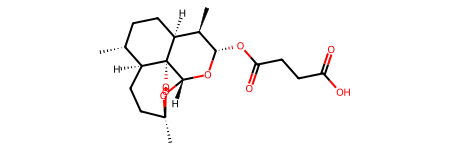

In [31]:
mol1

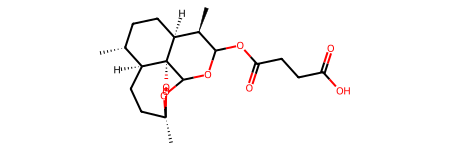

In [32]:
mol2

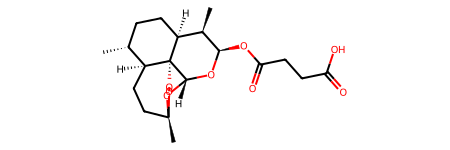

In [33]:
mol3

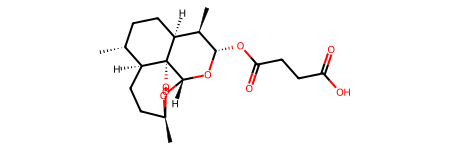

In [34]:
mol4

In [35]:
smiles = 'COC(=O)C1=COC(O)C2C1CC=C2CO'
mol5 = Chem.MolFromSmiles(smiles)
print(mol5)

In [36]:
smiles = 'COC(=O)C1=CO[C@@H](O)[C@H]2[C@@H]1CC=C2CO'
mol6 = Chem.MolFromSmiles(smiles)
print(mol6)

## Standardization of all SMILES in LINCS file (smile v1)

In [ ]:

def standardize(smiles):
    # follows the steps in
    # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
    # as described **excellently** (by Greg) in
    # https://www.youtube.com/watch?v=eWTApNX8dJQ
    mol = Chem.MolFromSmiles(smiles)
     
    # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
    clean_mol = rdMolStandardize.Cleanup(mol) 
     
    # if many fragments, get the "parent" (the actual mol we are interested in) 
    parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
         
    # try to neutralize molecule
    uncharger = rdMolStandardize.Uncharger() # annoying, but necessary as no convenience method exists
    uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
     
    te = rdMolStandardize.TautomerEnumerator() # idem
    taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
     
    return taut_uncharged_parent_clean_mol



# Load the TSV file
file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules.tsv'
df = pd.read_csv(file_path, sep='\t')

# Iterate over each row and standardize the SMILES strings
for index, row in df.iterrows():
    old_smiles = row['canonical_smiles']
    
    # Check if the SMILES string is valid and not a dash
    if old_smiles != '-':
        try:
            new_smiles = Chem.MolToSmiles(standardize(old_smiles))
            df.at[index, 'canonical_smiles'] = new_smiles
        except Exception as e:
            print(f"Error processing SMILES '{old_smiles}': {e}")
            df.at[index, 'canonical_smiles'] = pd.NA
    else:
        # Replace dashes with NaN
        df.at[index, 'canonical_smiles'] = pd.NA

# Save the updated DataFrame to a new TSV file
output_file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules_1_SMILES_standardized.tsv'
df.to_csv(output_file_path, sep='\t', index=False)

print(f"Updated file saved to {output_file_path}")


In [12]:
import pandas as pd

# Path to your TSV file
file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules_1_SMILES_standardized.tsv'

# Column name you want to print
column_name = 'canonical_smiles'  # Replace with your actual column name

# Load the TSV file
df = pd.read_csv(file_path, sep='\t')

# Check if the column exists in the DataFrame
if column_name in df.columns:
    # Print the first 5 values of the specified column
    for value in df[column_name]:
        print(value)
else:
    print(f"Column '{column_name}' not found in the file.")


CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=O)OCc1ccccc1
CC(C)C[C@@H](NC(=O)C(Cc1ccccc1)NC(=O)C1C=NC=CN1)B(O)O
O=C(CCCCCCC(O)=NO)Nc1ccccc1
COC1CC2CCC(C)C(O)(O2)C(=O)C(=O)N2CCCCC2C(=O)OC(C(C)CC2CCC(O)C(OC)C2)CC(=O)C(C)=CC(C)C(O)C(OC)C(=O)C(C)CC(C)C=CC=CC=C1C
CC(C)C[C@H](NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O
O=C1C=CC(=O)c2c1c(O)c1c(NCCNCCO)ccc(NCCNCCO)c1c2O
COCC1OC(=O)c2coc3c2C1(C)C1=C(C3=O)C2CCC(=O)C2(C)CC1OC(C)=O
CC(=CC(C)C=CC(O)=NO)C(=O)c1ccc(N(C)C)cc1
Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1
O=C(NOC[C@H](O)CO)c1ccc(F)c(F)c1Nc1ccc(I)cc1F
C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1
CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1
COc1c(O)cc2c(O)c1C=C(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)N2
Cc1c(C)c2c(c(C)c1O)CCC(C)(COc1ccc(Cc3sc(=O)[nH]c3O)cc1)O2
CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1
Cn1cnc2c(F)c(Nc3ccc(Br)cc3Cl)c(C(=O)NOCCO)cc21
C[C@@H](Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)ccc(F)c1Cl
Cc1ccc(Nc2nccc(N(C)c3ccc4c(C

## Check how many pertnames with identical smiles after nomalization

In [7]:
import pandas as pd

# Load the TSV file
file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules_1_SMILES_standardized.tsv'  # Replace with the path to your file
df = pd.read_csv(file_path, sep='\t')

# Group by 'pertname' and filter groups with multiple rows
groups_with_multiple_rows = df.groupby('pertname').filter(lambda x: len(x) > 1)

# Count of pertnames with multiple rows
count_multiple_rows = len(groups_with_multiple_rows['pertname'].unique())
print(f"Number of pertnames with multiple rows: {count_multiple_rows}")

# Function to check for duplicates in 'canonical_smiles'
def has_duplicate_smiles(group):
    return group['canonical_smiles'].duplicated().any()

# Groups with duplicates in 'canonical_smiles'
groups_with_duplicate_smiles = groups_with_multiple_rows.groupby('pertname').filter(has_duplicate_smiles)

# Count of pertnames with duplicates in 'canonical_smiles'
count_duplicate_smiles = len(groups_with_duplicate_smiles['pertname'].unique())
print(f"Number of pertnames with duplicates in 'canonical_smiles': {count_duplicate_smiles}")


Number of pertnames with multiple rows: 548
Number of pertnames with duplicates in 'canonical_smiles': 179


In [8]:
import pandas as pd

# Load the TSV file
file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules_1_SMILES_standardized.tsv'  # Replace with the path to your file
df = pd.read_csv(file_path, sep='\t')

# Function to check if all values in 'canonical_smiles' are identical
def all_smiles_identical(group):
    return group['canonical_smiles'].nunique() == 1

# Group by 'pertname' and filter groups with multiple rows
groups_with_multiple_rows = df.groupby('pertname').filter(lambda x: len(x) > 1)

# Groups with duplicates in 'canonical_smiles'
groups_with_duplicate_smiles = groups_with_multiple_rows.groupby('pertname').filter(lambda x: x['canonical_smiles'].duplicated().any())

# Count of pertnames with duplicates in 'canonical_smiles'
count_duplicate_smiles = len(groups_with_duplicate_smiles['pertname'].unique())
print(f"Number of pertnames with duplicates in 'canonical_smiles': {count_duplicate_smiles}")

# Groups with all identical 'canonical_smiles'
groups_with_all_identical_smiles = groups_with_multiple_rows.groupby('pertname').filter(all_smiles_identical)

# Count of pertnames with all identical 'canonical_smiles'
count_all_identical_smiles = len(groups_with_all_identical_smiles['pertname'].unique())
print(f"Number of pertnames with all identical 'canonical_smiles': {count_all_identical_smiles}")


Number of pertnames with duplicates in 'canonical_smiles': 179
Number of pertnames with all identical 'canonical_smiles': 155


### SMILE to Inchi-key (not nedded)

In [9]:
from rdkit import Chem
from rdkit.Chem import inchi

def smiles_to_inchi_key(smiles):
    # Convert SMILES to RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    
    if mol is not None:
        # Generate InChI string from the molecule
        inchi_str = inchi.MolToInchi(mol)
        
        # Generate InChI key from the InChI string
        inchi_key = inchi.InchiToInchiKey(inchi_str)
        return inchi_key
    else:
        return "Invalid SMILES"

# Example usage
smiles = "CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=O)OCc1ccccc1"  # SMILES for Benzoic acid
inchi_key = smiles_to_inchi_key(smiles)
print("InChI Key:", inchi_key)


InChI Key: TZYWCYJVHRLUCT-UHFFFAOYSA-N


[11:02:46] WARNING: Omitted undefined stereo



## Aggregating the smiles grouped by pertname (where 'canonical_smiles' are identical) (smile v2)

In [15]:
import pandas as pd

# Load the TSV file
file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules_1_SMILES_standardized.tsv'
df = pd.read_csv(file_path, sep='\t')

def merge_identical_smiles_rows(group):
    # Merge rows if all canonical_smiles are identical and there's more than one row
    if len(group) > 1 and group['canonical_smiles'].nunique() == 1:
        # Merge rows by taking the first value of 'inchi_key' and 'pertname_sig_count'
        # and first non-"-" value for other columns
        merged_row = group.iloc[0].copy()
        for col in group.columns:
            if col not in ['canonical_smiles', 'inchi_key', 'pertname_sig_count']:
                non_dash_values = group[col][group[col] != '-']
                if not non_dash_values.empty:
                    merged_row[col] = non_dash_values.iloc[0]
        return pd.DataFrame([merged_row])
    else:
        # Return the group unchanged if criteria are not met
        return group

# Group by 'pertname' and apply the merge function only to relevant groups
merged_df = df.groupby('pertname', as_index=False).apply(merge_identical_smiles_rows).reset_index(drop=True)

# Save the merged DataFrame to a new TSV file
merged_df.to_csv('/home/vmottaqi/cp_extraction/LINCS_small_molecules_2_merged_pertnames_identical.tsv', sep='\t', index=False)


In [11]:
SMILES = pd.read_csv("LINCS_small_molecules.tsv", sep="\t")
SMILES.head()

Unnamed: 0    pertname                             target  \
0  BRD-K60230970      MG-132                              PSMB1   
1  BRD-K50691590  bortezomib                PSMB5, PSMB2, PSMB1   
2  BRD-K81418486  vorinostat  HDAC8, HDAC3, HDAC6, HDAC2, HDAC1   
3  BRD-A79768653   sirolimus                       MTOR, FKBP1A   
4  BRD-K88510285  bortezomib                PSMB5, PSMB2, PSMB1   

                                            moa  \
0                          Proteasome inhibitor   
1  Proteasome inhibitor, NFKB pathway inhibitor   
2                                HDAC inhibitor   
3                                MTOR inhibitor   
4  Proteasome inhibitor, NFKB pathway inhibitor   

                                    canonical_smiles  \
0  CC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(...   
1  CC(C)C[C@@H](NC(=O)[C@@H](Cc1ccccc1)NC(=O)C1=C...   
2                        ONC(=O)CCCCCCC(=O)Nc1ccccc1   
3  COC1CC(CC(C)C2CC(=O)C(C)C=C(C)C(O)C(OC)C(=O)C(...   
4  CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cncc...   

                     inchi_key compound_aliases  pertname_sig_count  
0  TZYWCYJVHRLUCT-VABKMULXSA-N                -                8360  
1  RFGAQTOFZHCFHG-NVXWUHKLSA-N                -                7361  
2  WAEXFXRVDQXREF-UHFFFAOYSA-N                -                3133  
3  QFJCIRLUMZQUOT-XWBLMERNSA-N                -                2012  
4  GXJABQQUPOEUTA-RDJZCZTQSA-N                -                1667

In [16]:
import pandas as pd

# Load the TSV file
file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules_2_merged_pertnames_identical.tsv'  # Replace with the path to your file
df = pd.read_csv(file_path, sep='\t')

# Group by 'pertname' and filter groups with multiple rows
groups_with_multiple_rows = df.groupby('pertname').filter(lambda x: len(x) > 1)

# Count of pertnames with multiple rows
count_multiple_rows = len(groups_with_multiple_rows['pertname'].unique())
print(f"Number of pertnames with multiple rows: {count_multiple_rows}")

# Function to check for duplicates in 'canonical_smiles'
def has_duplicate_smiles(group):
    return group['canonical_smiles'].duplicated().any()

# Groups with duplicates in 'canonical_smiles'
groups_with_duplicate_smiles = groups_with_multiple_rows.groupby('pertname').filter(has_duplicate_smiles)

# Count of pertnames with duplicates in 'canonical_smiles'
count_duplicate_smiles = len(groups_with_duplicate_smiles['pertname'].unique())
print(f"Number of pertnames with duplicates in 'canonical_smiles': {count_duplicate_smiles}")


Number of pertnames with multiple rows: 393
Number of pertnames with duplicates in 'canonical_smiles': 31


## Aggregating the smiles grouped by pertname (non-identical smiles) (v3)

In [15]:
import pandas as pd

# Load the TSV file
file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules_2_merged_pertnames_identical.tsv'
df = pd.read_csv(file_path, sep='\t')

# Function to merge rows for a given pertname
def merge_rows(group):
    if len(group) > 1:
        # Initialize a dictionary to store the merged values
        merged_row = {}

        # For 'canonical_smiles', 'inchi_key', 'pertname_sig_count', aggregate all values in a list
        for col in ['canonical_smiles', 'inchi_key', 'pertname_sig_count']:
            merged_row[col] = list(group[col])

        # For other columns, take the first non-dash value
        for col in group.columns.difference(['canonical_smiles', 'inchi_key', 'pertname_sig_count', 'pertname']):
            non_dash_values = group[col][group[col] != '-']
            merged_row[col] = non_dash_values.iloc[0] if not non_dash_values.empty else '-'

        # Include 'pertname' in the merged row
        merged_row['pertname'] = group['pertname'].iloc[0]

        return pd.DataFrame([merged_row])
    else:
        return group

# Apply the function to each group and concatenate the results
merged_df = pd.concat([merge_rows(group) for _, group in df.groupby('pertname')]).reset_index(drop=True)

# Save the merged DataFrame to a new TSV file
merged_df.to_csv('/home/vmottaqi/cp_extraction/LINCS_small_molecules_3_merged_pertnames_all.tsv', sep='\t', index=False)


In [18]:
SMILES = pd.read_csv("/home/vmottaqi/cp_extraction/LINCS_small_molecules_3_merged_pertnames_all.tsv", sep="\t")
SMILES

pert_id                pertname  \
0      BRD-K70586315                  1-EBIO   
1      BRD-K62620932  1-HYDROXYANTHRAQUINONE   
2      BRD-K72839221      1-NITRONAPHTHALENE   
3      BRD-K75231166        1-NITROSOAZOCANE   
4      BRD-K32795028       1-benzylimidazole   
...              ...                     ...   
31706  BRD-K44876623                zolpidem   
31707  BRD-K48300629              zonisamide   
31708  BRD-A34309505               zopiclone   
31709  BRD-K70557564              zosuquidar   
31710  BRD-K66353228            zoxazolamine   

                                                  target  \
0                                                      -   
1                                                      -   
2                                                      -   
3                                                      -   
4                                                      -   
...                                                  ...   
31706                             GABRA3, GABRA2, GABRA1   
31707  SCN5A, SCN11A, CA1, SCN3A, SCN4A, CA12, SCN2A,...   
31708                                             GABRA1   
31709                                              ABCB1   
31710                                                  -   

                                                     moa  \
0                                                      -   
1                                                      -   
2                                                      -   
3                                                      -   
4                                                      -   
...                                                  ...   
31706                    Benzodiazepine receptor agonist   
31707  Sodium channel blocker, T-type calcium channel...   
31708                              GABA receptor agonist   
31709                           P-glycoprotein inhibitor   
31710                                                  -   

                                        canonical_smiles  \
0                                 CCn1c(=O)[nH]c2ccccc21   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                     c1ccc(Cn2ccnc2)cc1   
...                                                  ...   
31706            Cc1ccc(-c2nc3ccc(C)cn3c2CC(=O)N(C)C)cc1   
31707  ['NS(=O)(=O)Cc1noc2ccccc12', 'CN1C2CCC1CC(OC(c...   
31708     CN1CCN(C(=O)OC2c3nccnc3C(=O)N2c2ccc(Cl)cn2)CC1   
31709  O[C@@H](COc1cccc2ncccc12)CN1CCN([C@@H]2c3ccccc...   
31710                                 Nc1nc2cc(Cl)ccc2o1   

                                               inchi_key   compound_aliases  \
0                            CXUCKELNYMZTRT-UHFFFAOYSA-N                  -   
1                                                      -                  -   
2                                                      -                  -   
3                                                      -                  -   
4                            KKKDZZRICRFGSD-UHFFFAOYSA-N  1-BENZYLIMIDAZOLE   
...                                                  ...                ...   
31706                        ZAFYATHCZYHLPB-UHFFFAOYSA-N                  -   
31707  ['UBQNRHZMVUUOMG-UHFFFAOYSA-N', 'KZFDKINRISJFC...                  -   
31708                        GBBSUAFBMRNDJC-UHFFFAOYSA-N                  -   
31709                        IHOVFYSQUDPMCN-DBEBIPAYSA-N                  -   
31710                        YGCODSQDUUUKIV-UHFFFAOYSA-N                  -   

      pertname_sig_count  
0                      2  
1                      2  
2                     18  
3                      4  
4                     22  
...                  ...  
31706                344  
31707          [220, 11]  
31708                 49  
31709                164  
31710                 22  


## NULL in SMILES col for perturbagens with no SMILES (CRISPR or RNAi) (v4)

In [19]:
file_path = 'LINCS_small_molecules_3_merged_pertnames_all.tsv'  # Replace with your file path
df = pd.read_csv(file_path, sep='\t')

# Replace NaN or empty cells in 'canonical_smiles' with 'NULL'
df['canonical_smiles'] = df['canonical_smiles'].fillna('NULL').replace('', 'NULL')

# Save the modified DataFrame back to TSV
df.to_csv('/home/vmottaqi/cp_extraction/LINCS_small_molecules_4_NULL_for_no_SMILES.tsv', sep='\t', index=False)


In [37]:
import pandas as pd

file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules_4_NULL_for_no_SMILES.tsv'  # Replace with the path to your TSV file
df = pd.read_csv(file_path, sep='\t')

# Count the occurrences of 'NULL' in the 'canonical_smiles' column
null_count = (df['canonical_smiles'] == 'NULL').sum()
nan_count = df['canonical_smiles'].isna().sum()

print(f"Number of 'NULL' values in 'canonical_smiles': {null_count}")
print(f"Number of NaN values in 'canonical_smiles': {nan_count}")


Number of 'NULL' values in 'canonical_smiles': 0
Number of NaN values in 'canonical_smiles': 5507


In [38]:
print(df)

             pert_id                pertname  \
0      BRD-K70586315                  1-EBIO   
1      BRD-K62620932  1-HYDROXYANTHRAQUINONE   
2      BRD-K72839221      1-NITRONAPHTHALENE   
3      BRD-K75231166        1-NITROSOAZOCANE   
4      BRD-K32795028       1-benzylimidazole   
...              ...                     ...   
31706  BRD-K44876623                zolpidem   
31707  BRD-K48300629              zonisamide   
31708  BRD-A34309505               zopiclone   
31709  BRD-K70557564              zosuquidar   
31710  BRD-K66353228            zoxazolamine   

                                                  target  \
0                                                      -   
1                                                      -   
2                                                      -   
3                                                      -   
4                                                      -   
...                                                  ...   
317

## Converting "-" to NaNs in smiles file (v4)

In [39]:
file_path = 'LINCS_small_molecules_4_NULL_for_no_SMILES.tsv'
df = pd.read_csv(file_path, sep='\t')

# Replace empty cells and cells with "-" with NaN
df.replace({"": np.nan, "-": np.nan}, inplace=True)

# Now, saving this modified DataFrame back to a TSV file
df.to_csv('/home/vmottaqi/cp_extraction/LINCS_small_molecules_5_nan_replaced_all.tsv', sep='\t', index=False)


In [40]:
SMILES = pd.read_csv("/home/vmottaqi/cp_extraction/LINCS_small_molecules_5_nan_replaced_all.tsv", sep="\t")
SMILES

pert_id                pertname  \
0      BRD-K70586315                  1-EBIO   
1      BRD-K62620932  1-HYDROXYANTHRAQUINONE   
2      BRD-K72839221      1-NITRONAPHTHALENE   
3      BRD-K75231166        1-NITROSOAZOCANE   
4      BRD-K32795028       1-benzylimidazole   
...              ...                     ...   
31706  BRD-K44876623                zolpidem   
31707  BRD-K48300629              zonisamide   
31708  BRD-A34309505               zopiclone   
31709  BRD-K70557564              zosuquidar   
31710  BRD-K66353228            zoxazolamine   

                                                  target  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
31706                             GABRA3, GABRA2, GABRA1   
31707  SCN5A, SCN11A, CA1, SCN3A, SCN4A, CA12, SCN2A,...   
31708                                             GABRA1   
31709                                              ABCB1   
31710                                                NaN   

                                                     moa  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
31706                    Benzodiazepine receptor agonist   
31707  Sodium channel blocker, T-type calcium channel...   
31708                              GABA receptor agonist   
31709                           P-glycoprotein inhibitor   
31710                                                NaN   

                                        canonical_smiles  \
0                                 CCn1c(=O)[nH]c2ccccc21   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                     c1ccc(Cn2ccnc2)cc1   
...                                                  ...   
31706            Cc1ccc(-c2nc3ccc(C)cn3c2CC(=O)N(C)C)cc1   
31707  ['NS(=O)(=O)Cc1noc2ccccc12', 'CN1C2CCC1CC(OC(c...   
31708     CN1CCN(C(=O)OC2c3nccnc3C(=O)N2c2ccc(Cl)cn2)CC1   
31709  O[C@@H](COc1cccc2ncccc12)CN1CCN([C@@H]2c3ccccc...   
31710                                 Nc1nc2cc(Cl)ccc2o1   

                                               inchi_key   compound_aliases  \
0                            CXUCKELNYMZTRT-UHFFFAOYSA-N                NaN   
1                                                    NaN                NaN   
2                                                    NaN                NaN   
3                                                    NaN                NaN   
4                            KKKDZZRICRFGSD-UHFFFAOYSA-N  1-BENZYLIMIDAZOLE   
...                                                  ...                ...   
31706                        ZAFYATHCZYHLPB-UHFFFAOYSA-N                NaN   
31707  ['UBQNRHZMVUUOMG-UHFFFAOYSA-N', 'KZFDKINRISJFC...                NaN   
31708                        GBBSUAFBMRNDJC-UHFFFAOYSA-N                NaN   
31709                        IHOVFYSQUDPMCN-DBEBIPAYSA-N                NaN   
31710                        YGCODSQDUUUKIV-UHFFFAOYSA-N                NaN   

      pertname_sig_count  
0                      2  
1                      2  
2                     18  
3                      4  
4                     22  
...                  ...  
31706                344  
31707          [220, 11]  
31708                 49  
31709                164  
31710                 22  


## (v6) isomer SMILES selection

In [5]:
import pandas as pd
import ast

def replace_list_with_first_element(df, column):
    for i, value in df[column].items():
        # Attempt to parse the value as a list
        try:
            parsed_list = ast.literal_eval(value)
            if isinstance(parsed_list, list):
                df.at[i, column] = parsed_list[0] if parsed_list else None
        except (ValueError, SyntaxError):
            # If the value is not a list, do nothing
            pass

# Load the TSV file
file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules_5.tsv'  # Replace with your file path
df = pd.read_csv(file_path, sep='\t')

# Process 'SMILES' and 'sig_count' columns
replace_list_with_first_element(df, 'canonical_smiles')
replace_list_with_first_element(df, 'pertname_sig_count')

# Save the modified DataFrame back to TSV
df.to_csv('/home/vmottaqi/cp_extraction/LINCS_small_molecules_6.tsv', sep='\t', index=False)


# A coherent code (v2) for a list of cell lines -- STEP 1

In [60]:
# It does not add replicate groups

import h5py
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse


def gctx_to_attribute(file, attribute_name):
    with h5py.File(file, "r") as gfile:
        attribute_data = list(gfile[f"0/META/COL/{attribute_name}"])
        row_labels = [x.decode('utf-8') for x in attribute_data]
    return row_labels



def filter_indices(file_path, cell_line_name, exclude_indices):
    # Load sig_id, timepoint, and dose attributes
    sig_ids = gctx_to_attribute(file_path, "id")
    cells = gctx_to_attribute(file_path, "cell")
    timepoints = gctx_to_attribute(file_path, "timepoint")
    doses = gctx_to_attribute(file_path, "dose")
    pertnames = gctx_to_attribute(file_path, "pertname")

    # Convert to pandas DataFrame
    df = pd.DataFrame({'sig_id': sig_ids, 'cell': cells, 'pertname': pertnames, 'timepoint': timepoints, 'dose': doses})

    # Apply filtering conditions
    cell_line_indices = df['cell'] == cell_line_name  # Use 'cell' instead of 'sig_id'
    valid_timepoint_indices = df['timepoint'] != 'nan'
    valid_dose_indices = ~df['dose'].str.contains('ug/ml|%')
    
    # Combine conditions using logical AND
    combined_indices = cell_line_indices & valid_timepoint_indices & valid_dose_indices
    # Exclude specified indices
    exclude_filter = ~df.index.isin(exclude_indices)
    
    # Apply all filters
    filtered_df = df[combined_indices & exclude_filter]

    return filtered_df



def process_cell_lines(file_path, cell_lines, exclude_indices):
    for cell_line_name in cell_lines:
        filtered_df = filter_indices(file_path, cell_line_name, exclude_indices)

        # Parse the GCTX file using filtered indices
        gfile_cell_line = parse(file_path, cidx=filtered_df.index)
        gfile_cell_line_df = gfile_cell_line.data_df.T

        # Concatenate column attributes with the main matrix
        final_df = pd.concat([filtered_df.reset_index(drop=True), gfile_cell_line_df.reset_index(drop=True)], axis=1)

        # Export the DataFrame
        output_path = f'/home/vmottaqi/cp_extraction/{cell_line_name}_sigcom_data.csv'
        final_df.to_csv(output_path, index=False)
        print(f"DataFrame exported to {output_path}")



# Example usage
file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
cell_lines = ["HUVEC"]  # Add your list of cell lines

# Path to your text file for exclude indices
exclude_file_path = '/home/vmottaqi/cp_extraction/exclude_indices_pertnames_in_gctx.txt'

# Read the text file
with open(exclude_file_path, 'r') as file:
    line = file.readline()
    exclude_indices = [int(num) for num in line.split(', ')]

process_cell_lines(file_path, cell_lines, exclude_indices)


DataFrame exported to /home/vmottaqi/cp_extraction/MICROGLIA-PSEN1_sigcom_data.pkl
DataFrame exported to /home/vmottaqi/cp_extraction/MCH58_sigcom_data.pkl


KeyboardInterrupt: 

In [74]:
x = pd.read_pickle("/home/vmottaqi/cp_extraction/MICROGLIA-PSEN1_sigcom_data.pkl")

In [75]:
x

Empty DataFrame
Columns: [sig_id, cell, pertname, timepoint, dose, A1BG, A1CF, A2M, A2ML1, A2MP1, A4GALT, A4GNT, AAAS, AACS, AACSP1, AADAC, AADACL2, AADACL3, AADACP1, AADAT, AAED1, AAGAB, AAK1, AAMDC, AAMP, AANAT, AAR2, AARD, AARS, AARS2, AARSD1, AASDH, AASDHPPT, AASS, AATF, AATK, AATK-AS1, AB019441.29, ABAT, ABC13-47488600E17.1, ABC13-47656900H15.1, ABC13-48559800H2.1, ABC14-864958H18.2, ABC7-42404400C24.1, ABC7-42418200C9.1, ABC7-481722F1.1, ABCA1, ABCA10, ABCA11P, ABCA12, ABCA13, ABCA17P, ABCA2, ABCA3, ABCA4, ABCA5, ABCA6, ABCA7, ABCA8, ABCA9, ABCB1, ABCB10, ABCB10P4, ABCB11, ABCB4, ABCB5, ABCB6, ABCB7, ABCB8, ABCB9, ABCC1, ABCC10, ABCC11, ABCC12, ABCC13, ABCC2, ABCC3, ABCC4, ABCC5, ABCC6, ABCC6P1, ABCC6P2, ABCC8, ABCC9, ABCD1, ABCD2, ABCD3, ABCD4, ABCE1, ABCF1, ABCF2, ABCF3, ABCG1, ABCG2, ABCG4, ABCG5, ABCG8, ABHD1, ABHD10, ABHD11, ...]
Index: []

[0 rows x 23619 columns]

# A coherent code (v2) for a list of cell lines -- STEP 2

In [ ]:
import os
import pandas as pd


def add_metadata_and_export(pkl_file, smiles_df, output_directory):
    # Read the pickle file
    cell_line_data = pd.read_pickle(pkl_file)

    # Split cell_line_data DataFrame into two parts
    first_part = cell_line_data.iloc[:, :5]
    second_part = cell_line_data.iloc[:, 5:]

    # Merge the first part with SMILES on 'pertname'
    merged_first_part = pd.merge(first_part, smiles_df, on='pertname', how='left')

    # Concatenate merged_first_part with second_part
    merged_df = pd.concat([merged_first_part, second_part], axis=1)

    # Construct the output file path
    cell_line_name = os.path.basename(pkl_file).split('_')[0]
    output_file_path = os.path.join(output_directory, f'{cell_line_name}_SMILES_siginfo.pkl')

    # Save the merged DataFrame
    merged_df.to_pickle(output_file_path)
    print(f"Exported merged data for {cell_line_name} to {output_file_path}")

def process_directory(directory_path, smiles_file_path, output_directory):
    # Read the SMILES DataFrame
    smiles_df = pd.read_csv(smiles_file_path, sep='\t', index_col=0)
    smiles_df = smiles_df.reset_index().rename(columns={'index': 'pert_id'})

    # Process each .pkl file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.pkl'):
            pkl_file_path = os.path.join(directory_path, filename)
            add_metadata_and_export(pkl_file_path, smiles_df, output_directory)

# Example usage
input_directory = "/home/vmottaqi/cp_extraction"
smiles_file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules_5.tsv'
output_directory = "/home/vmottaqi/cp_extraction/"

process_directory(input_directory, smiles_file_path, output_directory)


In [ ]:
x = pd.read_pickle("/home/vmottaqi/cp_extraction/WI38_sigcom_data.pkl")

# Coherent code with multiprocessing

## 1

In [ ]:
# Use the next code, with addition of replicate column

import h5py
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse
from multiprocessing import Pool
import logging
import os

# Function to load column attributes from a GCTX file
def load_attributes(file_path):
    with h5py.File(file_path, "r") as gfile:
        sig_ids = [x.decode('utf-8') for x in list(gfile[f"0/META/COL/id"])]
        cells = [x.decode('utf-8') for x in list(gfile[f"0/META/COL/cell"])]
        timepoints = [x.decode('utf-8') for x in list(gfile[f"0/META/COL/timepoint"])]
        doses = [x.decode('utf-8') for x in list(gfile[f"0/META/COL/dose"])]
        pertnames = [x.decode('utf-8') for x in list(gfile[f"0/META/COL/pertname"])]
    return sig_ids, cells, timepoints, doses, pertnames

# Function to filter data for a specific cell line and export it
def filter_and_process(cell_line_name, attributes, exclude_indices):
    try:
        logging.info(f"Processing cell line: {cell_line_name}")
        sig_ids, cells, timepoints, doses, pertnames = attributes
        df = pd.DataFrame({'sig_id': sig_ids, 'cell': cells, 'pertname': pertnames, 'timepoint': timepoints, 'dose': doses})

        # Apply filtering conditions
        cell_line_indices = df['cell'] == cell_line_name
        valid_timepoint_indices = df['timepoint'] != 'nan'
        valid_dose_indices = ~df['dose'].str.contains('ug/ml|%')
        combined_indices = cell_line_indices & valid_timepoint_indices & valid_dose_indices
        exclude_filter = ~df.index.isin(exclude_indices)
        filtered_df = df[combined_indices & exclude_filter]

        # Parse and export
        file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
        gfile_cell_line = parse(file_path, cidx=filtered_df.index)
        gfile_cell_line_df = gfile_cell_line.data_df.T
        final_df = pd.concat([filtered_df.reset_index(drop=True), gfile_cell_line_df.reset_index(drop=True)], axis=1)
        output_path = f'/home/vmottaqi/cp_extraction/{cell_line_name}_sigcom_data.pkl'
        final_df.to_pickle(output_path)
        logging.info(f"DataFrame exported to {output_path}")
    except Exception as e:
        logging.error(f"Error processing cell line {cell_line_name}: {e}")

# Main function to execute the script
def main():
    logging.basicConfig(filename='cell_line_processing.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
    file_path = "/home/jrollins/home/data/sigcom-lincs-L1000toRNAseq/Level3_pred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
    cell_lines = ["C42", "DU145", "SUDHL4"]
    exclude_file_path = '/home/vmottaqi/cp_extraction/exclude_indices_pertnames_in_gctx.txt'

    with open(exclude_file_path, 'r') as file:
        line = file.readline()
        exclude_indices = [int(num) for num in line.split(', ')]

    attributes = load_attributes(file_path)

    with Pool(processes=2) as pool:
        pool.starmap(filter_and_process, [(cell_line, attributes, exclude_indices) for cell_line in cell_lines])

if __name__ == "__main__":
    main()


In [ ]:
# Cell lines list for MP
# upto 200
list_1 = ['H1975', 'NCIH1975', 'SUDHL4', 'DU145', 'C42', 'NAMEC8', 'HUH751', 'HS27A', 'CW2', 'MFE319', 'OC314', 'VMCUB1', 'NCIH1563', 'NCIH1781', 'HCC827', 'J82', 'LN229', 'OVCAR8', 'AN3CA', '5637', 'AG06263_2', 'AG06840_A', 'ND34732_7', 'AG078N1_1', 'IPS-15-2', 'IPS-3', 'IPS-ND34732', 'MCH58', 'MICROGLIA-PSEN1']

# upto 400
list_2 = ['XC.500', 'JHH7', 'OC316', 'ZR751', 'IM95', 'MKN45', 'HEC151', 'SKMEL3', 'U251MG', 'NCIH2172', 'OVK18', 'COV434', 'G401', 'RCC10RGB', 'BICR6', 'GP2D', 'NCIH841', 'ES2', 'OAW28', 'TOV112D', 'HCC1588', 'YH13', 'MCLF137CN', 'TC32', 'NCIH1437', 'HME']

# upto 1100
list_3 = ['DV90', 'SKM1', 'SNU1040', 'XC.P934', 'XC.P933', 'SKMEL1', 'SW620', 'A673', 'RMUGS', 'SW480', 'EFO27', 'XC.P936', 'SNUC4', 'HCC15', 'LOVO', 'RKO', 'H1299', 'MDST8', 'JHUEM2', 'SKMEL28', 'SW948', 'OV7', 'SKLU1', 'XC.P092', 'PL21', 'RMGI', 'WSUDLCL2', 'SNGM', 'CORL23', 'NL20', 'TYKNU', 'MCLF126CN', 'MCLF100SZ', 'MCLF117SZ', 'MCLF051CN', 'MCLF076SZ', 'MCLF037SZ', 'MCLF130CN', 'MCLF035SZ', 'MCLF022CN', 'MCLF135CN', 'MCLF040SZ', 'MCLF056CN', 'MCLF027CN', 'MCLF015CN', 'MCLF162SZ', 'MCLF0067SZ', 'CL34', 'MCLF033SZ', 'MCLF123SZ', 'HT115', 'NCIH1836', 'MCLF141SZ', 'COV644', 'MCLF054CN', 'T3M10', 'NCIH1694', 'SNUC5', 'BT474', 'XC.P935', 'WA09', 'XC.P908', 'XC.P033', 'SKNSH', 'XC.P912', 'AGS', 'XC.P909', 'XC.P905', 'XC.P922', 'XC.P931', 'XC.P031', 'XC.P091', 'XC.P906', 'XC.P904', 'XC.P914', 'XC.P915', 'XC.P932', 'XC.P911', 'XC.P901', 'XC.P930', 'MNEU', 'XC.P026', 'XC.P907', 'HIMG001', 'XC.P910', '1HAE', 'IMR90', 'HIMG002', 'WI38', 'HFL1', 'HUES3', 'NCIH596', 'NCIH2073', 'NCIH508']

# upto 6400
list_4 = ['NCIH2110', 'NCIH838', 'HPTEC', 'BC3C', 'NOMO1', 'P1A82', 'U937', 'HMELZ']

# add rest
list_5 = ['TMD8', 'HAP1', 'SKL', 'BJAB', 'HBL1', 'K562', 'OCILY3', 'OCILY19', 'MINO', 'HCT116', 'CD34', 'HUH7', 'NKDBA', 'SHSY5Y', 'HL60', 'HEC108', 'NALM6', 'SKMEL5', 'KMS34', 'XC.L100', 'OCILY10', '22RV1', 'HEK293T', 'LNCAP', 'HEC1A', 'NCIH1573', 'SNU407', 'OVTOKO', 'HEC251', 'JHH5', 'IGR37', 'HCC95', 'T47D', 'SH4', 'GI1', 'CJM', 'MDAMB468', 'HEC265', 'SKES1', 'A204', 'MELHO', 'CAL29', 'BEN', 'U266B1']

# upto 15000
list_6 = ['HUVEC', 'ASC', 'NEU', 'XC.R10', 'SKBR3', 'PHH', 'SKB', 'HS578T', 'BT20', 'HME1']

# upto 40000
list_7 = ['JURKAT', 'XC.L10', 'MDAMB231', 'NPC', 'HEK293', 'THP1']

In [ ]:
import logging
import h5py
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse
from multiprocessing import Pool, current_process


def setup_logging():
    # Configure logging inside the function
    logging.basicConfig(filename='cell_line_processing_6.log', level=logging.INFO,
                        format='%(asctime)s - %(levelname)s - %(processName)s - %(message)s')


def gctx_to_attribute(file, attribute_name):
    with h5py.File(file, "r") as gfile:
        attribute_data = list(gfile[f"0/META/COL/{attribute_name}"])
        row_labels = [x.decode('utf-8') for x in attribute_data]
    return row_labels


def process_cell_line(args):
    setup_logging()  # Set up logging in the subprocess
    file_path, cell_line_name, exclude_indices = args
    process_id = current_process().name
    logging.info(f"Starting processing of cell line {cell_line_name} in process {process_id}")

    try:
        sig_ids, cells, timepoints, doses, pertnames = [gctx_to_attribute(file_path, attr) for attr in ["id", "cell", "timepoint", "dose", "pertname"]]
        df = pd.DataFrame({'sig_id': sig_ids, 'cell': cells, 'pertname': pertnames, 'timepoint': timepoints, 'dose': doses})
        
        # Apply filtering conditions
        cell_line_indices = df['cell'] == cell_line_name
        valid_timepoint_indices = df['timepoint'] != 'nan'
        valid_dose_indices = ~df['dose'].str.contains('ug/ml|%')
        combined_indices = cell_line_indices & valid_timepoint_indices & valid_dose_indices
        exclude_filter = ~df.index.isin(exclude_indices)
        filtered_df = df[combined_indices & exclude_filter]


        # Add replicate group column
        replicate_group = filtered_df.groupby(['pertname', 'timepoint', 'dose']).ngroup() + 1
        filtered_df.insert(5, 'replicate_group', replicate_group)


        gfile_cell_line = parse(file_path, cidx=filtered_df.index)
        gfile_cell_line_df = gfile_cell_line.data_df.T
        final_df = pd.concat([filtered_df.reset_index(drop=True), gfile_cell_line_df.reset_index(drop=True)], axis=1)
        output_path = f'/home/vmottaqi/cp_extraction/csv6/{cell_line_name}_sigcom_data.csv'
        final_df.to_csv(output_path, index=False)
        logging.info(f"Successfully exported {cell_line_name} data to {output_path}")
    except Exception as e:
        logging.error(f"Error processing cell line {cell_line_name}: {e}")


def main(file_path, cell_lines, exclude_indices):
    args_list = [(file_path, cell_line, exclude_indices) for cell_line in cell_lines]
    with Pool(processes=2) as pool:
        pool.map(process_cell_line, args_list)
    logging.info("Completed processing all cell lines.")


if __name__ == "__main__":
    file_path = "/home/vmottaqi/sigcom-lincs-L1000toRNAseq/Level3_prepred_RNA-Seq-like-L1000/cp_predicted_RNAseq_profiles.gctx"
    cell_lines = ['JURKAT', 'XC.L10', 'HUVEC', 'ASC', 'NEU', 'XC.R10', 'SKBR3', 'PHH', 'SKB', 'HS578T', 'BT20', 'HME1']  
    exclude_file_path = '/home/vmottaqi/cp_extraction/exclude_indices_pertnames_in_gctx.txt'

    with open(exclude_file_path, 'r') as file:
        line = file.readline()
        exclude_indices = [int(num) for num in line.split(', ')]

    main(file_path, cell_lines, exclude_indices)


## 2

In [ ]:
# Use the next code

import os
import pandas as pd
from multiprocessing import Pool, current_process
import logging

# Configure logging
logging.basicConfig(filename='metadata_adding.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(processName)s - %(message)s')


def add_metadata_and_export(args):
    pkl_file, smiles_df, output_directory = args
    process_id = current_process().name
    cell_line_name = os.path.basename(pkl_file).split('_')[0]
    
    try:
        # Read the pickle file
        cell_line_data = pd.read_pickle(pkl_file)

        # Split cell_line_data DataFrame into two parts
        first_part = cell_line_data.iloc[:, :5]
        second_part = cell_line_data.iloc[:, 5:]

        # Merge the first part with SMILES on 'pertname'
        merged_first_part = pd.merge(first_part, smiles_df, on='pertname', how='left')

        # Concatenate merged_first_part with second_part
        merged_df = pd.concat([merged_first_part, second_part], axis=1)

        # Construct the output file path
        output_file_path = os.path.join(output_directory, f'{cell_line_name}_SMILES_siginfo.pkl')

        # Save the merged DataFrame
        merged_df.to_pickle(output_file_path)
        logging.info(f"Exported merged data for {cell_line_name} to {output_file_path} in process {process_id}")
    except Exception as e:
        logging.error(f"Error processing {cell_line_name} in process {process_id}: {e}")


def process_directory(directory_path, smiles_file_path, output_directory):
    # Read the SMILES DataFrame
    smiles_df = pd.read_csv(smiles_file_path, sep='\t', index_col=0)
    smiles_df = smiles_df.reset_index().rename(columns={'index': 'pert_id'})

    args_list = []
    # Prepare arguments for each .pkl file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.pkl'):
            pkl_file_path = os.path.join(directory_path, filename)
            args_list.append((pkl_file_path, smiles_df, output_directory))

    # Process each .pkl file using multiprocessing
    with Pool(processes=2) as pool:
        pool.map(add_metadata_and_export, args_list)
    logging.info("Completed adding metadata to all cell line files.")


# Example usage
input_directory = "/home/vmottaqi/cp_extraction"
smiles_file_path = '/home/vmottaqi/cp_extraction/LINCS_small_molecules_5.tsv'
output_directory = "/home/vmottaqi/cp_extraction/"


process_directory(input_directory, smiles_file_path, output_directory)


In [ ]:
# For venus files

import pandas as pd
import os
from multiprocessing import Pool
import multiprocessing
import logging

def setup_logging():
    # Configure logging
    logging.basicConfig(filename='csv_meta_processing.log', level=logging.INFO,
                        format='%(asctime)s - %(levelname)s - %(processName)s - %(message)s')


def process_file(file_path):
    setup_logging()  # Set up logging in each subprocess
    logging.info(f"Starting processing of file {file_path}")

    try:
        # Read the BJAB and SMILES files
        DATA = pd.read_csv(file_path, low_memory=False)
        SMILES = pd.read_csv('/home/vmottaqi/cp_extraction/LINCS_small_molecules_7.tsv', sep='\t')
        
        # Perform a left merge of BJAB and SMILES on 'pertname'
        merged_df = pd.merge(DATA, SMILES, on='pertname', how='left')

        # Insert the merged columns from SMILES after the 5th column of BJAB
        insert_position = 6
        smiles_columns = [col for col in SMILES.columns if col != 'pertname']
        final_columns = DATA.columns[:insert_position].tolist() + smiles_columns + DATA.columns[insert_position:].tolist()
        merged_df = merged_df[final_columns]

        # Extract the first part of the file name (before "_")
        base_name = os.path.basename(file_path)
        new_file_name = base_name.split('_')[0] + ".csv"
        new_file_path = os.path.join(os.path.dirname(file_path), new_file_name)

        # Save the merged DataFrame
        merged_df.to_csv(new_file_path, index=False)
        logging.info(f"Successfully processed and saved file {new_file_path}")
    except Exception as e:
        logging.error(f"Error processing file {file_path}: {e}")


def main():
    # Directory containing the CSV files
    directory = os.getcwd()
    # List of CSV file paths
    csv_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    # Number of CPUs to use
    num_cpus = 3
    # Create a multiprocessing pool and process the files
    with Pool(num_cpus) as pool:
        pool.map(process_file, csv_files)
    logging.info("Completed processing all files.")


if __name__ == "__main__":
    setup_logging()  # Initial logging setup
    main()


In [ ]:
# For Mercury

import pandas as pd
import os
from multiprocessing import Pool
import multiprocessing
import logging

def setup_logging():
    # Configure logging
    logging.basicConfig(filename='csv_meta_processing.log', level=logging.INFO,
                        format='%(asctime)s - %(levelname)s - %(processName)s - %(message)s')


def process_file(file_path):
    setup_logging()  # Set up logging in each subprocess
    logging.info(f"Starting processing of file {file_path}")

    try:
        # Read the BJAB and SMILES files
        DATA = pd.read_csv(file_path, low_memory=False)
        SMILES = pd.read_csv('/home/vmottaqi/LINCS_small_molecules_7.tsv', sep='\t')
        
        # Perform a left merge of BJAB and SMILES on 'pertname'
        merged_df = pd.merge(DATA, SMILES, on='pertname', how='left')

        # Insert the merged columns from SMILES after the 5th column of BJAB
        insert_position = 6
        smiles_columns = [col for col in SMILES.columns if col != 'pertname']
        final_columns = DATA.columns[:insert_position].tolist() + smiles_columns + DATA.columns[insert_position:].tolist()
        merged_df = merged_df[final_columns]

        # Extract the last part of the file name (e.g., "part_2.csv")
        base_name = os.path.basename(file_path)
        new_file_name = "_".join(base_name.split('_')[-2:])  # Gets the last two parts, e.g., "part_2.csv"
        new_file_path = os.path.join(os.path.dirname(file_path), new_file_name)

        # Save the merged DataFrame
        merged_df.to_csv(new_file_path, index=False)
        logging.info(f"Successfully processed and saved file {new_file_path}")
    except Exception as e:
        logging.error(f"Error processing file {file_path}: {e}")


def main():
    # Directory containing the CSV files
    directory = os.getcwd()
    # List of CSV file paths
    csv_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    # Number of CPUs to use
    num_cpus = 3
    # Create a multiprocessing pool and process the files
    with Pool(num_cpus) as pool:
        pool.map(process_file, csv_files)
    logging.info("Completed processing all files.")


if __name__ == "__main__":
    setup_logging()  # Initial logging setup
    main()


# Code for largest cell-lines 

In [ ]:
# No chunks -- for extracting one cell line

import logging
import h5py
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse

# Configure logging
logging.basicConfig(filename='XC_500.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

def gctx_to_attribute(file, attribute_name):
    with h5py.File(file, "r") as gfile:
        attribute_data = list(gfile[f"0/META/COL/{attribute_name}"])
        row_labels = [x.decode('utf-8') for x in attribute_data]
    return row_labels

def process_cell_line(file_path, cell_line_name, exclude_indices):
    logging.info(f"Starting processing of cell line {cell_line_name}")

    try:
        # Retrieve attributes from the gctx file
        sig_ids, cells, timepoints, doses, pertnames = [gctx_to_attribute(file_path, attr) 
                                                        for attr in ["id", "cell", "timepoint", "dose", "pertname"]]
        df = pd.DataFrame({'sig_id': sig_ids, 'cell': cells, 'pertname': pertnames, 'timepoint': timepoints, 'dose': doses})
        
        # Filtering based on cell line and other conditions
        df = df[df['cell'] == cell_line_name]
        df = df[df['timepoint'] != 'nan']
        df = df[~df['dose'].str.contains('ug/ml|%')]
        df = df[~df.index.isin(exclude_indices)]

        # Add replicate group column
        df['replicate_group'] = df.groupby(['pertname', 'timepoint', 'dose']).ngroup() + 1

        # Parsing specific cell line data from gctx
        gfile_cell_line = parse(file_path, cidx=df.index)
        gfile_cell_line_df = gfile_cell_line.data_df.T
        final_df = pd.concat([df.reset_index(drop=True), gfile_cell_line_df.reset_index(drop=True)], axis=1)

        # Save the final DataFrame
        output_path = f'/home/vmottaqi/top_19/{cell_line_name}_sigcom_data.csv'
        final_df.to_csv(output_path, index=False)
        logging.info(f"Successfully exported {cell_line_name} data to {output_path}")
    except Exception as e:
        logging.error(f"Error processing cell line {cell_line_name}: {e}")

# Path to the gctx file and cell line to process
file_path = "/home/vmottaqi/cp_predicted_RNAseq_profiles.gctx"
cell_line = 'XC.500'  # Specify the cell line to process

# Read exclude indices from a file
exclude_file_path = '/home/vmottaqi/exclude_indices_pertnames_in_gctx.txt'
with open(exclude_file_path, 'r') as file:
    line = file.readline()
    exclude_indices = [int(num) for num in line.split(', ')]

# Process the specified cell line
process_cell_line(file_path, cell_line, exclude_indices)


In [ ]:
# with chunks

import logging
import h5py
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse

# Configure logging
logging.basicConfig(filename='A549.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

def gctx_to_attribute(file, attribute_name):
    with h5py.File(file, "r") as gfile:
        attribute_data = list(gfile[f"0/META/COL/{attribute_name}"])
        row_labels = [x.decode('utf-8') for x in attribute_data]
    return row_labels

def process_cell_line(file_path, cell_line_name, exclude_indices):
    logging.info(f"Starting processing of cell line {cell_line_name}")

    try:
        # Retrieve attributes from the gctx file
        sig_ids, cells, timepoints, doses, pertnames = [gctx_to_attribute(file_path, attr)
                                                        for attr in ["id", "cell", "timepoint", "dose", "pertname"]]
        df = pd.DataFrame({'sig_id': sig_ids, 'cell': cells, 'pertname': pertnames, 'timepoint': timepoints, 'dose': doses})

        # Filtering based on cell line and other conditions
        df_filtered = df[(df['cell'] == cell_line_name) & (df['timepoint'] != 'nan') & 
                         (~df['dose'].str.contains('ug/ml|%')) & (~df.index.isin(exclude_indices))].copy()

        # Add replicate group column
        df_filtered['replicate_group'] = df_filtered.groupby(['pertname', 'timepoint', 'dose']).ngroup() + 1

        # Process and save in chunks
        chunk_size = 10000
        num_chunks = len(df_filtered) // chunk_size + (len(df_filtered) % chunk_size > 0)

        for i in range(num_chunks):
            start_idx = i * chunk_size
            end_idx = start_idx + chunk_size
            chunk_indices = df_filtered.index[start_idx:end_idx]

            # Parsing specific cell line data from gctx for the current chunk
            gfile_cell_line = parse(file_path, cidx=chunk_indices)
            gfile_cell_line_df = gfile_cell_line.data_df.T

            # Concatenate with the corresponding chunk of df_filtered
            chunk_df = pd.concat([df_filtered.iloc[start_idx:end_idx].reset_index(drop=True),
                                  gfile_cell_line_df.reset_index(drop=True)], axis=1)

            # Save the chunk to a CSV file
            output_path = f'{cell_line_name}_sigcom_data_part_{i + 1}.csv'
            chunk_df.to_csv(output_path, index=False)
            logging.info(f"Successfully exported part {i + 1} of {cell_line_name} data to {output_path}")
    except Exception as e:
        logging.error(f"Error processing cell line {cell_line_name}: {e}")

# Path to the gctx file and cell line to process
file_path = "/home/vmottaqi/cp_predicted_RNAseq_profiles.gctx"
cell_line = 'A549'  # Specify the cell line to process

# Read exclude indices from a file
exclude_file_path = '/home/vmottaqi/exclude_indices_pertnames_in_gctx.txt'
with open(exclude_file_path, 'r') as file:
    line = file.readline()
    exclude_indices = [int(num) for num in line.split(', ')]

# Process the specified cell line
process_cell_line(file_path, cell_line, exclude_indices)


# Labeling replicates

In [2]:
df = pd.read_pickle("/home/vmottaqi/cp_extraction/HUVEC_sigcom_data1.pkl")

In [5]:
df

sig_id   cell          pertname timepoint  \
14305  REP.B024_HUVEC.A_24H_X2_B25:O12  HUVEC  3-deazaadenosine      24 h   
14215  REP.B024_HUVEC.A_24H_X2_B25:O11  HUVEC  3-deazaadenosine      24 h   
14090  REP.B024_HUVEC.A_24H_X2_B25:O10  HUVEC  3-deazaadenosine      24 h   
14149  REP.B024_HUVEC.A_24H_X2_B25:O09  HUVEC  3-deazaadenosine      24 h   
14198  REP.B024_HUVEC.A_24H_X2_B25:O08  HUVEC  3-deazaadenosine      24 h   
...                                ...    ...               ...       ...   
7990   REP.A022_HUVEC.A_24H_X2_B25:M09  HUVEC        zosuquidar      24 h   
7883   REP.A022_HUVEC.A_24H_X2_B25:M07  HUVEC        zosuquidar      24 h   
13085  REP.B022_HUVEC.A_24H_X2_B25:M07  HUVEC        zosuquidar      24 h   
12666  REP.B022_HUVEC.A_24H_X1_B25:M07  HUVEC        zosuquidar      24 h   
8001   REP.A022_HUVEC.A_24H_X2_B25:M08  HUVEC        zosuquidar      24 h   

          dose  replicate_group      A1BG      A1CF       A2M     A2ML1  ...  \
14305  0.01 uM                1  1.622936  0.305545  2.365453  0.237958  ...   
14215  0.03 uM                2  1.720057  0.213518  2.141207  0.437502  ...   
14090  0.08 uM                3  1.959808  0.297819  1.625856  0.246910  ...   
14149  0.25 uM                4  2.123144  0.364515  1.332099  0.935037  ...   
14198  0.74 uM                5  2.034714  0.204551  2.479678  0.552286  ...   
...        ...              ...       ...       ...       ...       ...  ...   
7990   1.11 uM             6542  2.479475  0.153720  3.657379  0.451266  ...   
7883     10 uM             6543  3.187479  0.272846  3.450916  0.733881  ...   
13085  2.22 uM             6544  1.150097  0.040939  2.257578  0.198712  ...   
12666  2.22 uM             6544  1.622415  0.012934  3.501197  0.313767  ...   
8001   3.33 uM             6545  2.718090  0.162862  4.401832  0.731314  ...   

         ZWILCH     ZWINT      ZXDA      ZXDB      ZXDC    ZYG11A    ZYG11B  \
14305  5.155936  5.110292  2.027099  3.459141  4.096179  1.621763  4.831710   
14215  5.055768  5.314083  2.105446  3.581900  4.233652  1.684417  4.896592   
14090  4.981690  4.764843  2.134519  3.541310  4.287056  1.669554  5.255411   
14149  4.301172  5.083304  1.494974  3.045693  4.650508  1.913274  4.475580   
14198  4.894250  5.190500  1.774521  3.277606  4.414141  1.970654  4.852851   
...         ...       ...       ...       ...       ...       ...       ...   
7990   5.089526  5.576592  1.796618  3.208959  3.901155  1.819006  4.585587   
7883   4.151121  3.584823  1.820015  3.149479  4.191659  1.485738  4.751983   
13085  5.306076  5.069062  2.467136  3.928079  4.228394  1.569200  5.142342   
12666  5.523915  5.268486  2.434191  3.862232  4.264887  1.898435  5.289583   
8001   4.603351  5.187465  1.521706  2.971670  4.368277  1.659023  4.586082   

            ZYX     ZZEF1      ZZZ3  
14305  7.939740  5.538836  5.522895  
14215  8.240762  5.822527  5.606908  
14090  7.538736  5.823749  5.913726  
14149  7.376891  6.189672  5.434511  
14198  7.828657  6.075938  5.579161  
...         ...       ...       ...  
7990   7.656157  5.032206  5.007561  
7883   7.587063  5.277623  5.406519  
13085  7.425366  5.752754  5.901177  
12666  7.174714  5.755313  5.762016  
8001   7.904524  5.197574  5.305245  

[14399 rows x 23620 columns]

In [8]:
search_string = "B25:O12"

first_column_name = df.columns[0]

# Find rows where the first column contains the search string
matching_rows = df[df[first_column_name].astype(str).str.contains(search_string)]

# Print the matching rows
print(matching_rows)

                                sig_id   cell          pertname timepoint  \
14305  REP.B024_HUVEC.A_24H_X2_B25:O12  HUVEC  3-deazaadenosine      24 h   
13656  REP.B023_HUVEC.A_24H_X2_B25:O12  HUVEC         CEP-37440      24 h   
13984  REP.B023_HUVEC.A_24H_X1_B25:O12  HUVEC         CEP-37440      24 h   
12137  REP.B021_HUVEC.A_24H_X2_B25:O12  HUVEC       allopurinol      24 h   
12166  REP.B021_HUVEC.A_24H_X1_B25:O12  HUVEC       allopurinol      24 h   
7608   REP.A021_HUVEC.A_24H_X3_B25:O12  HUVEC       allopurinol      24 h   
7777   REP.A021_HUVEC.A_24H_X2_B25:O12  HUVEC       allopurinol      24 h   
11129  REP.B013_HUVEC.A_24H_X4_B25:O12  HUVEC          dopamine      24 h   
11027  REP.B013_HUVEC.A_24H_X1_B25:O12  HUVEC          dopamine      24 h   
11955  REP.B020_HUVEC.A_24H_X2_B25:O12  HUVEC        sasapyrine      24 h   
6164   REP.A020_HUVEC.A_24H_X1_B25:O12  HUVEC        sasapyrine      24 h   
6276   REP.A020_HUVEC.A_24H_X3_B25:O12  HUVEC        sasapyrine      24 h   

In [4]:
replicate_group = df.groupby(['pertname', 'timepoint', 'dose']).ngroup() + 1
# Insert 'replicate_group' column at position 10
df.insert(5, 'replicate_group', replicate_group)

df = df.sort_values(by='replicate_group')

df.head

<bound method NDFrame.head of                                 sig_id   cell          pertname timepoint  \
14305  REP.B024_HUVEC.A_24H_X2_B25:O12  HUVEC  3-deazaadenosine      24 h   
14215  REP.B024_HUVEC.A_24H_X2_B25:O11  HUVEC  3-deazaadenosine      24 h   
14090  REP.B024_HUVEC.A_24H_X2_B25:O10  HUVEC  3-deazaadenosine      24 h   
14149  REP.B024_HUVEC.A_24H_X2_B25:O09  HUVEC  3-deazaadenosine      24 h   
14198  REP.B024_HUVEC.A_24H_X2_B25:O08  HUVEC  3-deazaadenosine      24 h   
...                                ...    ...               ...       ...   
7990   REP.A022_HUVEC.A_24H_X2_B25:M09  HUVEC        zosuquidar      24 h   
7883   REP.A022_HUVEC.A_24H_X2_B25:M07  HUVEC        zosuquidar      24 h   
13085  REP.B022_HUVEC.A_24H_X2_B25:M07  HUVEC        zosuquidar      24 h   
12666  REP.B022_HUVEC.A_24H_X1_B25:M07  HUVEC        zosuquidar      24 h   
8001   REP.A022_HUVEC.A_24H_X2_B25:M08  HUVEC        zosuquidar      24 h   

          dose  replicate_group      A1BG    

In [7]:
df[:10].head

<bound method NDFrame.head of                                 sig_id   cell          pertname timepoint  \
14305  REP.B024_HUVEC.A_24H_X2_B25:O12  HUVEC  3-deazaadenosine      24 h   
14215  REP.B024_HUVEC.A_24H_X2_B25:O11  HUVEC  3-deazaadenosine      24 h   
14090  REP.B024_HUVEC.A_24H_X2_B25:O10  HUVEC  3-deazaadenosine      24 h   
14149  REP.B024_HUVEC.A_24H_X2_B25:O09  HUVEC  3-deazaadenosine      24 h   
14198  REP.B024_HUVEC.A_24H_X2_B25:O08  HUVEC  3-deazaadenosine      24 h   
14085  REP.B024_HUVEC.A_24H_X2_B25:O07  HUVEC  3-deazaadenosine      24 h   
809     LJP007_HUVEC_24H_X3.A2_B20:B24  HUVEC              A-66      24 h   
323        LJP007_HUVEC_24H_X2_B21:B24  HUVEC              A-66      24 h   
700     LJP007_HUVEC_24H_X3.A2_B20:B23  HUVEC              A-66      24 h   
36         LJP007_HUVEC_24H_X2_B21:B23  HUVEC              A-66      24 h   

          dose  replicate_group      A1BG      A1CF       A2M     A2ML1  ...  \
14305  0.01 uM                1  1.622936 

In [11]:
# Assuming df is your DataFrame
# Find the most common replicate group and its frequency
most_common_group = df['replicate_group'].value_counts().idxmax()
frequency_of_most_common_group = df['replicate_group'].value_counts().max()

print(f"The most common replicate group is: {most_common_group}")
print(f"It appears {frequency_of_most_common_group} times in the dataset.")


The most common replicate group is: 1261
It appears 223 times in the dataset.


In [12]:
# Assuming df is your DataFrame and you're looking for rows with a specific replicate group number
specific_group_number = 1261  # Replace with the number you're interested in

# Filter the DataFrame for rows with the specific replicate group number
specific_group_rows = df[df['replicate_group'] == specific_group_number]

# Print the filtered rows
print(specific_group_rows)


                                   sig_id   cell pertname timepoint   dose  \
5139      REP.A011_HUVEC.A_24H_X2_B29:O01  HUVEC   MG-132      24 h  20 uM   
11768     REP.B020_HUVEC.A_24H_X2_B25:K10  HUVEC   MG-132      24 h  20 uM   
10415  REP.B012_HUVEC.A_24H_X2.A2_B32:O02  HUVEC   MG-132      24 h  20 uM   
9807   REP.B011_HUVEC.A_24H_X2.A2_B32:K11  HUVEC   MG-132      24 h  20 uM   
13944     REP.B023_HUVEC.A_24H_X2_B25:K11  HUVEC   MG-132      24 h  20 uM   
...                                   ...    ...      ...       ...    ...   
12248     REP.B021_HUVEC.A_24H_X2_B25:O04  HUVEC   MG-132      24 h  20 uM   
12136     REP.B021_HUVEC.A_24H_X1_B25:K08  HUVEC   MG-132      24 h  20 uM   
14069     REP.B024_HUVEC.A_24H_X2_B25:K11  HUVEC   MG-132      24 h  20 uM   
12140     REP.B021_HUVEC.A_24H_X1_B25:K12  HUVEC   MG-132      24 h  20 uM   
9579   REP.B011_HUVEC.A_24H_X2.A2_B32:K07  HUVEC   MG-132      24 h  20 uM   

       replicate_group      A1BG      A1CF       A2M     A2ML1 

# CSV to LOOM

## 1. Confirming the dimensions

In [ ]:
df = pd.read_csv('18_head_clean.csv')

# Extract the gene expression values from columns 23 onwards
gene_expression_df = df.iloc[:, 16:]
gene_expression_data = gene_expression_df.values.T

print("Shape of gene_expression_data:", gene_expression_data.shape)
#print("Length of gene_expression_df.columns[16:]:", len(gene_expression_df.columns))


In [5]:
df = pd.read_csv("HUVEC_sigcom_data_SMILES_12_5_2023.csv")

rows = df.shape[0]
columns = df.shape[1] 
print(f"rows = {rows}")
print(f"columns = {columns}")
print()

print("samples' attributes:")
print(df.columns[:15])

/tmp/ipykernel_19401/3320563383.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("HUVEC_sigcom_data_SMILES_12_5_2023.csv")


rows = 14399
columns = 23627

samples' attributes:
Index(['sig_id', 'cell', 'pertname', 'timepoint', 'dose', 'replicate_group',
       'pert_id', 'target', 'moa', 'canonical_smiles', 'inchi_key',
       'compound_aliases', 'pertname_sig_count', 'A1BG', 'A1CF'],
      dtype='object')


## 2. Main operation (run separately)

In [ ]:
# A more memory-efficient code

import pandas as pd
import numpy as np
import loompy as lp

# Define chunk size for reading CSV in chunks
CHUNK_SIZE = 8000

# This will hold gene names (column names from 16 onward)
gene_names = None

# Lists to hold data and attributes
all_gene_data = []
all_col_attrs = {attr: [] for attr in range(13)}

# Read the CSV file in chunks
for chunk in pd.read_csv('/home/vmottaqi/cp_extraction/HUVEC_sigcom_data_SMILES_12_5_2023.csv', chunksize=CHUNK_SIZE):

    if gene_names is None:
        gene_names = chunk.columns[13:].astype('str').tolist()

    # Extract cell attributes
    cell_attributes_df = chunk.iloc[:, :13]
    
    # Extract and process gene expression values
    gene_expression_df = chunk.iloc[:, 13:]
    gene_expression_df = gene_expression_df.replace([np.nan, np.inf, -np.inf], -1)
    gene_expression_data = gene_expression_df.values.T
    gene_expression_data = gene_expression_data.astype(float)

    all_gene_data.append(gene_expression_data)

    # Extract column attributes
    for attr in cell_attributes_df.columns:
        all_col_attrs[attr].extend(cell_attributes_df[attr].tolist())

# Now, concatenate the chunks
final_gene_data = np.concatenate(all_gene_data, axis=1)

# Convert lists in col_attrs to numpy arrays
for attr in all_col_attrs:
    all_col_attrs[attr] = np.array(all_col_attrs[attr])

# Row attributes
row_attrs = {"gene": gene_names}

# Create the .loom file
lp.create('HUVEC_L1000toRNAseq_12_11_2023.loom', final_gene_data, row_attrs=row_attrs, col_attrs=all_col_attrs)


In [ ]:
# A slight modification added (Dec 11)

import pandas as pd
import numpy as np
import loompy as lp

# Define chunk size for reading CSV in chunks
CHUNK_SIZE = 8000

# This will hold gene names (column names from 16 onward)
gene_names = None
all_gene_data = []
all_col_attrs = {}

# Read the CSV file in chunks
for chunk in pd.read_csv('/home/vmottaqi/cp_extraction/HUVEC_sigcom_data_SMILES_12_5_2023.csv', chunksize=CHUNK_SIZE, low_memory=False):

    if gene_names is None:
        gene_names = chunk.columns[13:].astype('str').tolist()
        all_col_attrs = {attr: [] for attr in chunk.columns[:13]}

    # Extract cell attributes
    cell_attributes_df = chunk.iloc[:, :13]
    
    # Extract and process gene expression values
    gene_expression_df = chunk.iloc[:, 13:]
    gene_expression_df = gene_expression_df.replace([np.nan, np.inf, -np.inf], -1)
    gene_expression_data = gene_expression_df.values.T
    gene_expression_data = gene_expression_data.astype(float)

    all_gene_data.append(gene_expression_data)

    # Extract column attributes
    for attr in cell_attributes_df.columns:
        all_col_attrs[attr].extend(cell_attributes_df[attr].tolist())

# Now, concatenate the chunks
final_gene_data = np.concatenate(all_gene_data, axis=1)

# Convert lists in col_attrs to numpy arrays
for attr in all_col_attrs:
    all_col_attrs[attr] = np.array(all_col_attrs[attr])

# Row attributes
row_attrs = {"gene": gene_names}

# Create the .loom file
lp.create('HUVEC_L1000toRNAseq_12_11_2023.loom', final_gene_data, row_attrs=row_attrs, col_attrs=all_col_attrs)


In [ ]:
# With multi processing (Dec 27)

import pandas as pd
import numpy as np
import loompy as lp
import os
from multiprocessing import Pool
import logging

# Configure logging
logging.basicConfig(filename='csv_to_loom_processing.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

CHUNK_SIZE = 8000

def process_file_to_loom(csv_file):
    logging.info(f"Starting processing of file {csv_file}")

    try:
        gene_names = None
        all_gene_data = []
        all_col_attrs = {}

        for chunk in pd.read_csv(csv_file, chunksize=CHUNK_SIZE, low_memory=False):
            if gene_names is None:
                gene_names = chunk.columns[13:].astype('str').tolist()
                all_col_attrs = {attr: [] for attr in chunk.columns[:13]}

            cell_attributes_df = chunk.iloc[:, :13]
            gene_expression_df = chunk.iloc[:, 13:].replace([np.nan, np.inf, -np.inf], -1)
            gene_expression_data = gene_expression_df.values.T.astype(float)
            all_gene_data.append(gene_expression_data)

            for attr in cell_attributes_df.columns:
                all_col_attrs[attr].extend(cell_attributes_df[attr].tolist())

        final_gene_data = np.concatenate(all_gene_data, axis=1)

        for attr in all_col_attrs:
            all_col_attrs[attr] = np.array(all_col_attrs[attr])

        row_attrs = {"gene": gene_names}

        loom_file_name = os.path.splitext(os.path.basename(csv_file))[0] + ".loom"
        lp.create(loom_file_name, final_gene_data, row_attrs=row_attrs, col_attrs=all_col_attrs)

        logging.info(f"Successfully processed and saved file {loom_file_name}")

    except Exception as e:
        logging.error(f"Error processing file {csv_file}: {e}")

def main():
    directory = os.getcwd()
    csv_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    num_cpus = 3

    with Pool(num_cpus) as pool:
        pool.map(process_file_to_loom, csv_files)

    logging.info("Completed processing all files.")

if __name__ == "__main__":
    main()


### multi processing code

In [ ]:
# I used the previous script to convert

import os
import pandas as pd
import numpy as np
import loompy as lp
from multiprocessing import Pool
import logging

# Configure logging
logging.basicConfig(filename='csv_to_loom_conversion.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

CHUNK_SIZE = 5000


def process_csv_to_loom(csv_file_path, loom_output_dir):
    try:
        logging.info(f"Processing file: {csv_file_path}")

        gene_names = None
        all_gene_data = []
        all_col_attrs = {attr: [] for attr in range(16)}

        for chunk in pd.read_csv(csv_file_path, chunksize=CHUNK_SIZE):
            if gene_names is None:
                gene_names = chunk.columns[16:].astype('str').tolist()

            cell_attributes_df = chunk.iloc[:, :16]
            gene_expression_df = chunk.iloc[:, 16:].replace([np.nan, np.inf, -np.inf], -1)
            gene_expression_data = gene_expression_df.values.T.astype(float)
            all_gene_data.append(gene_expression_data)

            for attr in cell_attributes_df.columns:
                all_col_attrs[attr].extend(cell_attributes_df[attr].tolist())

        final_gene_data = np.concatenate(all_gene_data, axis=1)
        for attr in all_col_attrs:
            all_col_attrs[attr] = np.array(all_col_attrs[attr])

        row_attrs = {"gene": gene_names}

        loom_file_path = os.path.join(loom_output_dir, os.path.basename(csv_file_path).replace('.csv', '.loom'))
        lp.create(loom_file_path, final_gene_data, row_attrs=row_attrs, col_attrs=all_col_attrs)

        logging.info(f"Successfully created Loom file: {loom_file_path}")
    except Exception as e:
        logging.error(f"Error processing file {csv_file_path}: {e}")


def main():
    csv_dir = '/path/to/csv_files'
    loom_output_dir = '/path/to/loom_output'
    csv_files = [os.path.join(csv_dir, f) for f in os.listdir(csv_dir) if f.endswith('.csv')]

    with Pool(processes=4) as pool:  # Adjust the number of processes as required
        pool.starmap(process_csv_to_loom, [(csv_file, loom_output_dir) for csv_file in csv_files])


if __name__ == "__main__":
    main()


## 3. Checking loom file

### 1. Overview

In [1]:
import loompy as lp

with lp.connect('/home/vmottaqi/L1000toRNAseq_level3/control/basal_dmso_only.loom') as ds:
    # Get the shape of the matrix
    matrix_shape = ds.shape

    # Get the row names (gene names)
    row_names = ds.ra.gene

    # Get the column names (cell attributes)
    col_names = ds.ca.keys()

    # Print the matrix shape
    print("Matrix Shape:", matrix_shape)

    # Print the row names (gene names)
    print("Row Attributes (Gene Names):")
    print(row_names)
    print()

    # Print the column names (cell attributes)
    print("Column Names (Cell Attributes):")
    print(col_names)
    print()

    # Print the first 100 rows and columns along with the data
    print("First 20 rows and columns:")
    print(ds[:10, :10])

/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/loompy/bus_file.py:67: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/loompy/bus_file.py:84: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/loompy/bus_file.py:101: NumbaDepr

Matrix Shape: (23614, 101323)
Row Attributes (Gene Names):
['A1BG' 'A1CF' 'A2M' ... 'ZYX' 'ZZEF1' 'ZZZ3']

Column Names (Cell Attributes):
['cell', 'n_counts']

First 20 rows and columns:
[[2.4371696  2.3886497  2.3409998  2.1817305  2.64877    2.2703922
  2.198475   2.5148213  2.517457   3.2294602 ]
 [0.16244996 0.30569473 0.48650667 0.3659293  0.27773172 0.33288223
  0.47580016 0.45006055 0.17988184 0.33764967]
 [2.5523064  2.683048   3.2561567  2.4843922  1.7362415  2.5251968
  2.061497   2.710076   2.9680984  2.979746  ]
 [0.38831395 0.45466164 0.4542946  0.41829816 0.35321766 0.4188774
  0.27875468 0.42781585 0.4389459  0.6323389 ]
 [0.5364975  0.39338878 0.5095782  0.5479333  0.49695528 0.63146853
  0.52157927 0.52670074 0.7456904  0.5074732 ]
 [2.0863714  2.4187694  2.1554873  2.455447   2.333394   2.1961622
  2.2177298  2.0749178  2.1422312  2.261233  ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [5.517612   5.7454

In [3]:
import loompy

# Load the loom file
loom_file = '/home/vmottaqi/L1000toRNAseq_level3/control/basal_dmso_only.loom'
with loompy.connect(loom_file) as ds:
    # Check if the "cell" attribute exists in the column attributes
    if "cell" in ds.ca.keys():
        # Extract the unique values of the "cell" attribute
        unique_cells = set(ds.ca["cell"])
        # Print the unique values
        print(f"Unique values in the 'cell' column attribute: {unique_cells}")
    else:
        print("The 'cell' attribute does not exist in the column attributes of the loom file.")


Unique values in the 'cell' column attribute: {'SKMEL5', 'HL60', 'MCLF056CN', 'NCIH1781', 'SKMEL28', 'MCLF135CN', 'RCC10RGB', 'MNEU', 'JHH5', 'SH4', 'XC.P911', 'HCC15', 'XC.P908', 'COV644', 'MCLF040SZ', 'MCLF100SZ', 'XC.P906', 'IGR37', 'MCF10A', 'XC.L100', 'NCIH2073', 'NCIH596', 'J82', 'K562', 'GP2D', 'RMUGS', 'SW620', 'VMCUB1', 'MCLF137CN', 'IMR90', 'HPTEC', 'SKMEL3', 'OV7', 'HCT116', 'AN3CA', 'XC.P910', 'AG06840_A', 'SUDHL4', 'HEC1A', 'NL20', 'HS27A', 'BEN', 'HEC151', 'NCIH1975', 'HS578T', 'HT29', 'C42', 'GI1', '1HAE', 'XC.P922', 'COV434', 'OCILY3', 'WSUDLCL2', 'MCLF027CN', 'MCLF035SZ', 'OCILY19', 'HEC108', 'LOVO', 'NEU', 'MCLF0067SZ', 'SKNSH', 'JURKAT', 'OAW28', '22RV1', 'BJAB', 'BT20', 'NCIH2172', 'NCIH1563', 'P1A82', 'HA1E', 'MCLF051CN', 'MICROGLIA-PSEN1', 'SKL', 'CORL23', 'H1299', 'MCLF037SZ', 'SNU1040', 'MCLF117SZ', 'NCIH1573', 'NPC', 'XC.P904', 'HBL1', 'BC3C', 'NCIH838', 'TMD8', 'ASC', 'SW948', 'AGS', 'XC.P031', 'SKBR3', 'HEC251', 'JHH7', 'WA09', 'MDST8', 'HCC1588', 'HCC827', '

### 2. Attributes of first col

In [ ]:
with lp.connect('21_MCF7.loom') as ds:
    # Get the attributes and their values for the first column (cell)
    cell_attributes = ds.ca.items()

    # Print the attributes and their values for the first column (cell)
    print("Attributes and Values for the First Column (Sample):")
    print()
    for attr, values in cell_attributes:
        print(f"{attr}: {values[0]}")

### 3. How many 0 & -1 in loom file

In [ ]:
with lp.connect("21_MCF7.loom") as ds:
    # Count the occurrences of -1 in the entire dataset
    num_negative_ones = (ds[:, :] == -1).sum()

print("Number of -1 values in the whole dataset:", num_negative_ones)

## 4. Attribute addition to loom

In [ ]:
# adds them instantly to the existing dataset

### I -- Masking genes with one unique value

In [ ]:
import loompy as lp
import numpy as np

input_loom_file = "21_MCF7.loom"  # Replace with your loom file path
chunk_size = 3000  # Number of rows to read at a time

# Initialize an empty array for the new attribute
new_attribute = np.zeros(0, dtype=int)

# Connect to the loom file
with lp.connect(input_loom_file) as ds:
    n_rows = ds.shape[0]
    
    for (ix, selection, view) in ds.scan(axis=0, batch_size=chunk_size):
        chunk_data = view[:, :]
        
        # Temporary array to store attribute values for this chunk
        temp_attribute = np.zeros(chunk_data.shape[0], dtype=int)
        
        # Loop through each row of the chunk and count unique values
        for i in range(chunk_data.shape[0]):
            row_data = chunk_data[i, :]
            unique_values = np.unique(row_data)
            
            # Check if the row has only one unique value
            if len(unique_values) == 1:
                temp_attribute[i] = 0  # Set to 0 if only one unique value
            else:
                temp_attribute[i] = 1  # Set to 1 otherwise
                
        # Append the temporary array to the new attribute array
        new_attribute = np.concatenate((new_attribute, temp_attribute))
        
    # Add the new attribute to the loom file
    ds.ra['unique_value_indicator'] = new_attribute


In [ ]:
with lp.connect("21_MCF7.loom") as ds:
    unique_value_indicator = ds.ra["unique_value_indicator"]
    count_zeros = np.sum(unique_value_indicator == 0)

print(f"The number of zeros in the 'UniqueValueIndicator' attribute is: {count_zeros}")


### II -- Adding n_counts

In [3]:
# Does not work with large datasets
# Use the next one

with lp.connect("/home/vmottaqi/cp_extraction/HUVEC_L1000toRNAseq_12_5_2023.loom") as ds:
    # Create a mask for values equal to -1
    mask = (ds[:, :] != -1)
    
    # Calculate the sum of expression values for each cell (column) while ignoring -1 values
    cell_sums = (ds[:, :] * mask).sum(axis=0)
    
    # Add the sum as a column attribute 'n_counts' to the Loom file
    ds.ca['n_counts'] = cell_sums

In [ ]:
import loompy
import numpy as np

loom_file_path = "/home/vmottaqi/control_Sigcom/control_L1000toRNAseq_level3_06122023.loom"

# Process the dataset in chunks to avoid memory issues
def calculate_cell_sums(file_path):
    with loompy.connect(file_path) as ds:
        # Initialize an array to hold the sum for each cell
        n_cells = ds.shape[1]  # Number of columns (cells)
        cell_sums = np.zeros(n_cells)

        # Define the size of each chunk
        chunk_size = 1000  # Adjust as needed

        # Iterate over the dataset in chunks
        for start_idx in range(0, ds.shape[0], chunk_size):
            end_idx = min(start_idx + chunk_size, ds.shape[0])
            chunk = ds[start_idx:end_idx, :]

            # Update the sum for each cell
            cell_sums += np.sum(chunk, axis=0)

        return cell_sums

# Calculate cell sums
cell_sums = calculate_cell_sums(loom_file_path)

# Add the sum as a column attribute 'n_counts' to the Loom file
with loompy.connect(loom_file_path) as ds:
    ds.ca['n_counts'] = cell_sums


In [5]:
import loompy as lp
import numpy as np

with lp.connect("/home/vmottaqi/cp_extraction/HUVEC_L1000toRNAseq_12_5_2023.loom") as ds:
    # Access the 'n_counts' attribute for the first 10 columns (cells)
    n_counts_first_10 = ds.ca.n_counts[:10]

print(n_counts_first_10)

[64043.63259382 61621.17422535 63759.40604347 62774.80334825
 62706.86997105 63317.86811997 64235.04447839 63742.35934124
 65004.51564943 61225.09881818]


### III -- Gene ensembl IDs as row attribute

In [6]:
transformer_dict = pd.read_pickle("gene_name_id_dict.pkl")

In [7]:
print(transformer_dict)

{'MT-TF': 'ENSG00000210049', 'MT-RNR1': 'ENSG00000211459', 'MT-TV': 'ENSG00000210077', 'MT-RNR2': 'ENSG00000210082', 'MT-TL1': 'ENSG00000209082', 'MT-ND1': 'ENSG00000198888', 'MT-TI': 'ENSG00000210100', 'MT-TQ': 'ENSG00000210107', 'MT-TM': 'ENSG00000210112', 'MT-ND2': 'ENSG00000198763', 'MT-TW': 'ENSG00000210117', 'MT-TA': 'ENSG00000210127', 'MT-TN': 'ENSG00000210135', 'MT-TC': 'ENSG00000210140', 'MT-TY': 'ENSG00000210144', 'MT-CO1': 'ENSG00000198804', 'MT-TS1': 'ENSG00000210151', 'MT-TD': 'ENSG00000210154', 'MT-CO2': 'ENSG00000198712', 'MT-TK': 'ENSG00000210156', 'MT-ATP8': 'ENSG00000228253', 'MT-ATP6': 'ENSG00000198899', 'MT-CO3': 'ENSG00000198938', 'MT-TG': 'ENSG00000210164', 'MT-ND3': 'ENSG00000198840', 'MT-TR': 'ENSG00000210174', 'MT-ND4L': 'ENSG00000212907', 'MT-ND4': 'ENSG00000198886', 'MT-TH': 'ENSG00000210176', 'MT-TS2': 'ENSG00000210184', 'MT-TL2': 'ENSG00000210191', 'MT-ND5': 'ENSG00000198786', 'MT-ND6': 'ENSG00000198695', 'MT-TE': 'ENSG00000210194', 'MT-CYB': 'ENSG000001987

In [2]:
import loompy

transformer_dict = pd.read_pickle("gene_name_id_dict.pkl")

# Path to your Loom file
loom_file_path = '/home/vmottaqi/cp_extraction/HUVEC_L1000toRNAseq_12_11_2023.loom'

# Function to add the new row attribute
def add_genes_with_ids_attribute(file_path, dictionary):
    with loompy.connect(file_path) as ds:
        # Get the 'gene' row attribute
        genes = ds.ra['gene']
        
        # Create an array for the new attribute
        genes_with_ids = [1 if gene in dictionary else 0 for gene in genes]

        # Add this array as a new row attribute
        ds.ra['genes_with_IDs'] = genes_with_ids

# Call the function
add_genes_with_ids_attribute(loom_file_path, transformer_dict)


In [10]:
import loompy
import numpy as np

transformer_dict = pd.read_pickle("gene_name_id_dict.pkl")
# Path to your Loom file
loom_file_path = '/home/vmottaqi/cp_extraction/HUVEC_L1000toRNAseq_12_11_2023.loom'

# Function to add the new row attribute
def add_gene_id_attribute(file_path, gene_id_dict):
    with loompy.connect(file_path) as ds:
        # Get the 'gene' row attribute
        genes = ds.ra['gene']

        # Convert genes to IDs, use NaN for genes not in the dictionary
        gene_ids = [gene_id_dict[gene] if gene in gene_id_dict else "NULL" for gene in genes]

        # Add this list as a new row attribute
        ds.ra['gene_IDs1'] = gene_ids

# Call the function
add_gene_id_attribute(loom_file_path, transformer_dict)


In [12]:
import loompy
import pandas as pd

# Load the dictionary
transformer_dict = pd.read_pickle("gene_name_id_dict.pkl")

# Path to your Loom file
loom_file_path = '/home/vmottaqi/cp_extraction/HUVEC_L1000toRNAseq_12_11_2023.loom'

# Function to add both new row attributes
def add_gene_attributes(file_path, gene_id_dict):
    with loompy.connect(file_path) as ds:
        # Get the 'gene' row attribute
        genes = ds.ra['gene']

        # Create arrays for the new attributes
        genes_with_ids = [1 if gene in gene_id_dict else 0 for gene in genes]
        gene_ids = [gene_id_dict[gene] if gene in gene_id_dict else "NULL" for gene in genes]

        # Add these arrays as new row attributes
        ds.ra['genes_with_IDs'] = genes_with_ids
        ds.ra['gene_IDs'] = gene_ids

# Call the function
add_gene_attributes(loom_file_path, transformer_dict)


In [ ]:
# Checking

In [14]:
import loompy as lp
import numpy as np

with lp.connect("/home/vmottaqi/cp_extraction/HUVEC_L1000toRNAseq_12_11_2023.loom") as ds:
    # Access the 'n_counts' attribute for the first 10 columns (cells)
    n_counts_first_10 = ds.ca.n_counts[:10]

print(n_counts_first_10)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [5]:
import loompy

# Path to your Loom file
loom_file_path = '/home/vmottaqi/cp_extraction/HUVEC_L1000toRNAseq_12_11_2023.loom'

# Function to count zeros in a specific row attribute
def count_zeros_in_attribute(file_path, attribute_name):
    with loompy.connect(file_path) as ds:
        # Check if the attribute exists
        if attribute_name in ds.ra:
            # Access the attribute
            attribute_values = ds.ra[attribute_name]

            # Count zeros
            zero_count = sum(1 for value in attribute_values if value == 0)
            return zero_count
        else:
            raise ValueError(f"Attribute '{attribute_name}' not found in the Loom file.")

# Call the function and print the result
zero_count = count_zeros_in_attribute(loom_file_path, 'genes_with_IDs')
print(f"Number of zeros in 'genes_with_IDs': {zero_count}")


Number of zeros in 'genes_with_IDs': 3811


# loom to csv (basal)

In [2]:
import loompy
import pandas as pd

# Load the loom file
loom_file = '/home/vmottaqi/L1000toRNAseq_level3/control/basal_dmso_only.loom'
with loompy.connect(loom_file) as ds:
    # Extract gene expression data
    gene_expression_data = ds[:, :]
    # Extract gene names from row attributes
    gene_names = ds.ra['gene']
    # Extract cell attributes
    cell_attributes = {attr: ds.ca[attr] for attr in ds.ca.keys()}

# Create a DataFrame for gene expression data with genes as columns and cells as rows
df_gene_expression = pd.DataFrame(gene_expression_data.T, columns=gene_names)

# Create a DataFrame for cell attributes with cells as rows
df_cell_attributes = pd.DataFrame(cell_attributes).T

# Merge the cell attributes DataFrame and gene expression DataFrame
df_merged = pd.concat([df_cell_attributes, df_gene_expression], axis=1)

# Save the merged DataFrame to a CSV file
csv_file = 'basal_dmso_only.csv'
df_merged.to_csv(csv_file)

print(f'Loom file {loom_file} has been converted to CSV file {csv_file} with rows as samples and columns as genes.')


MemoryError: Unable to allocate 76.5 GiB for an array with shape (101325, 101323) and data type object

In [ ]:
import loompy
import pandas as pd
from multiprocessing import Pool

def process_cell(cell_value):
    print(f'Processing data for cell {cell_value}...')
    with loompy.connect(loom_file) as ds:
        # Filter the data for the current cell value
        mask = ds.ca['cell'] == cell_value
        filtered_data = ds[:, mask]
        filtered_genes = ds.ra['gene']
        
        print(f'Filtered data for cell {cell_value}. Shape: {filtered_data.shape}')
        
        # Create a DataFrame for the filtered data
        df_filtered = pd.DataFrame(filtered_data.T, columns=filtered_genes)
        
        # Save the DataFrame to a CSV file
        csv_filename = f'{cell_value}_data.csv'
        df_filtered.to_csv(csv_filename, index=False)
        print(f'Saved data for cell {cell_value} to {csv_filename}')

if __name__ == '__main__':
    loom_file = '/home/vmottaqi/L1000toRNAseq_level3/control/basal_dmso_only.loom'
    print('Starting the processing of loom file...')
    
    # Get the unique cell values
    with loompy.connect(loom_file) as ds:
        unique_cells = set(ds.ca['cell'])
        print(f'Found {len(unique_cells)} unique cell values.')
    
    # Use multiprocessing to process each cell value separately with 4 CPUs
    with Pool(processes=4) as pool:
        pool.map(process_cell, unique_cells)
    
    print('Finished processing all cell values.')
